# Bài tập lớn môn Cơ sở toán cho Khoa học máy tính

## Đề tài: Multilayer Perceptrons


Thành viên nhóm:
- Nguyễn Minh Quang - 2470571
- Nguyễn Kim Việt - 2470579
- La Quang Huy - 2470736
- Nguyễn Bá Minh Hưng -2470735
- Dương Phúc Nguyên - 2470091



In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
from d2l import torch as d2l

# Tổng quan về Multilayer Perceptron

## 1. Giới thiệu 
Multilayer Perceptron (MLP) là một mô hình mạng nơ-ron nhân tạo có cấu trúc gồm ít nhất ba lớp: một lớp đầu vào, một hoặc nhiều lớp ẩn, và một lớp đầu ra. Mỗi lớp bao gồm một tập hợp các nơ-ron (đơn vị tính toán), trong đó mỗi nơ-ron ở một lớp được kết nối đầy đủ với tất cả các nơ-ron ở lớp kế tiếp. MLP sử dụng hàm kích hoạt phi tuyến (như ReLU, sigmoid hoặc tanh) để tăng khả năng mô hình hóa các mối quan hệ phi tuyến giữa đầu vào và đầu ra. Mô hình này thường được huấn luyện bằng thuật toán lan truyền ngược (backpropagation) kết hợp với gradient descent để điều chỉnh trọng số các kết nối.

## 2. Ứng dụng của Multilayer Perceptron

Multilayer Perceptron (MLP) là một trong những kiến trúc cơ bản và phổ biến nhất của mạng nơ-ron nhân tạo. Nhờ cấu trúc nhiều lớp và khả năng học phi tuyến thông qua các hàm kích hoạt, MLP có thể mô hình hóa được các mối quan hệ phức tạp giữa đầu vào và đầu ra. MLP đã được ứng dụng rộng rãi trong nhiều lĩnh vực, bao gồm:
#### Phân loại (Classification)
MLP thường được sử dụng trong các bài toán phân loại dữ liệu như:<br>
* Nhận diện chữ viết tay (ví dụ: phân loại chữ số MNIST)<br>
* Phân loại email spam<br>
* Phân loại ảnh đơn giản hoặc tín hiệu sinh học (ECG, EEG)<br>

Với khả năng học từ dữ liệu đầu vào phi tuyến, MLP có thể phân chia không gian đặc trưng thành các vùng phức tạp hơn so với các mô hình tuyến tính.

#### Dự đoán hồi quy (Regression)
MLP còn được sử dụng cho các bài toán dự đoán giá trị liên tục như:<br>
* Dự báo giá cổ phiếu, giá nhà<br>
* Dự đoán mức tiêu thụ năng lượng<br>
* Dự báo thời tiết<br>

Nhờ cấu trúc sâu, MLP có thể học các hàm ánh xạ phức tạp từ đầu vào đến giá trị dự đoán.

#### Xử lý ngôn ngữ tự nhiên (NLP)
Trong các mô hình NLP đơn giản, MLP có thể được dùng sau các lớp biểu diễn (embedding) để thực hiện các tác vụ:

* Phân loại cảm xúc (sentiment analysis)
* Phân loại văn bản
* Dự đoán từ tiếp theo (next word prediction)

#### Thị giác máy tính (Computer Vision)
Mặc dù ngày nay CNN (Convolutional Neural Network) được ưu tiên hơn trong thị giác máy tính, nhưng MLP vẫn được dùng cho các tác vụ đơn giản hoặc làm lớp cuối cùng (classifier) trong mô hình thị giác:

* Phân loại ảnh kích thước nhỏ
* Nhận diện đối tượng sau khi trích xuất đặc trưng

## 3. Giải quyết vấn đề trong Computer Science
Multilayer Perceptron (MLP) là một mô hình mạng nơ-ron truyền thống có cấu trúc nhiều lớp fully-connected, được sử dụng rộng rãi trong nhiều bài toán trong ngành Khoa học Máy tính. Nhờ khả năng học các hàm phi tuyến phức tạp, MLP đã chứng minh được hiệu quả trong nhiều lĩnh vực cốt lõi như:

#### Trí tuệ nhân tạo (Artificial Intelligence)
* Phân loại ảnh, âm thanh, văn bản: MLP có thể được huấn luyện để thực hiện các tác vụ nhận dạng mẫu trong dữ liệu đầu vào.
* Chơi game: Trong các mô hình học tăng cường (reinforcement learning), MLP thường đóng vai trò là hàm chính sách hoặc hàm giá trị.
#### Học máy (Machine Learning)
* Hồi quy phi tuyến: MLP được dùng để ánh xạ đầu vào sang đầu ra phi tuyến trong các bài toán dự đoán.
* Giảm chiều dữ liệu: Dùng trong autoencoder để biểu diễn dữ liệu ở không gian đặc trưng thấp hơn.
#### Xử lý ngôn ngữ tự nhiên (NLP)
* Phân loại văn bản: Như phát hiện spam, phân tích cảm xúc, hoặc nhận dạng thực thể.
* Gán nhãn chuỗi: Dùng MLP trong các mô hình như BiLSTM+MLP để gán nhãn từ theo ngữ cảnh.
#### Thị giác máy tính (Computer Vision)
* Lớp phân loại sau CNN: Trong các mô hình thị giác sâu, MLP thường được dùng ở phần cuối mạng để ánh xạ đặc trưng thành nhãn đầu ra.
* Nhận dạng mẫu đơn giản: Cho các bài toán ảnh nhỏ hoặc dữ liệu có số chiều thấp.
#### An ninh mạng và bảo mật
* Phát hiện xâm nhập (Intrusion Detection): MLP có thể học để phân biệt hành vi mạng bình thường và bất thường.
* Phân tích mã độc (Malware Detection): Học từ đặc trưng của tập tin để xác định phần mềm độc hại.
#### Khoa học dữ liệu và khai phá dữ liệu
* Phân cụm có giám sát (Supervised Clustering)
* Dự báo chuỗi thời gian


## 4. Hidden Layers

### 4.1 Giới hạn của mô hình tuyến tính (linear model)
Mô hình tuyến tính, mặc dù đơn giản và dễ diễn giải, lại gặp nhiều hạn chế khi áp dụng vào các bài toán phức tạp. Một trong những giả định yếu hơn mà mô hình tuyến tính chấp nhận là **tính đơn điệu (_monotonicity_)** – tức là, khi một đặc trưng tăng thì đầu ra của mô hình cũng phải tăng (nếu trọng số dương), hoặc giảm (nếu trọng số âm).  

- Trong một số trường hợp, giả định này có vẻ hợp lý, ví dụ như khi dự đoán khả năng trả nợ của một cá nhân dựa vào thu nhập. Tuy nhiên, mối quan hệ này thường **không tuyến tính** — ví dụ, sự gia tăng thu nhập từ 0 lên 50.000 USD có thể ảnh hưởng nhiều hơn đến khả năng trả nợ so với việc tăng từ 1 triệu lên 1.05 triệu USD.

- Trong các trường hợp khác, giả định đơn điệu thậm chí **không còn đúng nữa**. Ví dụ: dự đoán rủi ro sức khỏe từ thân nhiệt – cả khi nhiệt độ cao hơn hoặc thấp hơn 37°C đều có thể tăng rủi ro. Trong trường hợp đó, cần **tiền xử lý dữ liệu**, như lấy giá trị chênh lệch so với 37°C.

- Với các bài toán như **phân loại hình ảnh mèo và chó**, mô hình tuyến tính tỏ ra không hiệu quả. Việc giả định rằng độ sáng của một điểm ảnh có thể quyết định loài vật là không hợp lý. Mô hình tuyến tính thất bại khi **đảo màu ảnh** nhưng nhãn lớp không đổi.

Đây là lúc **mạng nơ-ron sâu phi tuyến** như MLP phát huy tác dụng. Các lớp ẩn và hàm kích hoạt phi tuyến giúp mạng học sâu **tự động học biểu diễn đặc trưng** và mô hình hóa các quan hệ phi tuyến mà không cần thiết kế thủ công.

### 4.2 Tính phi tuyến trong lịch sử

Khả năng mô hình hóa phi tuyến đã được nghiên cứu từ lâu:

- **Cây quyết định**: được đề xuất bởi *Fisher (1925)*, và phát triển bởi *Quinlan (1993)*.
- **Hàm kernel**: được sử dụng từ rất sớm trong các phương pháp spline và nonparametric (Aronszajn, 1950; Wahba, 1990).
- **Mạng nơ-ron sinh học**: theo mô hình não bộ (Schölkopf & Smola, 2002; Ramón y Cajal, 1894).

Nhờ sự kết nối nhiều tầng đơn giản, ta có thể tạo ra hệ thống học có năng lực biểu diễn mạnh, là nền tảng của học sâu hiện đại.


### 4.3 Kết hợp các lớp ẩn (hidden layers)

Trong phần này, chúng ta sẽ thảo luận về sự chuyển đổi từ mô hình tuyến tính sang phi tuyến trong Mạng Perceptron Đa tầng (MLP). Đặc biệt, chúng ta tập trung vào vai trò của hàm kích hoạt phi tuyến trong việc nâng cao khả năng biểu diễn của mô hình.

#### 4.3.1 Thêm lớp ẩn vào mô hình tuyến tính không dùng Activation Function

Đầu vào ma trận: $\mathbf{X} \in \mathbb{R}^{n \times d}$ biểu diễn một minibatch gồm $n$ mẫu, mỗi mẫu có $d$ đặc trưng.<br >
Tầng ẩn:<br>
* Weights:  $\mathbf{W}^{(1)} \in \mathbb{R}^{d \times h}$. <br>
* Biases:   $\mathbf{b}^{(1)} \in \mathbb{R}^{1 \times h}$. <br>
* Đầu ra tâng ẩn:  $\mathbf{H} = \mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}$ <br>

Tầng output:<br>
* Weights:  $\mathbf{W}^{(2)} \in \mathbb{R}^{h \times q}$. <br>
* Biases:   $\mathbf{b}^{(2)} \in \mathbb{R}^{1 \times q}$. <br>
* Đầu ra cuối cùng:  $\mathbf{O} = \mathbf{H} \mathbf{W}^{(2)} + \mathbf{b}^{(2)}$ <br>

Khi không sử dụng hàm kích hoạt phi tuyến, mô hình MLP một tầng ẩn có thể được rút gọn thành một mô hình tuyến tính đơn giản:<br>

$$
\mathbf{O} = (\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)})\mathbf{W}^{(2)} + \mathbf{b}^{(2)} = \mathbf{X} \mathbf{W}^{(1)}\mathbf{W}^{(2)} + \mathbf{b}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)} = \mathbf{X} \mathbf{W} + \mathbf{b}.
$$
<br>
Hệ quả: Việc thêm các tầng ẩn không làm tăng khả năng biểu diễn của mô hình vì tổ hợp các phép biến đổi tuyến tính vẫn chỉ là một phép biến đổi tuyến tính.

#### 4.3.2 Vai trò của Nonlinear Activation Function
Hàm kích hoạt phi tuyến (ví dụ: ReLU, sigmoid, tanh) được áp dụng cho từng phần tử của đầu ra tầng ẩn:
$$
\begin{aligned}
    \mathbf{H} & = \sigma(\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}), \\
    \mathbf{O} & = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}.\\
\end{aligned}
$$

Tác dụng của Activation Function:
* Phá vỡ tính tuyến tính: Hàm kích hoạt phi tuyến ngăn việc "gộp" các tầng thành một phép biến đổi tuyến tính đơn giản.
* Tăng khả năng biểu diễn: Mô hình có thể học các hàm phức tạp hơn, bao gồm các hàm phân tầng hoặc đa thức.

### 4.4 Hàm kích hoạt
Hàm kích hoạt trong mạng neural là hàm phi tuyến được áp dụng lên đầu ra của mỗi lớp (thường là sau phép biến đổi tuyến tính), giúp mạng có thể học được các quan hệ phi tuyến phức tạp trong dữ liệu.
#### 4.4.1 Hàm kích hoạt ReLU 
Hàm ReLU (Rectified Linear Unit) là một hàm cung cấp một phép biến đổi phi tuyến rất đơn giản. Với một phần tử đầu vào bất kỳ, hàm được định nghĩa là giá trị lớn hơn giữa phần tử đó và $0$. Hàm ReLU là lựa chọn phổ biến bởi sự đơn giản trong triển khai cũng như hiệu quả cao trên nhiều bài toán dự đoán khác nhau.

$$\operatorname{ReLU}(x) = \max(x, 0).$$


Hàm ReLU chỉ giữ lại các phần tử dương và loại bỏ tất cả các phần tử âm bằng cách đặt các kích hoạt tương ứng về 0. Để có thể thấy rõ hơn, chúng ta có thể vẽ đồ thị của hàm này.

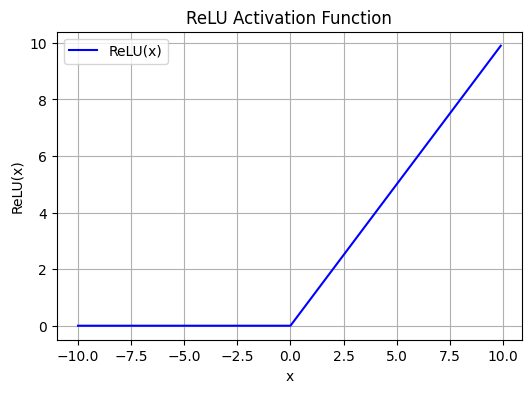

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Tạo một dãy giá trị từ -10 đến 10
x = torch.arange(-10.0, 10.0, 0.1, requires_grad=True)
# Áp dụng hàm ReLU
y = F.relu(x)

# Vẽ đồ thị
plt.figure(figsize=(6, 4))
plt.plot(x.detach(), y.detach(), label="ReLU(x)", color='blue')
plt.title("ReLU Activation Function")
plt.xlabel("x")
plt.ylabel("ReLU(x)")
plt.grid(True)
plt.legend()
plt.show()


Khi đầu vào là một số âm, đạo hàm của hàm ReLU bằng 0, và khi đầu vào là một số dương, đạo hàm của hàm ReLU bằng 1. Lưu ý rằng hàm ReLU không khả vi tại điểm mà đầu vào bằng đúng 0. Trong những trường hợp như vậy, chúng ta mặc định lấy đạo hàm bên trái, và coi đạo hàm tại điểm 0 là 0. Chúng ta có thể làm điều này bởi vì giá trị đầu vào thường sẽ không bao giờ chính xác bằng 0 (các nhà toán học nói rằng hàm này không khả vi trên một tập hợp có độ đo bằng 0). Sau đây, ta sẽ quan sát trực quan đồ thị của đạo hàm ReLU.

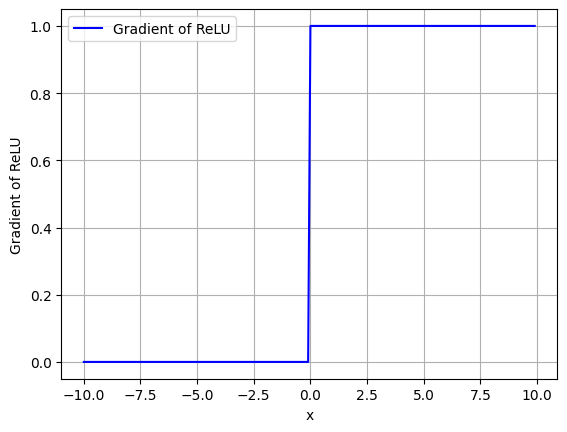

In [ ]:
y.backward(torch.ones_like(x), retain_graph=True)
plt.plot(x.detach(), x.grad, label="Gradient of ReLU", color='blue')
plt.xlabel("x")
plt.ylabel("Gradient of ReLU")
plt.grid(True)
plt.legend()
plt.show()

#### Điểm yếu của hàm ReLU
Khi sử dụng ReLU, có một vấn đề mà bạn cần lưu ý: nếu đầu vào của ReLU luôn âm, hàm ReLU sẽ trả về giá trị $0$, và do đó gradient của nó cũng sẽ là 0. Điều này dẫn đến một hiện tượng được gọi là dead neurons hoặc "neurons chết": các neuron sẽ không có khả năng học nữa vì chúng không nhận được thông tin gradient trong quá trình lan truyền ngược (backpropagation).

Có nhiều biến thể của hàm ReLU, một trong số đó là hàm parametrized ReLU (pReLU). Hàm này thêm một hằng số tuyến tính vào ReLU, vì vậy một số thông tin vẫn có thể đi qua, ngay cả khi đối số là âm. 

$$\operatorname{pReLU}(x) = \max(0, x) + \alpha \min(0, x).$$

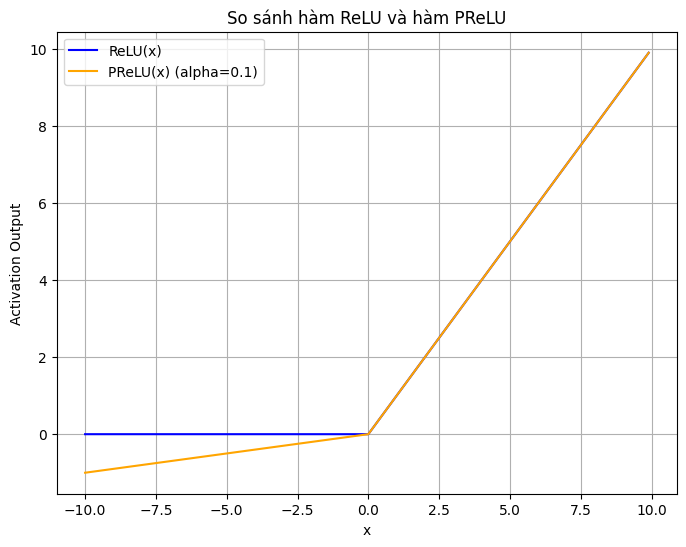

In [ ]:
# Tạo một dãy giá trị từ -10 đến 10
alpha = 0.1  # Tham số alpha cho PReLU
y_prelu = torch.where(x >= 0, x, alpha * x)  # Công thức PReLU

# Vẽ đồ thị
plt.figure(figsize=(8, 6))
plt.plot(x.detach(), y.detach(), label="ReLU(x)", color='blue')
plt.plot(x.detach(), y_prelu.detach(), label=f"PReLU(x) (alpha={alpha})", color='orange')
plt.title("So sánh hàm ReLU và hàm PReLU")
plt.xlabel("x")
plt.ylabel("Activation Output")
plt.grid(True)
plt.legend()
plt.show()

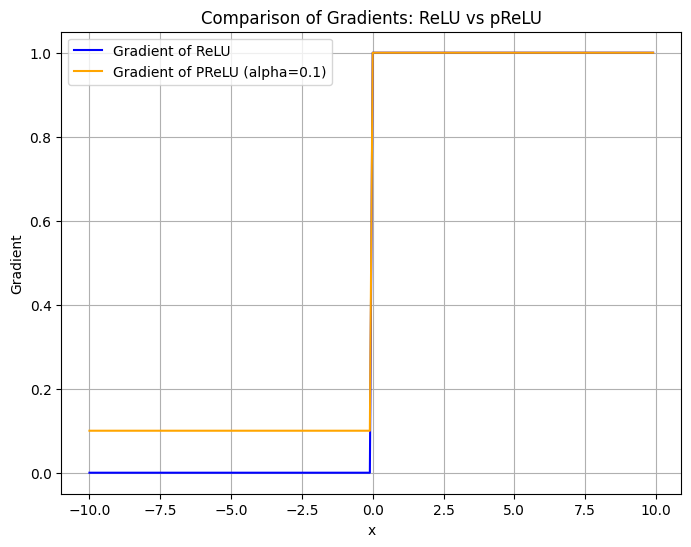

In [ ]:
# Reset gradient before calculating for ReLU
x.grad = None
y.backward(torch.ones_like(x), retain_graph=True)
grad_relu = x.grad.clone()  # Save gradient of ReLU

# Reset gradient before calculating for PReLU
x.grad = None
y_prelu.backward(torch.ones_like(x), retain_graph=True)
grad_prelu = x.grad.clone()  # Save gradient of PReLU

# Plot the gradients
plt.figure(figsize=(8, 6))
plt.plot(x.detach(), grad_relu, label="Gradient of ReLU", color='blue')
plt.plot(x.detach(), grad_prelu, label=f"Gradient of PReLU (alpha={alpha})", color='orange')
plt.title("Comparison of Gradients: ReLU vs pReLU")
plt.xlabel("x")
plt.ylabel("Gradient")
plt.grid(True)
plt.legend()
plt.show()

### 4.5. Sigmoid Function
Hàm sigmoid (hay logistic function) là một hàm số liên tục, khả vi, cho đầu ra nằm trong khoảng (0, 1). Công thức thường gặp là:
 $$\sigma(x) = \frac{1}{1 + e^{-x}}$$
Đặc điểm:
  - Đầu ra của hàm nằm trong khoảng (0,1). 
  - Đồ thị có dạng đường con hình chữ S, đầu ra tiến tới 0 khi x tiến tới -∞ và tiến tới 1 khi x tiến tới +∞, không zero-centered.
  - Dễ bị vanishing gradient khi |x| lớn.


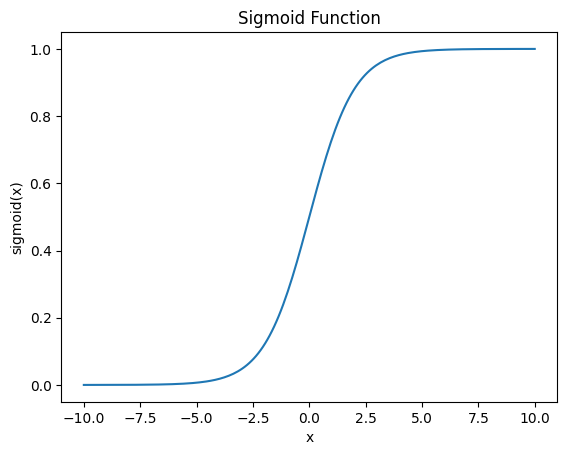

In [ ]:
x = torch.linspace(-10, 10, 200)
y = d2l.sigmoid(x)
plt.figure()
plt.plot(x.numpy(), y.numpy())
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.show()

### Đạo hàm của hàm Sigmoid
Đạo hàm của hàm sigmoid được tính theo công thức:

$$\sigma'(x) = \sigma(x) \cdot (1 - \sigma(x))$$

Trong đó:
- $\sigma(x)$ là giá trị của hàm sigmoid tại $x$.
- $\sigma'(x)$ là đạo hàm của hàm sigmoid tại $x$.
- Đồ thị của đạo hàm hàm sigmoid có dạng hình chuông, đạt giá trị lớn nhất tại $x = 0$.
- Giá trị đạo hàm tiến dần về 0 khi $x$ tiến tới $-\infty$ hoặc $+\infty$.
- Đạo hàm của hàm sigmoid nhỏ khi giá trị $|x|$ lớn, dẫn đến hiện tượng vanishing gradient trong mạng nơ-ron sâu.
Đạo hàm này được sử dụng phổ biến trong các bài toán học sâu, đặc biệt là trong quá trình lan truyền ngược (backpropagation).

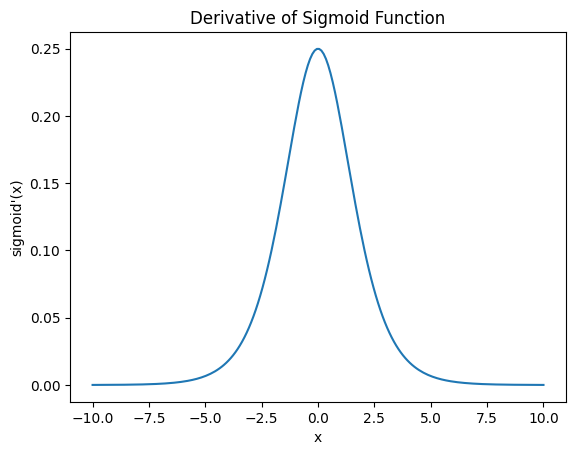

In [ ]:
sigmoid_derivative = y * (1 - y)
plt.figure()
plt.plot(x.numpy(), sigmoid_derivative.numpy())
plt.title('Derivative of Sigmoid Function')
plt.xlabel('x')
plt.ylabel("sigmoid'(x)")
plt.show()

### 4.6. Tanh Function

- **Định nghĩa**: $$\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$
- **Đặc điểm**:
  - Đầu ra của hàm nằm trong khoảng từ (-1, 1). 
  - Zero-centered, đối xứng qua gốc toạ độ. Khi x có giá trị gần bằng 0, hàm tanh sẽ tiến tới một phép biến đổi tuyến tính.
  - Vẫn có vanishing gradient nhưng ít hơn sigmoid


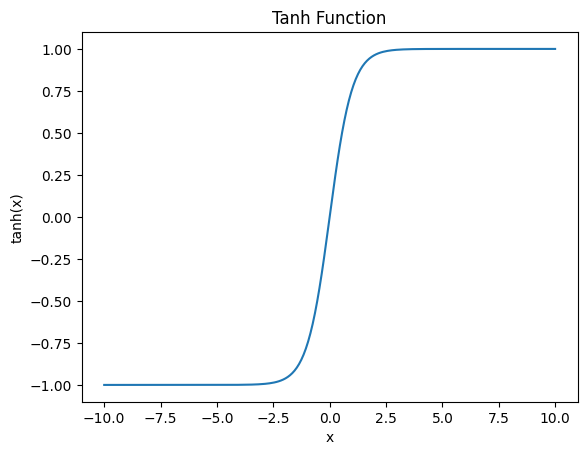

In [ ]:
y = d2l.tanh(x)
plt.figure()
plt.plot(x.numpy(), y.numpy())
plt.title('Tanh Function')
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.show()


### Đạo hàm của hàm Tanh

Đạo hàm của hàm tanh được tính theo công thức:

$$\tanh'(x) = 1 - \tanh^2(x)$$

Trong đó:
- $\tanh(x)$ là giá trị của hàm tanh tại $x$.
- $\tanh'(x)$ là đạo hàm của hàm tanh tại $x$.

Đặc điểm:
- Đạo hàm của hàm tanh đạt giá trị lớn nhất tại $x = 0, khi đó output bằng 1
- Giá trị đạo hàm giảm dần khi $|x|$ tăng, dẫn đến hiện tượng vanishing gradient trong mạng nơ-ron sâu.
- Đạo hàm này thường được sử dụng trong các bài toán học sâu, đặc biệt là trong quá trình lan truyền ngược (backpropagation).

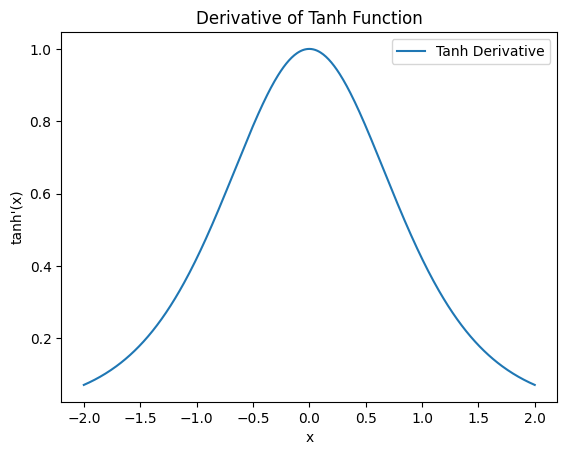

In [ ]:
elements_smooth = torch.linspace(-2, 2, 500)

tanh_values_smooth = d2l.tanh(elements_smooth)
tanh_derivative_values_smooth = 1 - tanh_values_smooth**2

plt.figure()
plt.plot(elements_smooth.numpy(), tanh_derivative_values_smooth.numpy(), label="Tanh Derivative")
plt.title("Derivative of Tanh Function")
plt.xlabel("x")
plt.ylabel("tanh'(x)")
plt.legend()
plt.show()

### So sánh và ứng dụng

Chúng ta có thể so sánh hàm tanh và sigmoid bằng cách làm exercises số 5 .Hàm Sigmoid và hàm tanh rất giống nhau. Chứng minh rằng $$\operatorname{tanh}(x) + 1 = 2 \operatorname{sigmoid}(2x)$$.
#### Chứng minh:  
Định nghĩa của $\operatorname{tanh}(x)$ và $\operatorname{sigmoid}(x)$:  
        $$\operatorname{tanh}(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}, \quad \operatorname{sigmoid}(x) = \frac{1}{1 + e^{-x}}.$$  
        Thay $\operatorname{sigmoid}(2x)$ vào vế phải phương trình:  
        $$2 \cdot \operatorname{sigmoid}(2x) = \frac{2}{1 + e^{-2x}}.$$  
        Thay $\operatorname{tanh}(x)$ vào vế trái phương trình:  
        $$\operatorname{tanh}(x) + 1 = \frac{e^x - e^{-x}}{e^x + e^{-x}} + 1.$$  
        Biến đổi vế trái:  
        $$\operatorname{tanh}(x) + 1 = \frac{e^x - e^{-x} + e^x + e^{-x}}{e^x + e^{-x}} = \frac{2e^x}{e^x + e^{-x}}.$$  
        Nhận thấy rằng $\frac{2e^x}{e^x + e^{-x}}$ tương đương với $\frac{2}{1 + e^{-2x}}$.  
        Do đó,  
        $$\operatorname{tanh}(x) + 1 = 2 \cdot \operatorname{sigmoid}(2x).$$


In [ ]:
from d2l import torch as d2l
# Tạo x là một tensor để thử nghiệm
x = torch.linspace(-5, 5, 100)  # 100 điểm từ -5 đến 5

# tanh(x) + 1
lhs = d2l.tanh(x) + 1

# 2 * sigmoid(2x)
rhs = 2 * d2l.sigmoid(2 * x)

# Dùng hàm torch.allclose để kiểm tra xem lhs và rhs có chênh lệch tuyệt đối nhỏ hơn ngưỡng quy định hay không.
is_equal = torch.allclose(lhs, rhs, atol=1e-6)

# Print the result
print("Tanh(x) + 1:", lhs)
print("2 * Sigmoid(2x):", rhs)
print("Hai vế có bằng nahu không?", is_equal)

Tanh(x) + 1: tensor([9.0778e-05, 1.1110e-04, 1.3602e-04, 1.6642e-04, 2.0367e-04, 2.4927e-04,
        3.0512e-04, 3.7336e-04, 4.5693e-04, 5.5921e-04, 6.8438e-04, 8.3750e-04,
        1.0250e-03, 1.2543e-03, 1.5348e-03, 1.8781e-03, 2.2981e-03, 2.8118e-03,
        3.4403e-03, 4.2088e-03, 5.1486e-03, 6.2976e-03, 7.7021e-03, 9.4182e-03,
        1.1515e-02, 1.4074e-02, 1.7198e-02, 2.1008e-02, 2.5650e-02, 3.1303e-02,
        3.8177e-02, 4.6525e-02, 5.6646e-02, 6.8890e-02, 8.3668e-02, 1.0145e-01,
        1.2277e-01, 1.4821e-01, 1.7843e-01, 2.1410e-01, 2.5590e-01, 3.0447e-01,
        3.6035e-01, 4.2393e-01, 4.9533e-01, 5.7437e-01, 6.6049e-01, 7.5271e-01,
        8.4963e-01, 9.4954e-01, 1.0505e+00, 1.1504e+00, 1.2473e+00, 1.3395e+00,
        1.4256e+00, 1.5047e+00, 1.5761e+00, 1.6396e+00, 1.6955e+00, 1.7441e+00,
        1.7859e+00, 1.8216e+00, 1.8518e+00, 1.8772e+00, 1.8986e+00, 1.9163e+00,
        1.9311e+00, 1.9434e+00, 1.9535e+00, 1.9618e+00, 1.9687e+00, 1.9743e+00,
        1.9790e+00, 1.9828e

### 4.7. Summary
- Chúng ta đều đã thấy được vai trò của hàm phi tuyến trong mạng MLP dùng để kích hoạt và tăng khả năng biểu diễn mô hình so với mạng chỉ sử dụng thuần các hàm tuyến tính.
- Thấy được đặc điểm của ba loại hàm phi tuyến ReLu, Sigmoid và Tanh.


<div align="center">

| Đặc điểm                   | **ReLU**                         | **Sigmoid**                        | **Tanh**                                       |
|:---------------------------|:--------------------------------:|:----------------------------------:|:----------------------------------------------:|
| Định nghĩa                 | $\max(0, x)$                     | $\sigma(x) = \frac{1}{1 + e^{-x}}$ | $\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$ |
| Phạm vi giá trị            | $[0, \infty)$                    | $(0, 1)$                           | $(-1, 1)$                                      |
| Phi tuyến                  | Có                               | Có                                 | Có                                             |
| Đạo hàm                    | $1$ nếu $x > 0$; $0$ nếu $x < 0$ | $\sigma(x)\,(1 - \sigma(x))$       | $1 - \tanh^2(x)$                               |
| Tính đơn giản              | Rất đơn giản                     | Phức tạp hơn do mũ                 | Tương đối phức tạp                             |
| Hiện tượng gradient vanish | Không (khi $x > 0$)              | Có                                 | Có                                             |
| Tính thưa (sparsity)       | Có (nhiều output bằng 0)         | Không                              | Không                                          |
| Tính tuyến tính theo đoạn  | Có                               | Không                              | Không                                          |

</div>


- **Chọn hàm**:
  - Sigmoid: thích hợp cho đầu ra phân loại nhị phân (xác suất).
  - Tanh: đầu ra zero-centered, thường dùng ở các lớp hidden kiểu mạng nhỏ.
- Trong các mạng sâu hiện đại, thường ưu tiên ReLU và biến thể để giảm thiểu vanishing gradient.

## 5. Exercises
### 1. Show that adding layers to a linear deep network cannot increase expressive power. Give an example where it reduces it.

Chứng minh việc thêm lớp vào mạng tuyến tính không tăng năng lực biểu diễn

Trong mạng nơ-ron, mỗi lớp tuyến tính có dạng:

$$f(\mathbf{x}) = W\mathbf{x} + \mathbf{b}$$

Nếu ta xếp chồng hai lớp tuyến tính liên tiếp (không có hàm kích hoạt phi tuyến), ta có:

$$
\begin{aligned}
f_1(\mathbf{x}) &= W_1 \mathbf{x} + \mathbf{b}_1,\\
f_2(\mathbf{z}) &= W_2 \mathbf{z} + \mathbf{b}_2,
\end{aligned}
$$

với $\mathbf{z} = f_1(\mathbf{x})$. Khi đó:

 $$
 f_2(f_1(\mathbf{x}))
 = W_2 (W_1 \mathbf{x} + \mathbf{b}_1) + \mathbf{b}_2
 = (W_2 W_1)\,\mathbf{x} \;+\; (W_2\mathbf{b}_1 + \mathbf{b}_2).
$$

Như vậy, ta có thể thấy khi có hai lớp tuyến tính liên tiếp ta có thể biểu diễn tương đương chỉ bằng một lớp tuyến tính với
ma trận trọng số $W = W_2 W_1$ và vector bias $\mathbf{b} = W_2\mathbf{b}_1 + \mathbf{b}_2$.

 **Kết luận:** Mạng sâu chỉ gồm các lớp tuyến tính (không có hàm kích hoạt phi tuyến) hoàn toàn tương đương với một tầng tuyến tính duy nhất, nên độ sâu không tăng năng lực biểu diễn.

Một ví dụ đơn giản chứng minh cho kết luận trên:

Xét mạng sâu gồm hai lớp tuyến tính:

$$
 \begin{aligned}
 z &= w_1 x + b_1,\\
 y_{\mathrm{deep}} &= w_2\,z + b_2.
 \end{aligned}
 $$

 Chúng ta chọn các tham số:
 $$
 w_1 = 2,\quad b_1 = 1,\quad
 w_2 = 3,\quad b_2 = 4,\quad
 x = 5.
 $$

Thay số vào công thức:
 
 $$
 z = w_1 x + b_1 = 2 \times 5 + 1 = 11.
 $$
 
 $$
 y_{\mathrm{deep}} = w_2\,z + b_2 = 3 \times 11 + 4 = 33 + 4 = 37.
 $$

 Giờ chúng ta ghép hai lớp thành một lớp duy nhất:
 $$
 \begin{aligned}
 w_{\mathrm{eff}} &= w_2\,w_1 = 3 \times 2 = 6,\\
 b_{\mathrm{eff}} &= w_2\,b_1 + b_2 = 3 \times 1 + 4 = 7.
 \end{aligned}
 $$

 Khi đó:
 $$
 y_{\mathrm{shallow}} = w_{\mathrm{eff}}\,x + b_{\mathrm{eff}}
 = 6 \times 5 + 7 = 30 + 7 = 37.
 $$

 Ta thấy 
 $$
 y_{\mathrm{deep}} = y_{\mathrm{shallow}} = 37,
 $$
chứng tỏ hai lớp tuyến tính hoàn toàn tương đương với một lớp tuyến tính hợp nhất.

In [ ]:
import numpy as np

w1, b1 = 2, 1
w2, b2 = 3, 4
x = 5

# Mạng sâu: hai lớp tuyến tính
z = w1 * x + b1
y_deep = w2 * z + b2

# Mạng nông: một lớp hiệu dụng
w_eff = w2 * w1
b_eff = w2 * b1 + b2
y_shallow = w_eff * x + b_eff

print("y_deep    =", y_deep)      # 37
print("y_shallow =", y_shallow)   # 37


y_deep    = 37
y_shallow = 37


Tiếp theo ta sẽ chứng minh khi thêm nhiều lớp tuyến tính vào thì khả năng biểu diễn của mạng có thể suy giảm.

Ví dụ giảm năng lực biểu diễn khi có bottleneck

Xét mạng tuyến tính sâu với kích thước:
- Input dimension: 3
- Hidden dimension: 2
- Output dimension: 3

Ma trận trọng số:
 $$W_1\in\mathbb{R}^{2\times 3},\quad W_2\in\mathbb{R}^{3\times 2}.$$

 Ma trận hiệu dụng $W_{\rm eff} = W_2\,W_1$ có kích thước $3\times 3$, nhưng
 $$\mathrm{rank}(W_{\rm eff})\le \min(\mathrm{rank}(W_2),\,\mathrm{rank}(W_1))
 \le 2.$$

 Trong khi đó, một lớp tuyến tính 3×3 duy nhất có thể đạt rank lên đến 3. Như vậy,
 mạng sâu với bottleneck 2 chiều chỉ có thể biểu diễn các ánh xạ tuyến tính có
 rank tối đa bằng 2, kém hơn mạng nông 3×3 (có thể đạt rank 3).

 Như vậy, việc thêm lớp tuyến tính với bottleneck (ẩn nhỏ hơn cả đầu vào và đầu ra) có thể dẫn đến sự suy giảm khả năng biểu diễn của mô hình.

 Bên dưới là ví dụ minh hoạ bằng python.


In [ ]:
# Khởi tạo W1 (2x3) và W2 (3x2) và W0_normal (3x3)
W0_normal = np.random.randn(3, 3)
W1_bottle = np.random.randn(2, 3)
W2_bottle = np.random.randn(3, 2)

# Tính ma trận hiệu dụng và rank
W_eff_bottle = W2_bottle @ W1_bottle
rank_eff = np.linalg.matrix_rank(W_eff_bottle)
rank_normal = np.linalg.matrix_rank(W0_normal)

print("Kích thước ma trận hiệu dụng bị bottle neck:", W_eff_bottle.shape)
print("Rank của ma trận hiệu dụng bị bottle neck:", rank_eff, "(≤ 2)")

print("Kích thước ma trận normal không bị bottle neck:", W0_normal.shape)
print("Rank của ma trận normal không bị bottle neck:", rank_normal, "(≤ 3)")


Kích thước ma trận hiệu dụng bị bottle neck: (3, 3)
Rank của ma trận hiệu dụng bị bottle neck: 2 (≤ 2)
Kích thước ma trận normal không bị bottle neck: (3, 3)
Rank của ma trận normal không bị bottle neck: 3 (≤ 3)


### 2. Compute the derivative of the pReLU activation function.

Hàm kích hoạt pReLU (Parametric Rectified Linear Unit) được định nghĩa như sau:

$$
\operatorname{pReLU}(x) = 
\begin{cases} 
x & \text{if } x \geq 0, \\
\alpha x & \text{if } x < 0,
\end{cases}
$$

với $\alpha$ có thể học được.

Đạo hàm của hàm pReLU được chia thành 2 phần, tùy thuộc vào giá trị của $x$:

$$
\frac{d}{dx} \operatorname{pReLU}(x) = 
\begin{cases} 
1 & \text{if } x \geq 0, \\
\alpha & \text{if } x < 0.
\end{cases}
$$
1. Với $x \geq 0$, hàm này là một hàm số học với độ dốc bằng 1, vì vậy đạo hàm của nó là 1.
2. Với $x < 0$, hàm này là một hàm số học với độ dốc bằng $\alpha$, vì vậy đạo hàm của nó là $\alpha$.



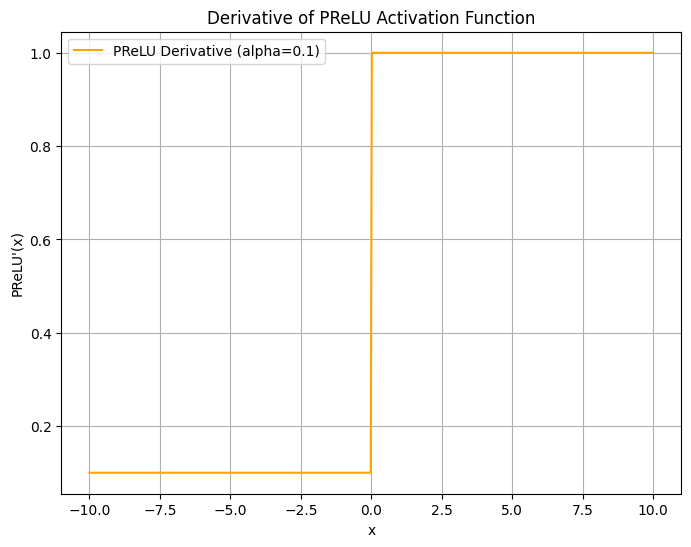

In [ ]:
import torch

import matplotlib.pyplot as plt

# Define the PReLU derivative function
def prelu_derivative(x, alpha):
    return torch.where(x >= 0, torch.ones_like(x), alpha * torch.ones_like(x))

# Create a range of x values
x = torch.linspace(-10, 10, 500)
alpha = 0.1  # Parameter for PReLU

# Compute the derivative of PReLU
y_derivative = prelu_derivative(x, alpha)

# Plot the derivative of PReLU
plt.figure(figsize=(8, 6))
plt.plot(x.numpy(), y_derivative.numpy(), label=f"PReLU Derivative (alpha={alpha})", color='orange')
plt.title("Derivative of PReLU Activation Function")
plt.xlabel("x")
plt.ylabel("PReLU'(x)")
plt.grid(True)
plt.legend()
plt.show()

### 3. Compute the derivative of the Swish activation function 

Đạo hàm của hàm Swish

**Định nghĩa**  
Hàm Swish được định nghĩa là  
$$
f(x) = x \,\sigma(\beta x),
$$  
trong đó  $\sigma(x) = \frac{1}{1 + e^{-x}}$ là hàm Sigmoid, và $\quad \beta \in \mathbb{R}$ là tham số điều chỉnh độ dốc của hàm sigmoid.

**Đặc tính**:  
  - Hàm Swish có đầu ra mượt mà và liên tục, giúp giảm hiện tượng vanishing gradient so với hàm sigmoid.  
  - Khi $\beta = 1$, Swish trở thành một hàm phi tuyến phổ biến với khả năng biểu diễn tốt hơn trong các mạng nơ-ron sâu.  
  - Khi $\beta \to 0$, Swish tiến gần đến hàm tuyến tính $f(x) = x$.  
  - Khi $\beta \to \infty$, Swish tiến gần đến hàm ReLU.  
  - Swish thường được sử dụng trong các mô hình học sâu hiện đại nhờ tính năng học linh hoạt và hiệu quả.  
  
**Tính đạo hàm**  
Để tính đạo hàm của hàm Swish, ta sẽ sử dụng quy tắc sản phẩm và đạo hàm của hàm sigmoid. 
$$
f'(x) \;=\; \frac{d}{dx}[\,x\,]\;\sigma(\beta x)\;+\;x\;\frac{d}{dx}\bigl[\sigma(\beta x)\bigr].
$$  
- Vì $\frac{d}{dx}x = 1.$,  
- Và với $\sigma(u)$, ta có  
  $$
  \sigma'(u) = \sigma(u)\,\bigl(1 - \sigma(u)\bigr).
  $$  
  Suy ra  
  $$
  \frac{d}{dx}\bigl[\sigma(\beta x)\bigr]
  = \sigma'(\beta x)\,\frac{d}{dx}[\beta x]
  = \beta\,\sigma(\beta x)\,\bigl(1 - \sigma(\beta x)\bigr).
  $$  

Thay vào, ta được  
$$
f'(x)
= \sigma(\beta x)
+ x \,\beta\,\sigma(\beta x)\,\bigl(1 - \sigma(\beta x)\bigr).
$$

**Kết luận**  
Đạo hàm của hàm Swish có thể viết gọn là  
$$
\boxed{\,f'(x) = \sigma(\beta x)
+ \beta\,x\,\sigma(\beta x)\bigl(1 - \sigma(\beta x)\bigr)\,}.
$$

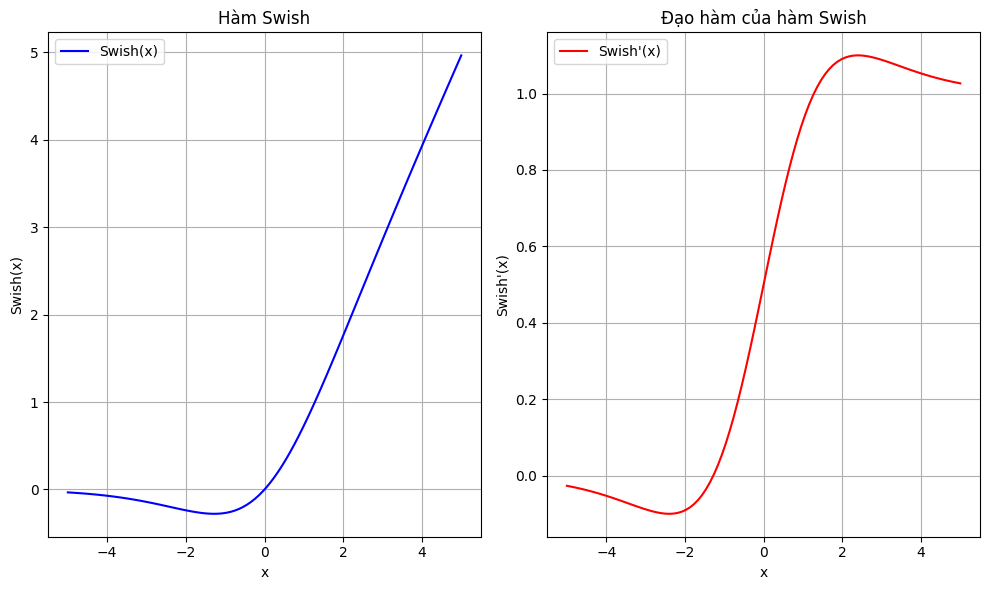

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Hàm sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Hàm Swish và đạo hàm của Swish
def swish(x, beta):
    return x * sigmoid(beta * x)

def swish_derivative(x, beta):
    sig = sigmoid(beta * x)
    return sig + x * beta * sig * (1 - sig)

# Tạo các giá trị x từ -5 đến 5
x = np.linspace(-5, 5, 100)
beta = 1  # Tham số beta

# Tính giá trị của Swish và đạo hàm của Swish
y = swish(x, beta)
y_prime = swish_derivative(x, beta)

# Vẽ đồ thị của Swish và đạo hàm của nó
plt.figure(figsize=(10, 6))

# Đồ thị của hàm Swish
plt.subplot(1, 2, 1)
plt.plot(x, y, label="Swish(x)", color='blue')
plt.title("Hàm Swish")
plt.xlabel("x")
plt.ylabel("Swish(x)")
plt.grid(True)
plt.legend()

# Đồ thị của đạo hàm hàm Swish
plt.subplot(1, 2, 2)
plt.plot(x, y_prime, label="Swish'(x)", color='red')
plt.title("Đạo hàm của hàm Swish")
plt.xlabel("x")
plt.ylabel("Swish'(x)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


### 4. Show that an MLP using only ReLU (or pReLU) constructs a continuous piecewise linear function.

##### Định nghĩa MLP
Một MLP bao gồm các tầng (layers) với các phép biến đổi tuyến tính (linear transformations) và hàm kích hoạt phi tuyến (activation function). Công thức tổng quát của một MLP với một tầng ẩn là:

$$
\mathbf{H} = \sigma(\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}), \\
\mathbf{O} = \mathbf{H} \mathbf{W}^{(2)} + \mathbf{b}^{(2)},
$$

trong đó:
- $\mathbf{X}$: đầu vào (input),
- $\mathbf{W}^{(1)}, \mathbf{W}^{(2)}$: ma trận trọng số (weight matrices),
- $\mathbf{b}^{(1)}, \mathbf{b}^{(2)}$: vector bias,
- $\sigma$: hàm kích hoạt (ReLU hoặc pReLU).

##### Tính chất của hàm ReLU và pReLU
Hàm ReLU được định nghĩa là:
$$
\operatorname{ReLU}(x) = \max(0, x).
$$

Hàm pReLU được định nghĩa là:
$$
\operatorname{pReLU}(x) = 
\begin{cases} 
x & \text{nếu } x \geq 0, \\
\alpha x & \text{nếu } x < 0,
\end{cases}
$$
với $\alpha$ là một tham số có thể học được.

Cả hai hàm này đều là **hàm liên tục, phân mảnh tuyến tính**:
- Hàm ReLU có hai đoạn tuyến tính: $y = 0$ khi $x < 0$ và $y = x$ khi $x \geq 0$.
- Hàm pReLU cũng có hai đoạn tuyến tính: $y = \alpha x$ khi $x < 0$ và $y = x$ khi $x \geq 0$.

##### Tính chất của MLP sử dụng ReLU/pReLU
Khi áp dụng ReLU hoặc pReLU vào MLP:
1. **Phép biến đổi tuyến tính**: Mỗi tầng của MLP thực hiện phép biến đổi tuyến tính $\mathbf{X} \mathbf{W} + \mathbf{b}$.
2. **Hàm kích hoạt phi tuyến**: Hàm ReLU hoặc pReLU được áp dụng sau phép biến đổi tuyến tính, tạo ra một hàm phân mảnh tuyến tính.

Do đó, đầu ra của mỗi tầng là một **hàm phân mảnh tuyến tính**. Khi kết hợp nhiều tầng, đầu ra cuối cùng của MLP là sự kết hợp của các hàm phân mảnh tuyến tính, vẫn giữ tính chất **liên tục và phân mảnh tuyến tính**.

##### Chứng minh tính liên tục
- Hàm ReLU và pReLU đều liên tục, do đó đầu ra của mỗi tầng là một hàm liên tục.
- Phép biến đổi tuyến tính $\mathbf{X} \mathbf{W} + \mathbf{b}$ cũng là một phép toán liên tục.
- Kết hợp các phép toán liên tục qua nhiều tầng, đầu ra cuối cùng của MLP vẫn là một hàm liên tục.

##### Chứng minh tính phân mảnh tuyến tính
- Hàm ReLU và pReLU chia không gian đầu vào thành các vùng (regions) dựa trên điều kiện $x \geq 0$ hoặc $x < 0$.
- Mỗi vùng tương ứng với một hàm tuyến tính khác nhau.
- Khi kết hợp nhiều tầng, số lượng vùng tăng lên, nhưng trong mỗi vùng, đầu ra của MLP vẫn là một hàm tuyến tính.

##### Kết luận
Một MLP sử dụng hàm kích hoạt ReLU hoặc pReLU tạo ra một **hàm liên tục, phân mảnh tuyến tính**. Điều này có nghĩa là đầu ra của MLP là một hàm tuyến tính trong từng vùng nhỏ của không gian đầu vào, và các vùng này được xác định bởi các điều kiện của hàm kích hoạt.

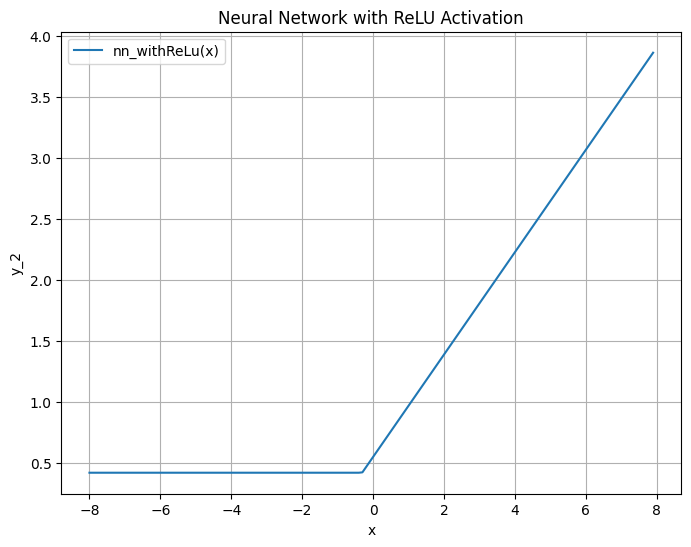

In [ ]:
import torch
import matplotlib.pyplot as plt

x_1 = torch.arange(-8.0, 8.0, 0.1)
w_1 = torch.rand(1, 1)
b_1 = torch.rand(1, 1)
y_1 = x_1 * w_1 + b_1
x_2 = torch.relu(y_1)
w_2 = torch.rand(1, 1)
b_2 = torch.rand(1, 1)
y_2 = x_2 * w_2 + b_2

# Plot the result
plt.figure(figsize=(8, 6))
plt.plot(x_1.detach().numpy(), y_2.squeeze().detach().numpy(), label="nn_withReLu(x)")
plt.xlabel("x")
plt.ylabel("y_2")
plt.title("Neural Network with ReLU Activation")
plt.legend()
plt.grid(True)
plt.show()

### 5. Sigmoid and tanh are very similar.
1. Show that $\operatorname{tanh}(x) + 1 = 2 \operatorname{sigmoid}(2x)$.
2. Prove that the function classes parametrized by both nonlinearities are identical. Hint: affine layers have bias terms, too.

**Biến đổi tuyến tính và các hạng tử dịch (bias):**:
    - Cả hai hàm sigmoid và tanh đều được áp dụng sau một biến đổi tuyến tính của đầu vào, tức là $ z = Wx + b $, trong đó $ W $ là ma trận trọng số, $ x $ là đầu vào, và $b$ là vector bias.
    - Hàm sigmoid được định nghĩa là:
      $
      \operatorname{sigmoid}(z) = \frac{1}{1 + e^{-z}}
      $
    - Hàm tanh được định nghĩa là:
      $
      \tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}
      $

**Mối quan hệ giữa Sigmoid và Tanh**:
    - Hàm tanh có thể được biểu diễn theo hàm sigmoid:
      $
      \tanh(z) = 2\operatorname{sigmoid}(2z) - 1
      $
    - Tương tự, hàm sigmoid có thể được biểu diễn theo hàm tanh:
      $
      \operatorname{sigmoid}(z) = \frac{\tanh(z/2) + 1}{2}
      $

**Lớp hàm (Function Classes)**:
    - Một mạng nơ-ron với hàm kích hoạt sigmoid sẽ áp dụng sigmoid lên biểu thức tuyến tínhn $z = Wx + b$.
    - Một mạng nơ-ron với hàm kích hoạt tanh sẽ áp dụng tanh lên biểu thức tuyến tính $ z = Wx + b$.

**Tính tương đương của các lớp hàm**:
    - Với bất kỳ mạng nơ-ron nào sử dụng hàm sigmoid, ta có thể thay thế hàm sigmoid bằng hàm tanh bằng cách điều chỉnh tỉ lệ trong biến đổi tuyến tính. Cụ thể:
      - Thay thế $z$ bằng $2z$ trong biểu thức tuyến tính.
      - Sử dụng mối quan hệ $\tanh(z) = 2\operatorname{sigmoid}(2z) - 1$ để tính đầu ra tương đương với tanh.
    - Tương tự, với bất kỳ mạng nơ-ron nào sử dụng hàm tanh, ta có thể thay thế bằng hàm sigmoid bằng cách điều chỉnh tỉ lệ trong biến đổi tuyến tính. Cụ thể:
      - Thay thế $z$ bằng $z/2 trong biểu thức tuyến tính.
      - Sử dụng mối quan hệ $\operatorname{sigmoid}(z) = \frac{\tanh(z/2) + 1}{2}$ để tính đầu ra tương đương với sigmoid.

**Kết luận**:
    - Vì biến đổi tuyến tính có thể được điều chỉnh để bù cho sự khác biệt về tỉ lệ giữa sigmoid và tanh, nên các lớp hàm được tham số hóa bởi cả hai loại hàm phi tuyến đều là giống nhau.

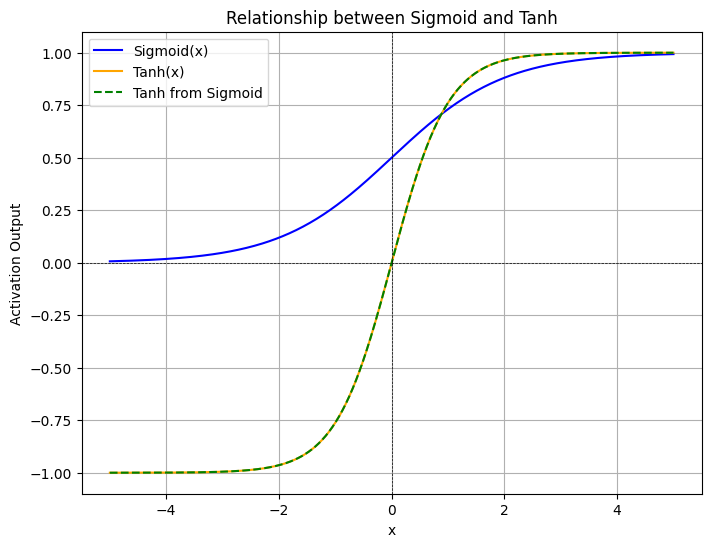

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

# Tạo dãy giá trị x
x = np.linspace(-5, 5, 500)

# Tính giá trị sigmoid và tanh
sigmoid = 1 / (1 + np.exp(-x))
tanh = np.tanh(x)

# Tính tanh từ sigmoid theo công thức
tanh_from_sigmoid = 2 * (1 / (1 + np.exp(-2 * x))) - 1

# Vẽ đồ thị
plt.figure(figsize=(8, 6))
plt.plot(x, sigmoid, label="Sigmoid(x)", color="blue")
plt.plot(x, tanh, label="Tanh(x)", color="orange")
plt.plot(x, tanh_from_sigmoid, "--", label="Tanh from Sigmoid", color="green")
plt.title("Relationship between Sigmoid and Tanh")
plt.xlabel("x")
plt.ylabel("Activation Output")
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.legend()
plt.grid(True)
plt.show()


### 6. Định nghĩa Batch Normalization
Batch normalization (Ioffe & Szegedy, 2015) là kỹ thuật chuẩn hóa đầu vào của mỗi lớp trong mạng nơ-ron bằng cách sử dụng thống kê (mean và variance) tính trên mỗi minibatch. Cho một minibatch đầu vào $$\{x^{(1)}, \dots, x^{(m)}\}$$ 
1. **Tính mean (μ_B)**  
   Với minibatch kích thước \(m\), tính trung bình:
   $$
     \mu_B = \frac{1}{m}\sum_{i=1}^m x^{(i)}
   $$
2. **Tính variance (σ_B²)**  
   Tính phương sai:
   $$
     \sigma_B^2 = \frac{1}{m}\sum_{i=1}^m \bigl(x^{(i)} - \mu_B\bigr)^2
   $$
3. **Chuẩn hóa (x̂)**  
   Đưa dữ liệu về phân phối chuẩn:
   $$
     \hat{x}^{(i)} = \frac{x^{(i)} - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}}
   $$
4. **Scale và shift (y)**  
   Cho phép mô hình điều chỉnh lại phân phối đầu ra:
   $$
     y^{(i)} = \gamma\,\hat{x}^{(i)} + \beta
   $$
   - $\epsilon$ là hằng số nhỏ tránh chia cho 0.  
   - $\gamma, \beta$ là tham số học được.


Những vấn đề có thể xảy ra

Dựa trên cách tính trên, hai vấn đề quan trọng nhất khi áp dụng trên từng minibatch là:

1. **Batch size quá nhỏ (ví dụ $m=1$)**  
   - Khi $$m=1$$, ta có $$\sigma_B^2 = 0$$, dẫn đến $$\hat{x}^{(1)} = 0$$ sau chuẩn hóa, toàn bộ thông tin biến mất.

2. **Phụ thuộc vào thành phần của minibatch**  
   - Các mẫu trong cùng batch ảnh hưởng lẫn nhau: cùng một mẫu đưa vào hai batch khác nhau sẽ cho đầu ra khác nhau, gây **nhiễu ngẫu nhiên** và khó tái lập kết quả.


Ví dụ minh hoạ bằng Python




In [ ]:
# %%
import numpy as np

def batch_norm(X, eps=1e-5):
    mu = X.mean(axis=0)
    var = X.var(axis=0)
    return (X - mu) / np.sqrt(var + eps)

# Ví dụ 1: m = 1
X_single = np.array([[10.0, -5.0,  3.0]])   # batch size = 1
print("Input (m=1):\n", X_single)
print("Output BN (m=1):\n", batch_norm(X_single))

# Ví dụ 2: Cùng một mẫu nhưng 2 batch khác nhau
x = np.array([1.0, 2.0, 3.0])
B1 = np.stack([x, [10.0, 20.0, 30.0]], axis=0)
B2 = np.stack([x, [ 0.0, -1.0, -2.0]], axis=0)

print("\nBatch 1 Input:\n", B1)
print("Batch 1 BN Output:\n", batch_norm(B1))

print("\nBatch 2 Input:\n", B2)
print("Batch 2 BN Output:\n", batch_norm(B2))

Input (m=1):
 [[10. -5.  3.]]
Output BN (m=1):
 [[0. 0. 0.]]

Batch 1 Input:
 [[ 1.  2.  3.]
 [10. 20. 30.]]
Batch 1 BN Output:
 [[-0.99999975 -0.99999994 -0.99999997]
 [ 0.99999975  0.99999994  0.99999997]]

Batch 2 Input:
 [[ 1.  2.  3.]
 [ 0. -1. -2.]]
Batch 2 BN Output:
 [[ 0.99998     0.99999778  0.9999992 ]
 [-0.99998    -0.99999778 -0.9999992 ]]



- **Ví dụ 1 (m=1)**:  
  Tất cả giá trị sau chuẩn hóa bằng 0 vì variance bằng 0 ⇒ không còn thông tin ban đầu.  
- **Ví dụ 2 (batch dependency)**:  
  Cùng mẫu \([1,2,3]\) nhưng do đối tượng thứ hai khác nhau, kết quả chuẩn hóa của mẫu này cũng đổi theo, cho thấy BN không ổn định với cỡ batch nhỏ và phụ thuộc vào thành phần batch.

### 7.Provide an example where the gradients vanish for the sigmoid activation function.

1. Định nghĩa hàm sigmoid và đạo hàm

- Hàm sigmoid:
$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

- Đạo hàm:
$$
\sigma'(x) = \sigma(x)(1 - \sigma(x))
$$

2. Khi nào đạo hàm gần bằng 0?

- Khi $$x \to -\infty \Rightarrow \sigma(x) \to 0 \Rightarrow \sigma'(x) \to 0$$
- Khi $$x \to +\infty \Rightarrow \sigma(x) \to 1 \Rightarrow \sigma'(x) \to 0$$

⟹ Với các giá trị đầu vào quá lớn hoặc quá nhỏ, đạo hàm gần bằng 0 → **gradient biến mất** trong huấn luyện mạng nơ-ron.

3. Ví dụ

Xét $$x = -10$$

$$
\sigma(-10) \approx \frac{1}{1 + e^{10}} \approx 4.54 \times 10^{-5}
$$

$$
\sigma'(-10) \approx 4.54 \times 10^{-5} \cdot (1 - 4.54 \times 10^{-5}) \approx 4.54 \times 10^{-5}
$$

→ Giá trị đạo hàm rất nhỏ gần bằng 0.

4. Kiểm tra bằng Python

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

x_vals = np.array([-10, -5, 0, 5, 10])


x =  -10, sigmoid'(x) = 0.00004540
x =   -5, sigmoid'(x) = 0.00664806
x =    0, sigmoid'(x) = 0.25000000
x =    5, sigmoid'(x) = 0.00664806
x =   10, sigmoid'(x) = 0.00004540


In [ ]:
derivatives = sigmoid_derivative(x_vals)

for x, d in zip(x_vals, derivatives):
    print(f"x = {x:>4}, sigmoid'(x) = {d:.8f}")

Kết luận: khi đạo hàm của sigmoid tiến về 0, trong mạng nơ-ron sâu, việc nhân các gradient nhỏ này qua nhiều lớp sẽ dẫn đến gradient vanish →  mô hình không học được hiệu quả trong quá trình backpropagation. Đây là lý do vì sao sigmoid ít được dùng trong các lớp ẩn hiện đại.

---

---


---


---


# Hiện thực Multilayer Perceptrons (MLP)

## Giới thiệu về Multilayer Perceptrons (MLP)

Multilayer Perceptrons (MLP) là một loại mạng nơ-ron nhân tạo bao gồm nhiều lớp, bao gồm lớp đầu vào, các lớp ẩn và lớp đầu ra. MLP có khả năng học các biểu diễn phi tuyến tính của dữ liệu, làm cho chúng phù hợp với các nhiệm vụ như phân loại và hồi quy. Đây là một trong những mô hình cơ bản của học sâu, được xây dựng dựa trên các nơ-ron kết nối đầy đủ giữa các lớp.

## Implementation

Trong phần này, chúng ta implement một MLP đơn giản bằng Python và NumPy. MLP bao gồm một lớp ẩn với hàm kích hoạt ReLU và lớp đầu ra với hàm softmax cho nhiệm vụ phân loại.

In [ ]:
import numpy as np
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


### Khởi tạo tham số

Khởi tạo các ma trận trọng số và vector bias:
*   Hai ma trận trọng số W1 (784×256) và W2 (256×10), cùng hai vector bias b1 và b2
    *   W1: Ma trận trọng số kết nối lớp đầu vào (input layer) với lớp ẩn (hidden layer)
    *   W2: Ma trận trọng số kết nối lớp ẩn với lớp đầu ra (output layer).
    *   W1 và W2 được khởi tạo ngẫu nhiên (Tránh sự đối xứng: Nếu tất cả trọng số giống nhau, các neuron sẽ học giống nhau → Mạng không hiệu quả) với phân phối chuẩn (Gaussian) với mean = 0, variance = 1 (np.random.randn). Nhân với sigma để kiểm soát phương sai (tránh gradient quá lớn - Exploding Gradient hoặc quá nhỏ - Vanishing gradient)
    *   b1: Vector bias cho lớp ẩn, giúp mô hình linh hoạt hơn bằng cách dịch chuyển đầu ra.
    *   b2: Vector bias cho lớp đầu ra, giúp điều chỉnh giá trị đầu ra cuối cùng.
    *   b1, b2 thường được khởi tạo bằng 0 để đảm bảo tính đối xứng ban đầu. Đôi khi có thể khởi tạo giá trị nhỏ (ví dụ: 0.01) để tránh Dying ReLU (nếu đầu vào luôn âm sau một số bước cập nhật, dẫn đến gradient = 0 và không học được nữa) khi dùng ReLU.

In [ ]:
def init_params(num_inputs, num_hiddens, num_outputs, sigma=0.01):
    params = {
        'W1': np.random.randn(num_inputs, num_hiddens) * sigma,
        'b1': np.zeros((1, num_hiddens)),
        'W2': np.random.randn(num_hiddens, num_outputs) * sigma,
        'b2': np.zeros((1, num_outputs)),
    }
    return params, num_inputs

### Hàm kích hoạt ReLU
ReLU (Rectified Linear Unit) là hàm kích hoạt phi tuyến được sử dụng phổ biến nhất trong các mạng neural sâu (Deep Neural Networks). Nó giúp giải quyết vấn đề vanishing gradient và tăng tốc độ hội tụ của mô hình.
$$\operatorname{ReLU}(z) = \max(z, 0).$$
* Đơn giản, tính toán nhanh. Chỉ cần so sánh và gán giá trị, không cần phép toán phức tạp như sigmoid/tanh


In [ ]:
def relu(Z):
    return np.maximum(0, Z)

### Softmax cho đầu ra logits
$$\hat{\mathbf{y}} = \mathrm{softmax}(\mathbf{z}) \quad \textrm{where}\quad \hat{y}_i = \frac{\exp(z_i)}{\sum_j \exp(z_j)}.$$
Biến đầu ra thô (logits) từ lớp cuối cùng (Z) thành phân phối xác suất với các giá trị nằm trong khoảng [0, 1] và tổng = 1. \
Trong thực tế ta dùng `np.exp(Z - np.max(Z, axis=1, keepdims=True))` mà không dùng `np.exp(Z)` để ngăn chặn tràn số khi giá trị trong Z quá lớn. Việc trừ đi giá trị cực đại trên mỗi dòng (hoặc mỗi vector logits) không làm thay đổi kết quả cuối cùng của Softmax về mặt toán học nhưng giúp các giá trị đầu vào cho hàm mũ luôn ≤ 0, từ đó giới hạn kết quả của np.exp trong khoảng
(0,1]và đảm bảo tính ổn định số học

In [ ]:
def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)

### Lan truyền thuận Forward Propagation

Tính toán đầu ra của mạng:
#### **Lớp ẩn**

**`Z1 = X.dot(W1) + b1`**
$$Z_1 = XW_1 + b_1$$
Z1: ma trận của lớp ẩn  
X: ma trận 2D chứa dữ liệu ảnh đã được flatten từ tensor batch X_train \
W1: ma trận trọng số lớp ẩn
b1: Bias lớp ẩn \

Tương ứng công thức 5.3.1
$$\mathbf{z}= \mathbf{W}^{(1)} \mathbf{x}$$

**`A1 = relu(Z1)`**

A1: ma trận được tạo bởi hàm kích hoạt ReLU

$$\quad A_1 = \mathrm{max}(Z_1,0)$$
 Tương ứng công thức 5.3.2
$$\mathbf{h}= \phi (\mathbf{z})$$

#### **Lớp đầu ra (logits)**

**`Z2 = A1.dot(W2) + b2`**

$$Z_2 = A_1W_2 + b_2$$
Z2: ma trận của đầu ra  
A1: ma trận được tạo bởi hàm kích hoạt ReLU \
W2: ma trận trọng số lớp đầu ra \
b2: Bias lớp đầu ra

 Tương ứng công thức 5.3.3
$$\mathbf{o}= \mathbf{W}^{(2)} \mathbf{h}$$

**`Y_hat = softmax(Z2)`**
$$\quad \hat Y = \mathrm{Softmax}(Z_2)$$

In [ ]:
def forward_propagation(X, params):
    W1, b1, W2, b2 = params['W1'], params['b1'], params['W2'], params['b2']
    # Lớp ẩn
    Z1 = X.dot(W1) + b1
    A1 = relu(Z1)                    # kích hoạt
    # Lớp đầu ra
    Z2 = A1.dot(W2) + b2
    Y_hat = softmax(Z2)              # xác suất dự đoán
    return Z1, A1, Z2, Y_hat

### Hàm mất mát cross-entropy
Hàm mất mát Cross-Entropy (CE) là một công cụ quan trọng trong học máy, đặc biệt hiệu quả cho các bài toán phân loại (classification). Trong Multilayer Perceptron (MLP), CE thường được kết hợp với hàm kích hoạt Softmax ở lớp đầu ra để đo lường sự khác biệt giữa phân phối xác suất dự đoán và phân phối thực tế của nhãn. \
#### **Tính loss trung bình của Cross-Entropy và gradient**
**cross-entropy loss**

$$ l(\mathbf{y}, \hat{\mathbf{y}})_{sum} = - \sum_{j=1}^m y_j \log \hat{y}_j $$

Việc tối đa hóa hàm log-likelihood $l(\theta)$ giống hệt với việc tối thiểu hóa $-l(\theta)$, và do đó chúng ta có thể tìm thấy $l(\theta)$ tốt nhất từ ​​đây. Để khái quát hóa tổn thất trên thành bất kỳ phân phối nào, chúng tôi cũng gọi
$-l(\theta)$ là tổn thất entropy chéo $CE(\mathbf{y}, \hat{\mathbf{y}})$

#### **Chuyển đổi hàm log-likelihood (Tương ứng công thức 22.11.24) sang dạng hàm mất mát**

\begin{split}\begin{aligned}
l(\theta) &= \sum_{i=1}^n y_i \log(\pi_i) + (1 - y_i) \log (1 - \pi_i). \\
\end{aligned}\end{split}

Trong quá trình tối ưu hóa, chúng ta muốn tối đa hóa log-likelihood. Điều này tương đương với việc tối thiểu hóa âm log-likelihood:

\begin{aligned}
-l(\theta) &= -\sum_{i=1}^n y_i \log(\pi_i) + (1 - y_i) \log (1 - \pi_i) \\
&= \sum_{i=1}^n -y_i \log(\pi_i) - (1 - y_i) \log (1 - \pi_i)
\end{aligned}

Đây chính là binary cross-entropy loss.

#### **Phân tích cross-entropy loss trong phân loại nhị phân**

Trong phân loại nhị phân (m = 2), với $y_1 + y_2 = 1$ (một mẫu chỉ thuộc về một lớp) và $\hat{y}_1 + \hat{y}_2 = 1$ (tổng xác suất là 1), cross-entropy loss có thể được viết lại như sau:

\begin{aligned}
l(\mathbf{y}, \hat{\mathbf{y}})_{sum} &= - \sum_{j=1}^2 y_j \log \hat{y}_j \\
&= -y_1 \log \hat{y}_1 - y_2 \log \hat{y}_2
\end{aligned}

Với $y_2 = 1 - y_1$ và $\hat{y}_2 = 1 - \hat{y}_1$, chúng ta có:

\begin{aligned}
l(\mathbf{y}, \hat{\mathbf{y}})_{sum} &= -y_1 \log \hat{y}_1 - (1 - y_1) \log (1 - \hat{y}_1)
\end{aligned}

#### **So sánh hai biểu thức**

So sánh biểu thức âm log-likelihood từ Bước 1 với biểu thức cross-entropy loss từ Bước 2, chúng ta thấy rằng:

\begin{aligned}
-l(\theta) &= \sum_{i=1}^n -y_i \log(\pi_i) - (1 - y_i) \log (1 - \pi_i)
\end{aligned}

và

\begin{aligned}
l(\mathbf{y}, \hat{\mathbf{y}})_{sum} &= -y_1 \log \hat{y}_1 - (1 - y_1) \log (1 - \hat{y}_1)
\end{aligned}

Hai biểu thức này có cùng hình thức khi chúng ta đặt $y_1 = y_i$ và $\hat{y}_1 = \pi_i$, và trong trường hợp có nhiều mẫu, chúng ta lấy tổng trên tất cả các mẫu.

#### **cross-entropy trung bình**
*   cross-entropy trung bình, tránh cho giá trị loss tăng tỷ lệ thuận với m (số mẫu của bach) khiến cho giá trị loss của bacth có size lớn khác với batch có size nhỏ
$$ l(\mathbf{y}, \hat{\mathbf{y}})_{mean} = -  \frac{1}{m}\sum_{j=1}^m y_j \log \hat{y}_j $$

#### **Gradient**

*   Gradient của CE Loss cho biết hướng và độ lớn cần điều chỉnh các trọng số của mô hình để giảm giá trị loss.
$$
\partial_{z_j} l(\mathbf{y}, \hat{\mathbf{y}}) = \frac{\partial L}{\partial z_j} = \frac{1}{m}(\hat{y}_j - y_j)
$$

Đây chính là đạo hàm của hàm cross entropy loss khi kết hợp với softmax (tương ứng công thức 4.1.10)

$$
\partial_{o_j} l(\mathbf{y}, \hat{\mathbf{y}}) = \frac{\exp(z_j)}{\sum_{k=1}^q \exp(z_k)} - y_j = \mathrm{softmax}(\mathbf{z})_j - y_j = (\hat{y}_j - y_j)
$$

$y_ {j}$ là giá trị one-hot (bằng 1 nếu j là nhãn đúng, và 0 cho các nhãn khác). Khi cập nhật gradient cho lớp đúng, $y_ {j}$ = 1 nên ta có $\hat{y}_{j}$ - 1
$$
\partial_{z_j} l(\mathbf{y}, \hat{\mathbf{y}}) = \frac{\partial L}{\partial z_j} = \frac{1}{m}(\hat{y}_j - 1)
$$




In [ ]:
def cross_entropy_loss(Y_hat, Y):
    m = Y.shape[0]
    # loss
    log_likelihood = -np.log(Y_hat[np.arange(m), Y] + 1e-9)
    loss = np.sum(log_likelihood) / m
    # gradient
    dZ2 = Y_hat.copy()
    dZ2[np.arange(m), Y] -= 1
    dZ2 /= m
    return loss, dZ2

### Đạo hàm của ReLU
Đạo hàm của ReLU rất đơn giản, giúp tính gradient hiệu quả trong quá trình lan truyền ngược (backpropagation)
$$\frac{\partial}{\partial z}\mathrm{ReLU}(z) = \begin{cases} 1 & \text{nếu }z>0,\\ 0 & \text{nếu }z \le 0. \end{cases}$$
* Tại x = 0: ReLU không khả vi, nhưng trong thực tế, ta thường chọn giá trị 0 hoặc 1.
* Giảm thiểu vanishing gradient (Đạo hàm = 1 khi $x>0$, giữ gradient không bị suy giảm qua các lớp.) so với sigmoid/tanh
* Khi $x≤0$, ReLU ngắt gradient (giá trị 0), dẫn đến trọng số của neuron này không được cập nhật trong quá trình huấn luyện. Đây cũng là nguyên nhân gây ra "Dying ReLU" (neuron "chết" vĩnh viễn nếu đầu vào luôn âm).

Giải pháp cho Dying ReLU: $\mathbf{Leaky ReLU}$ (ref: https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) thay vì trả về $0$ khi $x≤0$, trả về $\alpha x$ (ví dụ: $\alpha = 0.01$)

$$\mathrm{LeakyReLU}(z) = \begin{cases} z & \text{nếu }z>0,\\ \alpha z & \text{nếu }z \le 0. \end{cases}$$
$$\frac{\partial}{\partial z}\mathrm{LeakyReLU}(z) = \begin{cases} 1 & \text{nếu }z>0,\\ \alpha & \text{nếu }z \le 0. \end{cases}$$


In [ ]:
def relu_derivative(Z):
    return (Z > 0).astype(float)

### Lan truyền ngược và cập nhật tham số

Tính gradient và cập nhật tham số bằng gradient descent:
*   Gradient của loss theo logits: **`_, dZ2 = cross_entropy_loss(Y_hat, Y)`**
$$dZ_2=\frac{\partial L}{\partial z_2}$$
 Tương ứng công thức 5.3.9
$$\frac{\partial J}{\partial \mathbf{o}}
= \frac{\partial L}{\partial \mathbf{o}}
\in \mathbb{R}^q$$

*   Gradient w.r.t. W₂ và b₂: **`dW2 = A1.T.dot(dZ2)`**                        
$$dW_2=\mathbf{A_1}^\top dZ_2$$
 Tương ứng công thức 5.3.11
 $$\frac{\partial J}{\partial \mathbf{W}^{(2)}}= \frac{\partial J}{\partial \mathbf{o}} \mathbf{h}^\top$$

**`db2 = np.sum(dZ2, axis=0, keepdims=True)`**
$$db2=\sum_{i=1}^m dZ_{2,i}$$

*   Gradient w.r.t. đầu ra lớp ẩn: **`dA1 = dZ2.dot(W2.T)`**
$$dA_1=dZ_2\mathbf{W_2}^\top $$
Tương ứng công thức 5.3.12
$$\frac{\partial J}{\partial \mathbf{h}}
= {\mathbf{W}^{(2)}}^\top \frac{\partial J}{\partial \mathbf{o}}$$

*   Đạo hàm ReLU: **`dZ1 = dA1 * relu_derivative(Z1)`**
 $$A_1 = \mathrm{ReLU}(Z_1)$$
 Nên
 $$dZ_1=dA_1 \odot \phi'\left(\mathbf{Z_1}\right)$$
 Tương ứng công thức 5.3.13
 $$\frac{\partial J}{\partial \mathbf{z}} = \frac{\partial J}{\partial \mathbf{h}} \odot \phi'\left(\mathbf{z}\right)$$

*   Gradient w.r.t. W₁ và b₁: **`dW1 = X.T.dot(dZ1)`**                         
$$dW_1=\mathbf{X}^\top dZ_1$$
 Tương ứng công thức 5.3.14
 $$\frac{\partial J}{\partial \mathbf{W}^{(1)}} = \frac{\partial J}{\partial \mathbf{z}} \mathbf{x}^\top$$

**`db1 = np.sum(dZ1, axis=0, keepdims=True)`**

$$db1=\sum_{i=1}^m dZ_{1,i}$$


In [ ]:
def backward_propagation(X, Y, cache, params):
    W1, W2 = params['W1'], params['W2']
    Z1, A1, Z2, Y_hat = cache

    # Lấy gradient từ loss
    _, dZ2 = cross_entropy_loss(Y_hat, Y)
    # Gradients cho W2, b2
    dW2 = A1.T.dot(dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)
    # Backprop vào lớp ẩn
    dA1 = dZ2.dot(W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    # Gradients cho W1, b1
    dW1 = X.T.dot(dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    return {'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2}

def update_params(params, grads, learning_rate):
    params['W1'] -= learning_rate * grads['dW1']
    params['b1'] -= learning_rate * grads['db1']
    params['W2'] -= learning_rate * grads['dW2']
    params['b2'] -= learning_rate * grads['db2']

### Đánh giá độ chính xác

In [ ]:
def evaluate_accuracy(data_loader, params, num_inputs):
    correct = total = 0
    for X_t, y_t in data_loader:
        X_t = X_t.to(device)
        y_t = y_t.to(device)
        X_np = X_t.cpu().numpy().reshape(-1, num_inputs)
        y_np = y_t.cpu().numpy()

        Z1, A1, Z2, Y_hat = forward_propagation(X_np, params)
        y_pred = np.argmax(Y_hat, axis=1)
        correct += np.sum(y_pred == y_np)
        total += y_t.shape[0]
    return correct / total

def evaluate_loss(data_loader, params, num_inputs):
    total_loss = 0.0
    total_samples = 0
    for X_t, y_t in data_loader:
        X_t = X_t.to(device)
        y_t = y_t.to(device)
        X_np = X_t.cpu().numpy().reshape(-1, num_inputs)
        y_np = y_t.cpu().numpy()

        _, _, _, Y_hat = forward_propagation(X_np, params)
        loss, _ = cross_entropy_loss(Y_hat, y_np)
        total_loss += loss * X_np.shape[0]
        total_samples += X_np.shape[0]
    return total_loss / total_samples

### Tải dữ liệu Fashion-MNIST

In [ ]:
def load_Fashion_MNIST_data(batch_size):
    # Tải dữ liệu Fashion-MNIST
    transform = transforms.Compose([transforms.ToTensor()])
    train_ds = datasets.FashionMNIST(root='data', train=True, download=True, transform=transform)
    test_ds = datasets.FashionMNIST(root='data', train=False, download=True, transform=transform)
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False)
    return train_ds, test_ds, train_loader, test_loader

In [ ]:
batch_size      = 256
train_ds, test_ds, train_loader, test_loader = load_Fashion_MNIST_data(batch_size)

### Huấn luyện mô hình

In [ ]:
def train_model(num_inputs, num_hiddens, num_outputs, learning_rate=0.1, sigma=0.01, num_epochs=10):
    train_losses = []
    test_losses = []
    train_accs = []
    test_accs = []
    params, num_inputs = init_params(num_inputs, num_hiddens, num_outputs, sigma)
    # Vòng lặp huấn luyện
    for epoch in range(1, num_epochs+1):
        epoch_loss = 0.0
        for X_t, y_t in train_loader:
            # Chuyển sang numpy
            X_t = X_t.to(device)
            y_t = y_t.to(device)
            X_np = X_t.cpu().numpy().reshape(-1, num_inputs)
            y_np = y_t.cpu().numpy()

            # Forward
            cache = forward_propagation(X_np, params)
            _, _, _, Y_hat = cache

            # Tính loss
            loss, _ = cross_entropy_loss(Y_hat, y_np)
            epoch_loss += loss * X_np.shape[0]

            # Backward
            grads = backward_propagation(X_np, y_np, cache, params)

            # Cập nhật tham số
            update_params(params, grads, learning_rate)

        # Tính và lưu kết quả sau mỗi epoch
        train_losses.append(epoch_loss / len(train_ds))
        train_accs.append(evaluate_accuracy(train_loader, params, num_inputs))
        test_accs.append(evaluate_accuracy(test_loader, params, num_inputs))
        test_losses.append(evaluate_loss(test_loader, params, num_inputs))

        print(f"Epoch {epoch}: "
              f"train_loss={train_losses[-1]:.4f}, "
              f"test_loss={test_losses[-1]:.4f}, "
              f"train_acc={train_accs[-1]:.4f}, "
              f"test_acc={test_accs[-1]:.4f}")

    return num_epochs, train_losses, test_losses, train_accs, test_accs

In [ ]:
num_inputs      = 784
num_hiddens     = 256
num_outputs     = 10
learning_rate   = 0.1
sigma           = 0.01
num_epochs      = 10

num_epochs, train_losses, test_losses, train_accs, test_accs = train_model(num_inputs, num_hiddens, num_outputs, learning_rate, sigma,num_epochs)

Epoch 1: train_loss=1.0427, test_loss=0.6936, train_acc=0.7630, test_acc=0.7563
Epoch 2: train_loss=0.6027, test_loss=0.6305, train_acc=0.7783, test_acc=0.7620
Epoch 3: train_loss=0.5181, test_loss=0.5358, train_acc=0.8226, test_acc=0.8103
Epoch 4: train_loss=0.4813, test_loss=0.4808, train_acc=0.8442, test_acc=0.8319
Epoch 5: train_loss=0.4534, test_loss=0.4881, train_acc=0.8367, test_acc=0.8248
Epoch 6: train_loss=0.4330, test_loss=0.4814, train_acc=0.8413, test_acc=0.8264
Epoch 7: train_loss=0.4163, test_loss=0.4616, train_acc=0.8539, test_acc=0.8413
Epoch 8: train_loss=0.4040, test_loss=0.4431, train_acc=0.8578, test_acc=0.8416
Epoch 9: train_loss=0.3904, test_loss=0.4165, train_acc=0.8692, test_acc=0.8508
Epoch 10: train_loss=0.3818, test_loss=0.4551, train_acc=0.8470, test_acc=0.8327


### Tạo graph

In [ ]:
def show_training_graphs(num_epochs, train_losses, test_losses, train_accs, test_accs, layer_dims_str=""):
    # Vẽ graph
    plt.figure(figsize=(12, 6))
    epochs_range = list(range(1, num_epochs+1))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_losses, label='Train Loss')
    plt.plot(epochs_range, test_losses, label='Test Loss')
    plt.title(f'Loss over Epochs {layer_dims_str}')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_accs, label='Train Accuracy')
    plt.plot(epochs_range, test_accs, label='Test Accuracy')
    plt.title(f'Accuracy over Epochs {layer_dims_str}')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

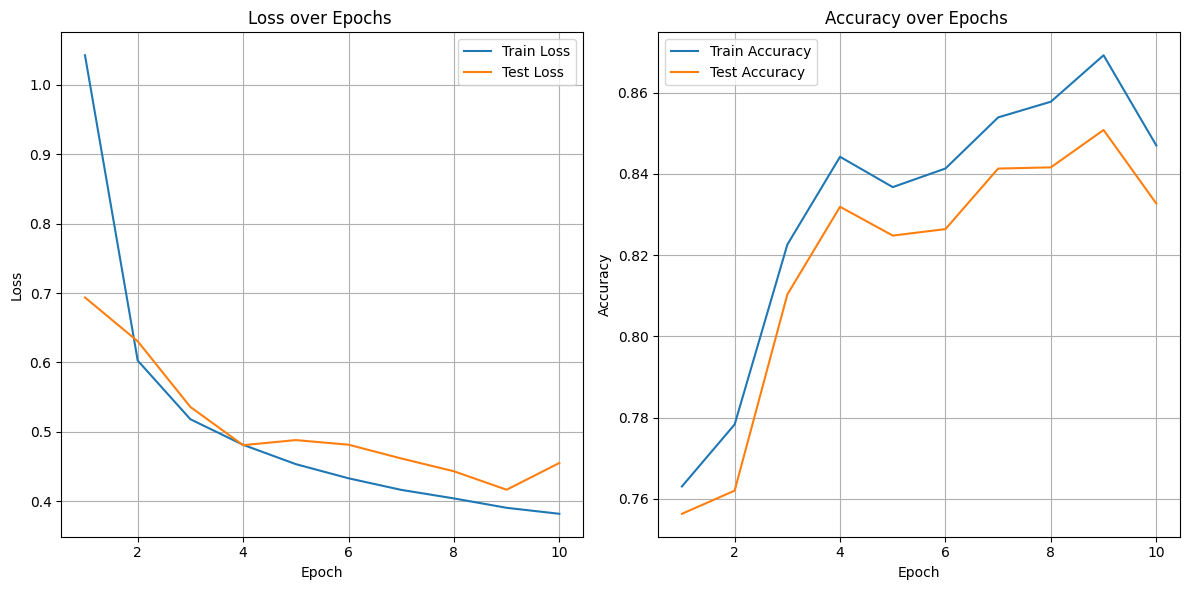

In [ ]:
show_training_graphs(num_epochs, train_losses, test_losses, train_accs, test_accs)

## Exercises

### 1: Change the number of hidden units num_hiddens and plot how its number affects the accuracy of the model. What is the best value of this hyperparameter?



In [ ]:
def gen_logrithm_nums(initial_value = 5, growth_factor = 2, num_elements = 12):
    return [initial_value * growth_factor**i for i in range(num_elements)]


Training with num_hiddens = 64
Epoch 1: train_loss=1.1471, test_loss=0.7178, train_acc=0.7566, test_acc=0.7481
Epoch 2: train_loss=0.6333, test_loss=0.6062, train_acc=0.7978, test_acc=0.7839
Epoch 3: train_loss=0.5383, test_loss=0.5375, train_acc=0.8257, test_acc=0.8173
Epoch 4: train_loss=0.4913, test_loss=0.5105, train_acc=0.8343, test_acc=0.8215
Epoch 5: train_loss=0.4649, test_loss=0.5491, train_acc=0.8083, test_acc=0.7877
Epoch 6: train_loss=0.4452, test_loss=0.4946, train_acc=0.8395, test_acc=0.8232
Epoch 7: train_loss=0.4317, test_loss=0.4559, train_acc=0.8519, test_acc=0.8384
Epoch 8: train_loss=0.4176, test_loss=0.4527, train_acc=0.8534, test_acc=0.8382
Epoch 9: train_loss=0.4043, test_loss=0.4418, train_acc=0.8571, test_acc=0.8409
Epoch 10: train_loss=0.3965, test_loss=0.4377, train_acc=0.8582, test_acc=0.8453


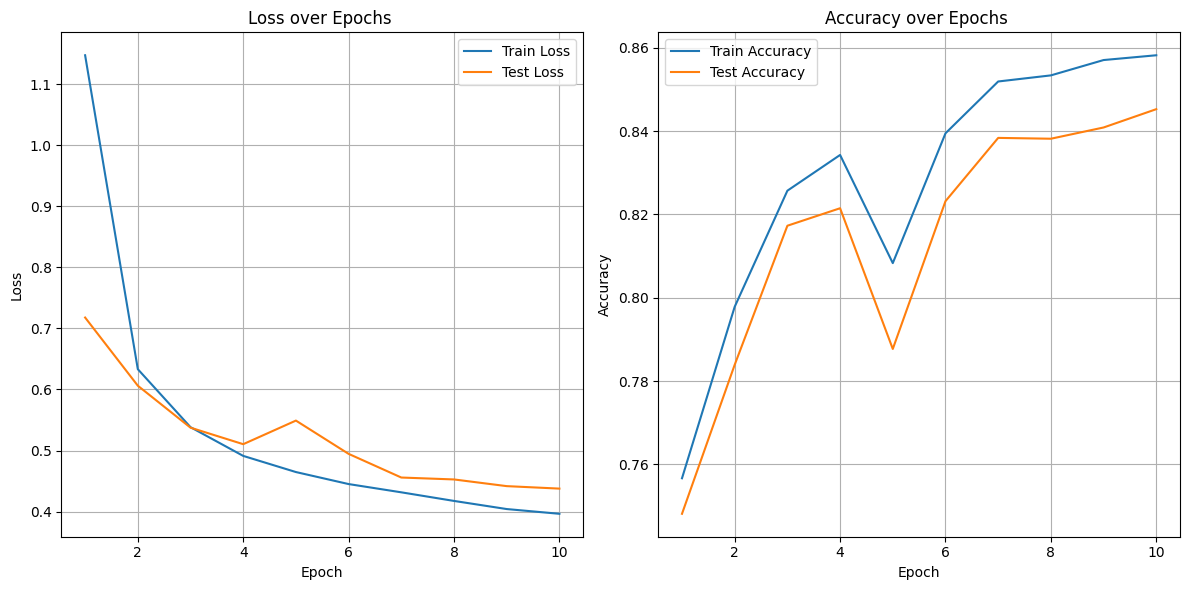

Final Test Accuracy for 64 hidden units: 0.8453

Training with num_hiddens = 128
Epoch 1: train_loss=1.0970, test_loss=0.7088, train_acc=0.7505, test_acc=0.7420
Epoch 2: train_loss=0.6104, test_loss=0.6209, train_acc=0.7819, test_acc=0.7692
Epoch 3: train_loss=0.5281, test_loss=0.5386, train_acc=0.8206, test_acc=0.8113
Epoch 4: train_loss=0.4828, test_loss=0.5338, train_acc=0.8228, test_acc=0.8101
Epoch 5: train_loss=0.4595, test_loss=0.5000, train_acc=0.8348, test_acc=0.8231
Epoch 6: train_loss=0.4384, test_loss=0.4781, train_acc=0.8437, test_acc=0.8317
Epoch 7: train_loss=0.4216, test_loss=0.4557, train_acc=0.8504, test_acc=0.8378
Epoch 8: train_loss=0.4085, test_loss=0.4759, train_acc=0.8402, test_acc=0.8190
Epoch 9: train_loss=0.3956, test_loss=0.4972, train_acc=0.8312, test_acc=0.8096
Epoch 10: train_loss=0.3877, test_loss=0.4449, train_acc=0.8552, test_acc=0.8405


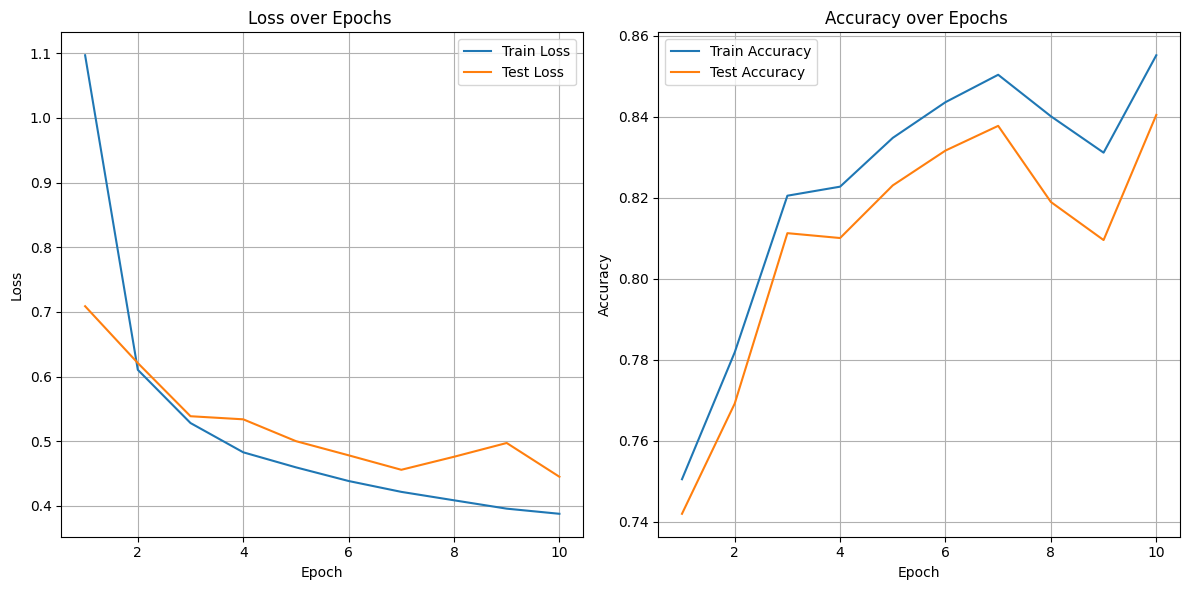

Final Test Accuracy for 128 hidden units: 0.8405

Training with num_hiddens = 256
Epoch 1: train_loss=1.0404, test_loss=0.6842, train_acc=0.7683, test_acc=0.7589
Epoch 2: train_loss=0.5977, test_loss=0.5575, train_acc=0.8203, test_acc=0.8076
Epoch 3: train_loss=0.5172, test_loss=0.5103, train_acc=0.8333, test_acc=0.8185
Epoch 4: train_loss=0.4770, test_loss=0.4777, train_acc=0.8449, test_acc=0.8320
Epoch 5: train_loss=0.4524, test_loss=0.4830, train_acc=0.8400, test_acc=0.8250
Epoch 6: train_loss=0.4332, test_loss=0.4579, train_acc=0.8513, test_acc=0.8369
Epoch 7: train_loss=0.4150, test_loss=0.4600, train_acc=0.8468, test_acc=0.8370
Epoch 8: train_loss=0.4030, test_loss=0.4541, train_acc=0.8558, test_acc=0.8404
Epoch 9: train_loss=0.3908, test_loss=0.4689, train_acc=0.8479, test_acc=0.8349
Epoch 10: train_loss=0.3810, test_loss=0.4194, train_acc=0.8652, test_acc=0.8506


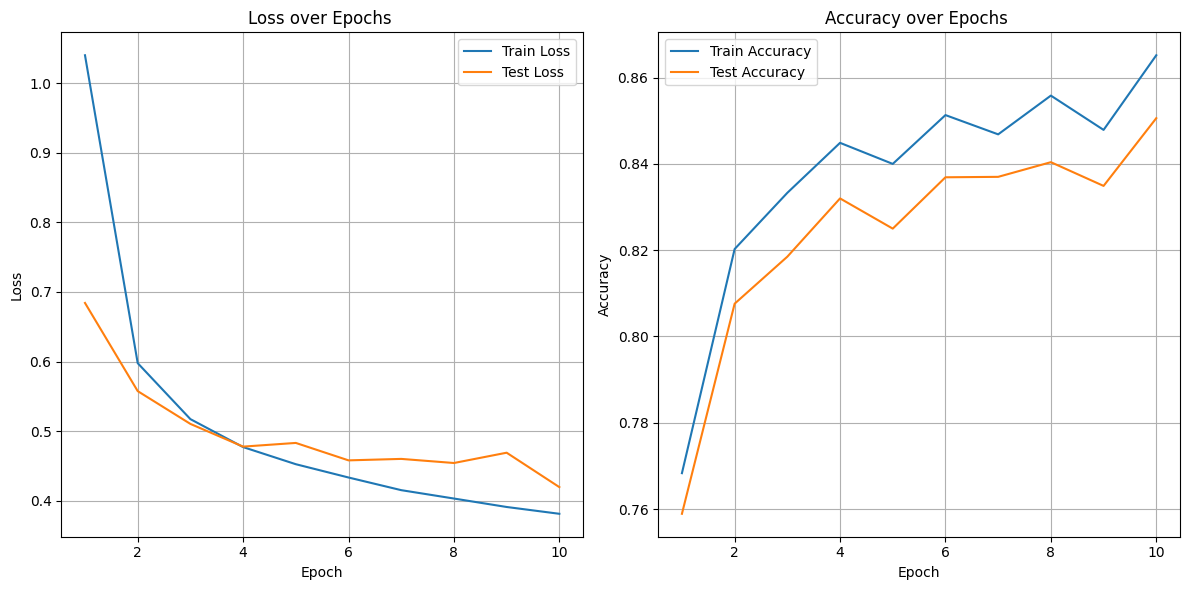

Final Test Accuracy for 256 hidden units: 0.8506

Training with num_hiddens = 512
Epoch 1: train_loss=0.9925, test_loss=0.6554, train_acc=0.7870, test_acc=0.7734
Epoch 2: train_loss=0.5826, test_loss=0.5835, train_acc=0.8020, test_acc=0.7889
Epoch 3: train_loss=0.5137, test_loss=0.5060, train_acc=0.8322, test_acc=0.8188
Epoch 4: train_loss=0.4721, test_loss=0.4934, train_acc=0.8370, test_acc=0.8219
Epoch 5: train_loss=0.4481, test_loss=0.4912, train_acc=0.8342, test_acc=0.8215
Epoch 6: train_loss=0.4289, test_loss=0.5056, train_acc=0.8340, test_acc=0.8213
Epoch 7: train_loss=0.4129, test_loss=0.4394, train_acc=0.8583, test_acc=0.8438
Epoch 8: train_loss=0.4018, test_loss=0.4257, train_acc=0.8642, test_acc=0.8496
Epoch 9: train_loss=0.3874, test_loss=0.4174, train_acc=0.8673, test_acc=0.8482
Epoch 10: train_loss=0.3791, test_loss=0.4170, train_acc=0.8665, test_acc=0.8510


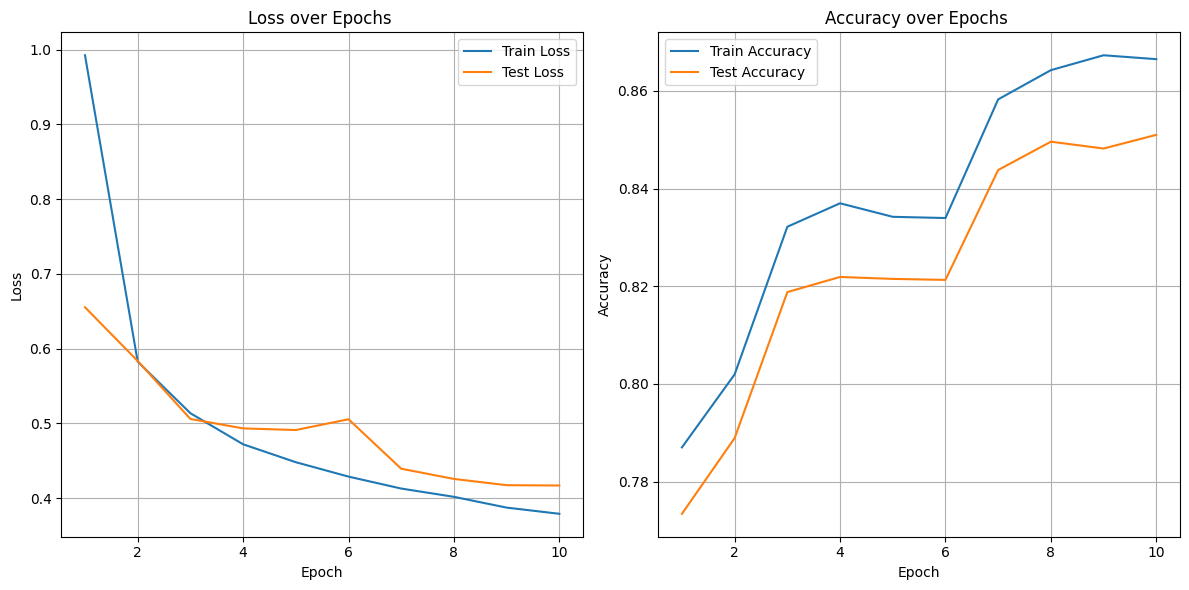

Final Test Accuracy for 512 hidden units: 0.8510

Training with num_hiddens = 1024
Epoch 1: train_loss=0.9360, test_loss=0.6568, train_acc=0.7736, test_acc=0.7650
Epoch 2: train_loss=0.5680, test_loss=0.5817, train_acc=0.8025, test_acc=0.7863
Epoch 3: train_loss=0.5021, test_loss=0.5009, train_acc=0.8359, test_acc=0.8229
Epoch 4: train_loss=0.4683, test_loss=0.4751, train_acc=0.8463, test_acc=0.8358
Epoch 5: train_loss=0.4417, test_loss=0.4726, train_acc=0.8433, test_acc=0.8305
Epoch 6: train_loss=0.4231, test_loss=0.4380, train_acc=0.8581, test_acc=0.8461
Epoch 7: train_loss=0.4066, test_loss=0.4528, train_acc=0.8510, test_acc=0.8326
Epoch 8: train_loss=0.3920, test_loss=0.5232, train_acc=0.8223, test_acc=0.8089
Epoch 9: train_loss=0.3809, test_loss=0.4607, train_acc=0.8483, test_acc=0.8314
Epoch 10: train_loss=0.3735, test_loss=0.4111, train_acc=0.8689, test_acc=0.8542


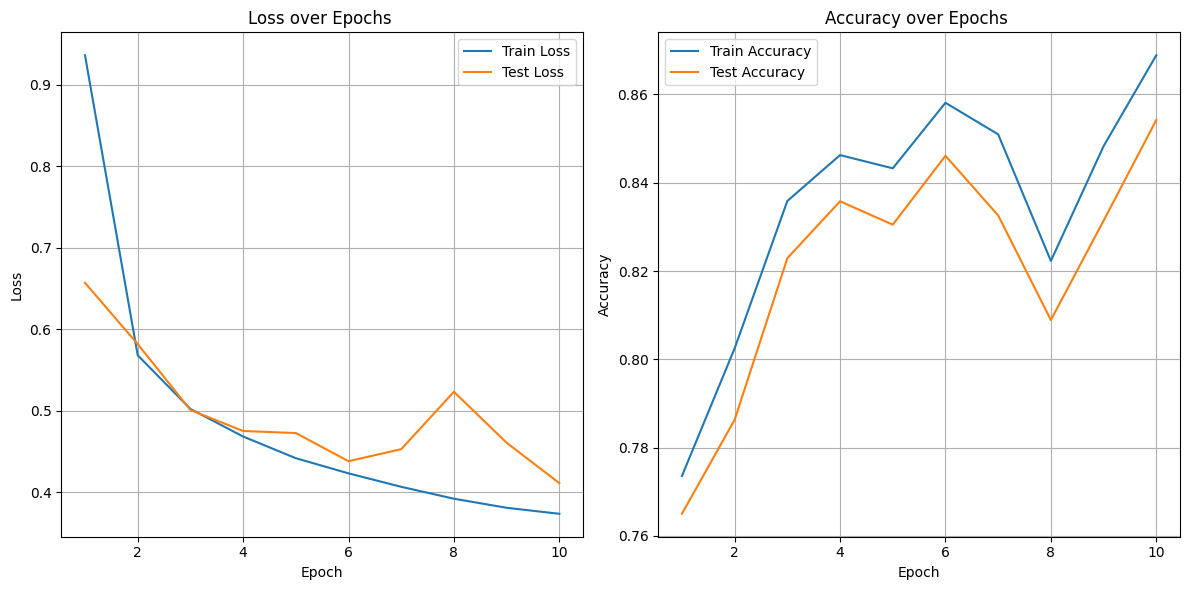

Final Test Accuracy for 1024 hidden units: 0.8542

Training with num_hiddens = 2048
Epoch 1: train_loss=0.8738, test_loss=0.6345, train_acc=0.7848, test_acc=0.7727
Epoch 2: train_loss=0.5580, test_loss=0.7367, train_acc=0.7494, test_acc=0.7398
Epoch 3: train_loss=0.4948, test_loss=0.4924, train_acc=0.8387, test_acc=0.8252
Epoch 4: train_loss=0.4561, test_loss=0.5419, train_acc=0.8200, test_acc=0.8037
Epoch 5: train_loss=0.4342, test_loss=0.4812, train_acc=0.8422, test_acc=0.8289
Epoch 6: train_loss=0.4174, test_loss=0.4393, train_acc=0.8592, test_acc=0.8438
Epoch 7: train_loss=0.4003, test_loss=0.4437, train_acc=0.8569, test_acc=0.8417
Epoch 8: train_loss=0.3888, test_loss=0.4757, train_acc=0.8380, test_acc=0.8187
Epoch 9: train_loss=0.3761, test_loss=0.6905, train_acc=0.7490, test_acc=0.7310
Epoch 10: train_loss=0.3667, test_loss=0.4071, train_acc=0.8709, test_acc=0.8524


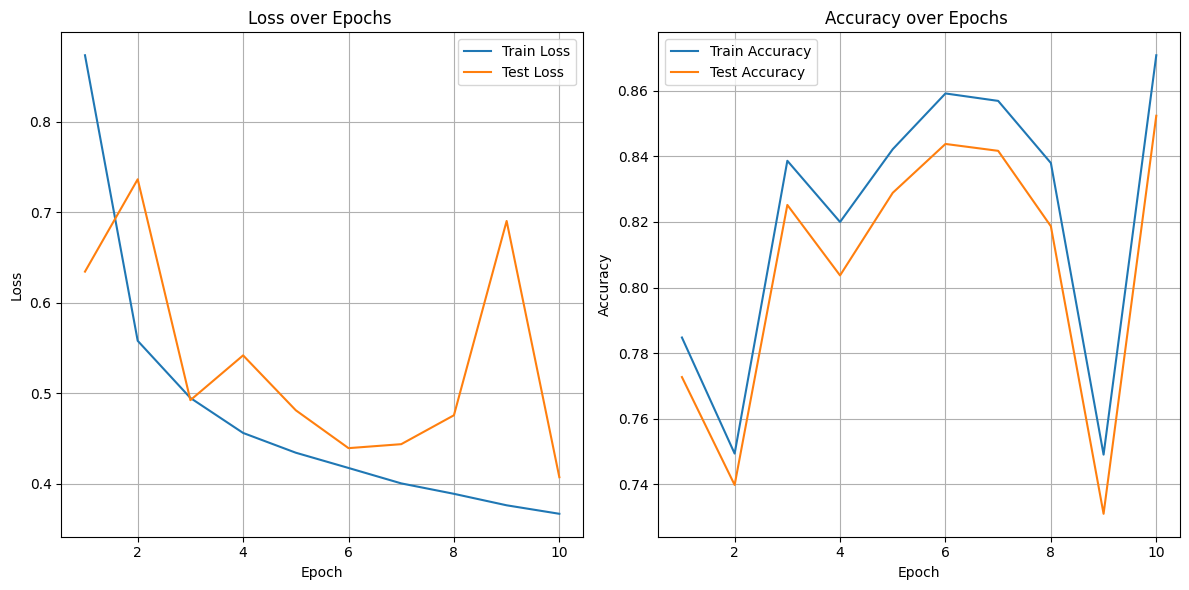

Final Test Accuracy for 2048 hidden units: 0.8524

Training with num_hiddens = 4096
Epoch 1: train_loss=0.8127, test_loss=0.5979, train_acc=0.8024, test_acc=0.7902
Epoch 2: train_loss=0.5388, test_loss=0.5444, train_acc=0.8220, test_acc=0.8087
Epoch 3: train_loss=0.4837, test_loss=0.5253, train_acc=0.8287, test_acc=0.8190
Epoch 4: train_loss=0.4462, test_loss=0.4574, train_acc=0.8535, test_acc=0.8395
Epoch 5: train_loss=0.4247, test_loss=0.4612, train_acc=0.8477, test_acc=0.8333
Epoch 6: train_loss=0.4086, test_loss=0.4575, train_acc=0.8516, test_acc=0.8396
Epoch 7: train_loss=0.3944, test_loss=0.4145, train_acc=0.8705, test_acc=0.8551
Epoch 8: train_loss=0.3785, test_loss=0.4039, train_acc=0.8722, test_acc=0.8559
Epoch 9: train_loss=0.3677, test_loss=0.4440, train_acc=0.8611, test_acc=0.8461
Epoch 10: train_loss=0.3582, test_loss=0.4019, train_acc=0.8733, test_acc=0.8556


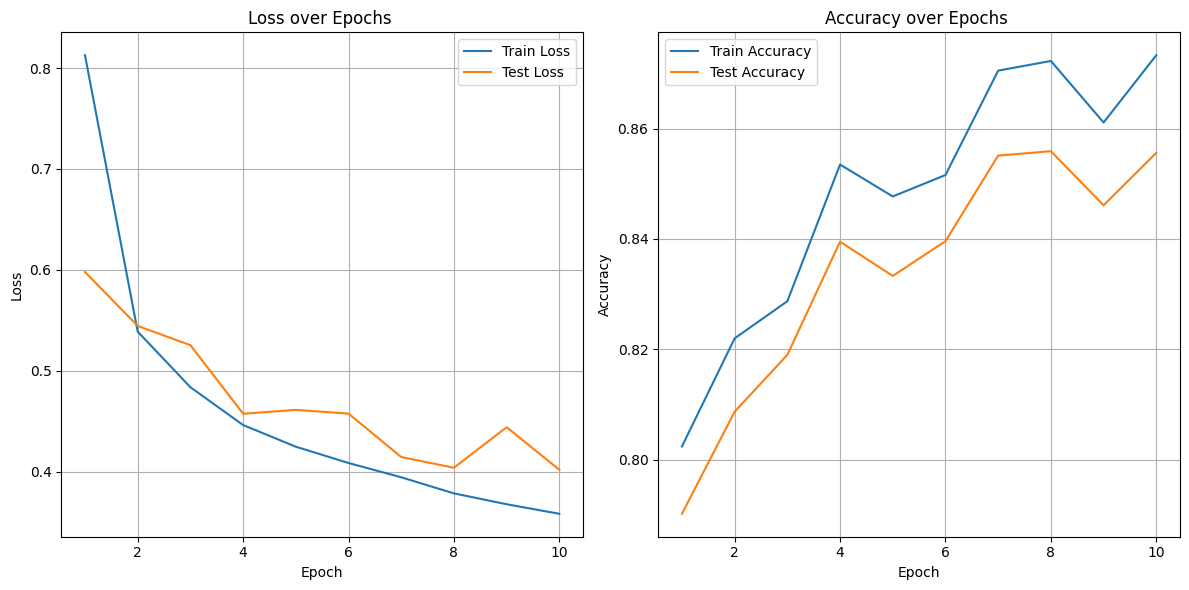

Final Test Accuracy for 4096 hidden units: 0.8556

Training with num_hiddens = 8192
Epoch 1: train_loss=0.7581, test_loss=0.5772, train_acc=0.8164, test_acc=0.8019
Epoch 2: train_loss=0.5198, test_loss=0.5326, train_acc=0.8250, test_acc=0.8143
Epoch 3: train_loss=0.4673, test_loss=0.5780, train_acc=0.7986, test_acc=0.7804
Epoch 4: train_loss=0.4359, test_loss=0.4901, train_acc=0.8418, test_acc=0.8269
Epoch 5: train_loss=0.4113, test_loss=0.4882, train_acc=0.8470, test_acc=0.8343
Epoch 6: train_loss=0.3952, test_loss=0.4280, train_acc=0.8656, test_acc=0.8518
Epoch 7: train_loss=0.3835, test_loss=0.4400, train_acc=0.8557, test_acc=0.8366
Epoch 8: train_loss=0.3686, test_loss=0.4011, train_acc=0.8731, test_acc=0.8543
Epoch 9: train_loss=0.3598, test_loss=0.3941, train_acc=0.8777, test_acc=0.8603
Epoch 10: train_loss=0.3509, test_loss=0.3936, train_acc=0.8778, test_acc=0.8601


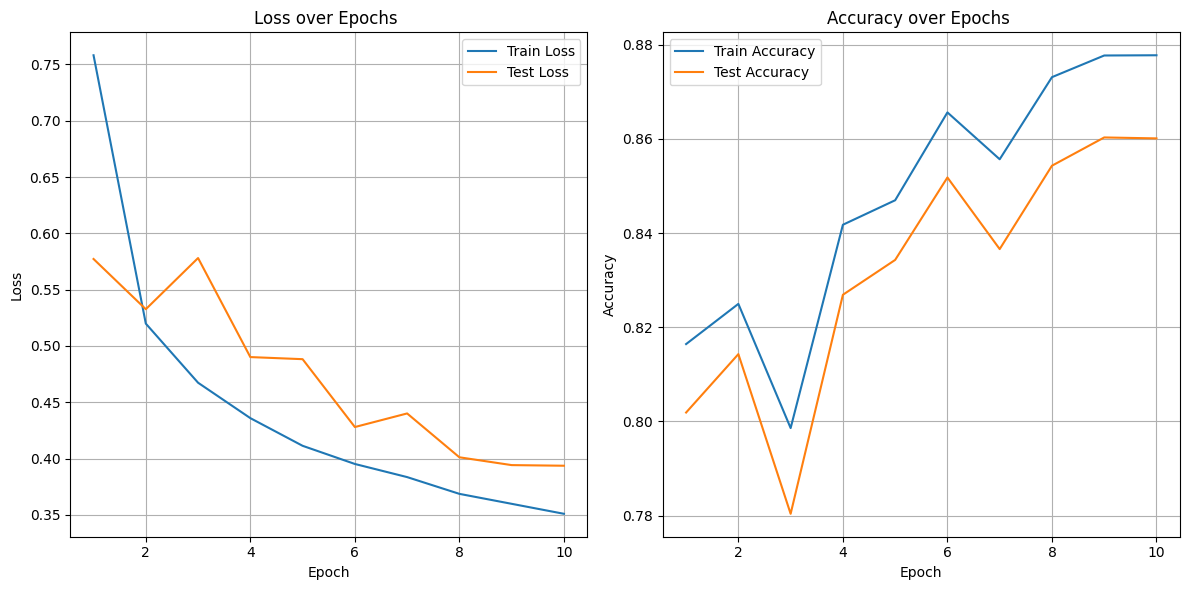

Final Test Accuracy for 8192 hidden units: 0.8601


In [ ]:
num_hiddens = gen_logrithm_nums(initial_value=64, growth_factor=2, num_elements=8)
final_test_accuracies = []
best_accuracy = 0.0
best_num_hiddens = 0

for num_hidden in num_hiddens:
    print(f"\nTraining with num_hiddens = {num_hidden}")
    num_epochs, train_losses, test_losses, train_accs, test_accs = train_model(num_inputs, num_hidden, num_outputs, learning_rate, sigma)
    show_training_graphs(num_epochs, train_losses, test_losses, train_accs, test_accs)
    final_test_accuracies.append(test_accs[-1])
    print(f"Final Test Accuracy for {num_hidden} hidden units: {test_accs[-1]:.4f}")
    if test_accs[-1] > best_accuracy:
        best_accuracy = test_accs[-1]
        best_num_hiddens = num_hidden
print(f"The Best Test Accuracy for num_hiddens {best_num_hiddens}: {best_accuracy:.4f}")

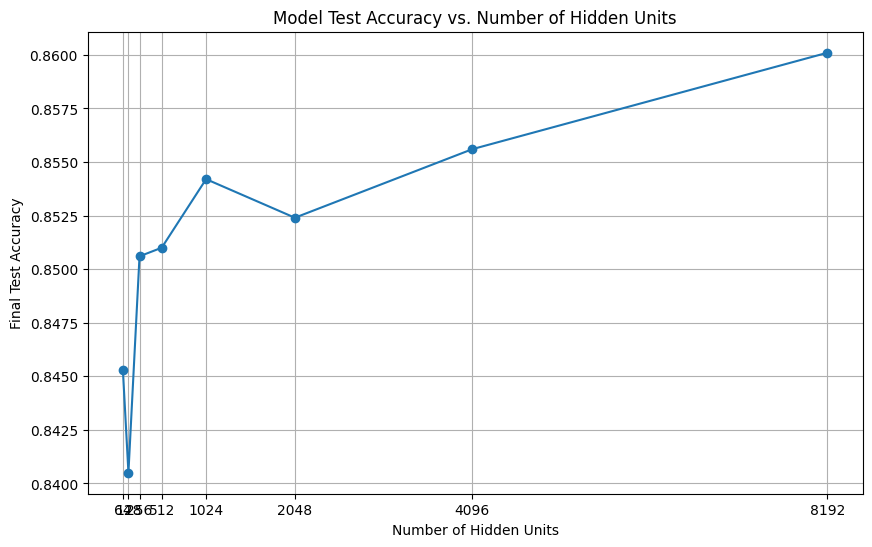

In [ ]:
# Vẽ đồ thị
plt.figure(figsize=(10, 6))
plt.plot(num_hiddens, final_test_accuracies, marker='o', linestyle='-')
plt.title('Model Test Accuracy vs. Number of Hidden Units')
plt.xlabel('Number of Hidden Units')
plt.ylabel('Final Test Accuracy')
plt.xticks(num_hiddens)
plt.grid(True)

*   Thay đổi số neuron trong một lớp ẩn có thể cho độ chính xác tốt hơn, nhưng
tốn tài nguyên nếu số nueron tăng

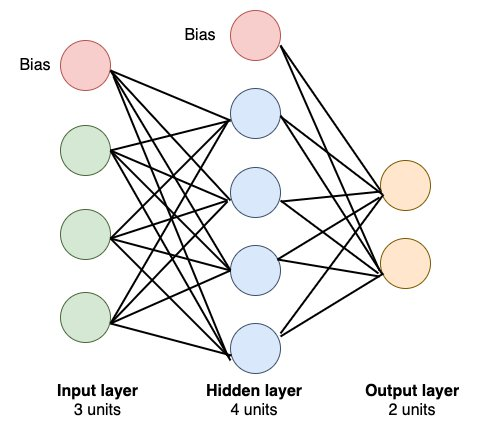

Ta có công thức tính số lượng parameter n lớp ẩn:
$$Parameters=i * h1 + \sum_{k=1}^{n-1}(h_k * h_{k+1}) + h_n * o + \sum_{k=1}^n h_k + o$$
$i$ = số lượng neurons lớp đầu vào \
$h$ = số lượng neurons lớp ẩn \
$o$ = số lượng neurons lớp đầu ra

Công thức tính số lượng parameter 1 lớp ẩn:
$$Parameters=(i * h) + h + (h * o) + o$$
Khi $h$ tăng, số lượng parameter tăng tuyến tính với $h$, dẫn đến khả năng biểu diễn phức tạp hơn (do kích thước tập huấn luyện và độ phức tạp của dữ liệu tăng) cũng như tốn tài nguyên hơn.

### 2: Try adding a hidden layer to see how it affects the results.

In [ ]:
def init_params_n_hidden_layer(layer_dims, sigma=0.01):
    params = {}
    L = len(layer_dims) - 1 # Tổng số lớp có trọng số (hidden + output)

    for l in range(1, L + 1):
        params['W' + str(l)] = np.random.randn(layer_dims[l-1], layer_dims[l]) * sigma
        params['b' + str(l)] = np.zeros((1, layer_dims[l]))
    return params

In [ ]:
def forward_propagation_n_hidden_layer(X, params, num_total_layers):
    cache_A = {0: X} # A0 là X
    cache_Z = {}
    A_curr = X

    # Lớp ẩn (ReLU)
    for l in range(1, num_total_layers): # l từ 1 đến L-1
        Wl = params['W' + str(l)]
        bl = params['b' + str(l)]
        Zl = A_curr.dot(Wl) + bl
        A_curr = relu(Zl)
        cache_Z[l] = Zl
        cache_A[l] = A_curr

    # Lớp đầu ra (Softmax) - lớp L
    WL = params['W' + str(num_total_layers)]
    bL = params['b' + str(num_total_layers)]
    ZL = A_curr.dot(WL) + bL
    Y_hat = softmax(ZL)
    cache_Z[num_total_layers] = ZL
    cache_A[num_total_layers] = Y_hat # AL là Y_hat

    return Y_hat, (cache_A, cache_Z)

In [ ]:
def backward_propagation_n_hidden_layers(X, Y, Y_hat, cache, params, num_total_layers):
    cache_A, cache_Z = cache
    grads = {}
    loss_val, dZ_curr = cross_entropy_loss(Y_hat, Y) # dZL là gradient của loss w.r.t Z của lớp output

    for l_idx in range(num_total_layers, 0, -1): # L, L-1, ..., 1
        A_prev = cache_A[l_idx-1] # Activation ở lớp ẩn phía trước (A0 là X ở l_idx=1)
        Wl = params['W' + str(l_idx)]

        # Gradients cho Wl and bl
        grads['dW' + str(l_idx)] = A_prev.T.dot(dZ_curr)
        grads['db' + str(l_idx)] = np.sum(dZ_curr, axis=0, keepdims=True)

        # Tính dZ cho lớp ẩn phía trước, nếu không phải là lớp đầu vào
        if l_idx > 1:
            dA_prev = dZ_curr.dot(Wl.T) # Gradient w.r.t. activation of previous layer (A_{l-1})
            Z_prev = cache_Z[l_idx-1]   # Z value of the previous layer (Z_{l-1})
            dZ_curr = dA_prev * relu_derivative(Z_prev) # Gradient w.r.t. Z of previous layer

    return grads

def update_params_n_hidden_layers(params, grads, learning_rate, num_total_layers):
    for l in range(1, num_total_layers + 1):
        params['W' + str(l)] -= learning_rate * grads['dW' + str(l)]
        params['b' + str(l)] -= learning_rate * grads['db' + str(l)]

In [ ]:
def evaluate_accuracy_n_hidden_layers(data_loader, params, layer_dims):
    correct = total = 0
    num_total_layers = len(layer_dims) - 1
    num_inputs = layer_dims[0]
    for X_t, y_t in data_loader:
        X_t = X_t.to(device)
        y_t = y_t.to(device)
        X_np = X_t.cpu().numpy().reshape(-1, num_inputs)
        y_np = y_t.cpu().numpy()

        Y_hat, _ = forward_propagation_n_hidden_layer(X_np, params, num_total_layers)
        y_pred = np.argmax(Y_hat, axis=1)
        correct += np.sum(y_pred == y_np)
        total += y_t.shape[0]
    return correct / total

def evaluate_loss_n_hidden_layers(data_loader, params, layer_dims):
    total_loss = 0.0
    total_samples = 0
    num_total_layers = len(layer_dims) - 1
    num_inputs = layer_dims[0]
    for X_t, y_t in data_loader:
        X_t = X_t.to(device)
        y_t = y_t.to(device)
        X_np = X_t.cpu().numpy().reshape(-1, num_inputs)
        y_np = y_t.cpu().numpy()

        Y_hat, _ = forward_propagation_n_hidden_layer(X_np, params, num_total_layers)
        loss, _ = cross_entropy_loss(Y_hat, y_np)
        total_loss += loss * X_np.shape[0]
        total_samples += X_np.shape[0]
    return total_loss / total_samples

In [ ]:
def train_model_n_hidden_layers(layer_dims, learning_rate=0.1, sigma=0.01, num_epochs=10):
    params = init_params_n_hidden_layer(layer_dims, sigma)
    num_total_layers = len(layer_dims) - 1
    num_inputs = layer_dims[0]

    train_losses = []
    test_losses = []
    train_accs = []
    test_accs = []

    print(f"Starting training with architecture: {layer_dims}")
    for epoch in range(1, num_epochs + 1):
        epoch_train_loss = 0.0
        for X_batch_t, y_batch_t in train_loader:
            # Chuyển sang numpy
            X_batch_t = X_batch_t.to(device)
            y_batch_t = y_batch_t.to(device)
            X_batch_np = X_batch_t.cpu().numpy().reshape(-1, num_inputs)
            y_batch_np = y_batch_t.cpu().numpy()

            # Forward propagation
            Y_hat, cache = forward_propagation_n_hidden_layer(X_batch_np, params, num_total_layers)

            # Tính loss (dZ cho output layer thì cũng được tiinhs trong cross_entropy_loss)
            current_loss, _ = cross_entropy_loss(Y_hat, y_batch_np)
            epoch_train_loss += current_loss * X_batch_np.shape[0]

            # Backward propagation
            grads = backward_propagation_n_hidden_layers(X_batch_np, y_batch_np, Y_hat, cache, params, num_total_layers)

            # Cập nhật parameters
            update_params_n_hidden_layers(params, grads, learning_rate, num_total_layers)

        # Evaluate and store metrics for the epoch
        avg_epoch_train_loss = epoch_train_loss / len(train_ds)
        train_losses.append(avg_epoch_train_loss)

        current_test_loss = evaluate_loss_n_hidden_layers(test_loader, params, layer_dims)
        test_losses.append(current_test_loss)

        current_train_acc = evaluate_accuracy_n_hidden_layers(train_loader, params, layer_dims)
        train_accs.append(current_train_acc)

        current_test_acc = evaluate_accuracy_n_hidden_layers(test_loader, params, layer_dims)
        test_accs.append(current_test_acc)

        print(f"Epoch {epoch}/{num_epochs}: "
              f"train_loss={avg_epoch_train_loss:.4f}, "
              f"test_loss={current_test_loss:.4f}, "
              f"train_acc={current_train_acc:.4f}, "
              f"test_acc={current_test_acc:.4f}")

    return num_epochs, train_losses, test_losses, train_accs, test_accs, params

*   Implement MLP với 2 lớp ẩn


In [ ]:
layer_dimensions  = [784, 256, 128, 10]
trained_epochs, t_losses, v_losses, t_accs, v_accs, trained_params = train_model_n_hidden_layers(
        layer_dims=layer_dimensions,
        learning_rate=learning_rate,
        sigma=sigma,
        num_epochs=num_epochs
    )

Starting training with architecture: [784, 256, 128, 10]
Epoch 1/10: train_loss=1.8136, test_loss=1.1602, train_acc=0.5488, test_acc=0.5420
Epoch 2/10: train_loss=0.9086, test_loss=0.8539, train_acc=0.6910, test_acc=0.6830
Epoch 3/10: train_loss=0.7014, test_loss=0.6460, train_acc=0.7772, test_acc=0.7634
Epoch 4/10: train_loss=0.5953, test_loss=0.5647, train_acc=0.8098, test_acc=0.8002
Epoch 5/10: train_loss=0.5392, test_loss=0.5329, train_acc=0.8251, test_acc=0.8118
Epoch 6/10: train_loss=0.4947, test_loss=0.5520, train_acc=0.8009, test_acc=0.7952
Epoch 7/10: train_loss=0.4598, test_loss=0.4828, train_acc=0.8387, test_acc=0.8226
Epoch 8/10: train_loss=0.4341, test_loss=0.4705, train_acc=0.8471, test_acc=0.8358
Epoch 9/10: train_loss=0.4160, test_loss=0.4352, train_acc=0.8588, test_acc=0.8434
Epoch 10/10: train_loss=0.3971, test_loss=0.4271, train_acc=0.8609, test_acc=0.8465


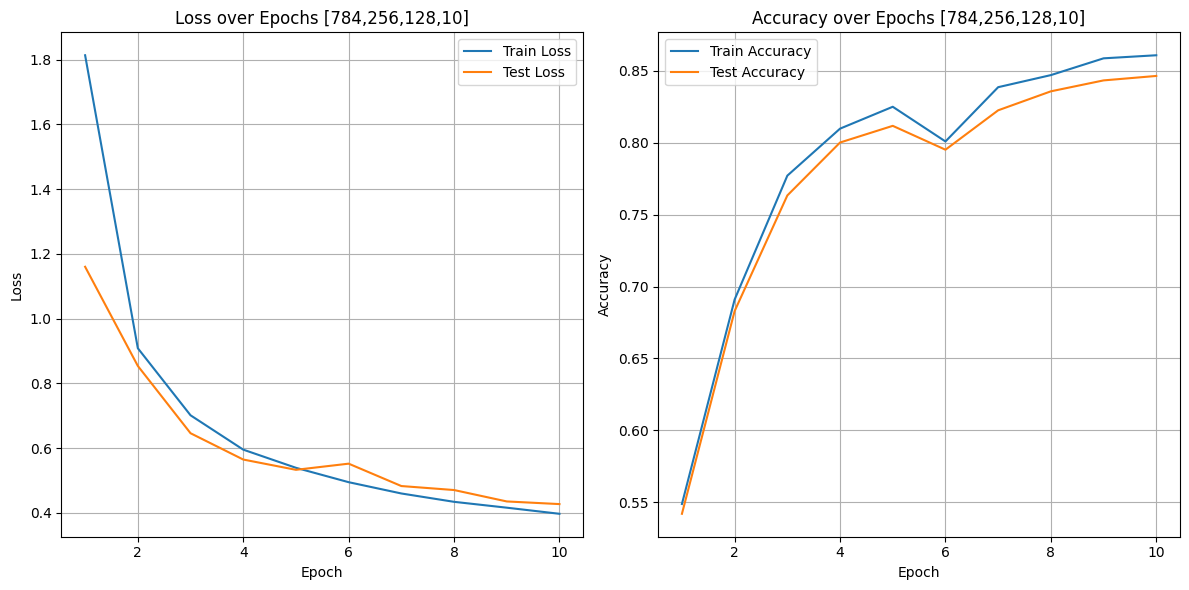

In [ ]:
layer_dims_for_plot = str(layer_dimensions).replace(" ","")
show_training_graphs(trained_epochs, t_losses, v_losses, t_accs, v_accs, layer_dims_str=layer_dims_for_plot)

*   Implement với 3 lớp ẩn

In [ ]:
layer_dimensions  = [784, 256, 128, 64, 10]
trained_epochs, t_losses, v_losses, t_accs, v_accs, trained_params = train_model_n_hidden_layers(
        layer_dims=layer_dimensions,
        learning_rate=learning_rate,
        sigma=sigma,
        num_epochs=num_epochs
    )

Starting training with architecture: [784, 256, 128, 64, 10]
Epoch 1/10: train_loss=2.3027, test_loss=2.3025, train_acc=0.1000, test_acc=0.1000
Epoch 2/10: train_loss=2.3025, test_loss=2.3022, train_acc=0.1000, test_acc=0.1000
Epoch 3/10: train_loss=2.3002, test_loss=2.2899, train_acc=0.2547, test_acc=0.2548
Epoch 4/10: train_loss=1.7637, test_loss=1.3521, train_acc=0.3798, test_acc=0.3782
Epoch 5/10: train_loss=1.2729, test_loss=1.0967, train_acc=0.5498, test_acc=0.5486
Epoch 6/10: train_loss=1.0261, test_loss=1.0586, train_acc=0.6126, test_acc=0.6063
Epoch 7/10: train_loss=0.8381, test_loss=0.7421, train_acc=0.7177, test_acc=0.7147
Epoch 8/10: train_loss=0.7059, test_loss=0.6547, train_acc=0.7688, test_acc=0.7607
Epoch 9/10: train_loss=0.6182, test_loss=0.6125, train_acc=0.7875, test_acc=0.7740
Epoch 10/10: train_loss=0.5578, test_loss=0.6294, train_acc=0.7884, test_acc=0.7804


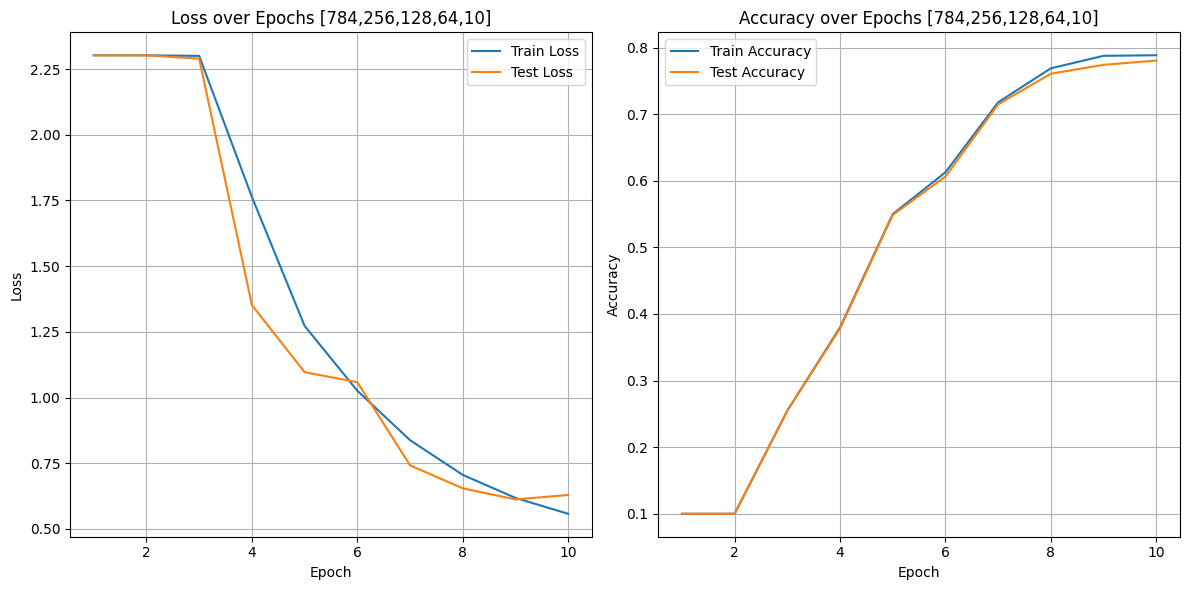

In [ ]:
layer_dims_for_plot = str(layer_dimensions).replace(" ","")
show_training_graphs(trained_epochs, t_losses, v_losses, t_accs, v_accs, layer_dims_str=layer_dims_for_plot)

*   Implement với 4 lớp ẩn

In [ ]:
layer_dimensions  = [784, 512, 256, 128, 64, 10]
trained_epochs, t_losses, v_losses, t_accs, v_accs, trained_params = train_model_n_hidden_layers(
        layer_dims=layer_dimensions,
        learning_rate=learning_rate,
        sigma=sigma,
        num_epochs=num_epochs
    )

Starting training with architecture: [784, 512, 256, 128, 64, 10]
Epoch 1/10: train_loss=2.3027, test_loss=2.3026, train_acc=0.1000, test_acc=0.1000
Epoch 2/10: train_loss=2.3027, test_loss=2.3026, train_acc=0.1000, test_acc=0.1000
Epoch 3/10: train_loss=2.3027, test_loss=2.3026, train_acc=0.1000, test_acc=0.1000
Epoch 4/10: train_loss=2.3027, test_loss=2.3026, train_acc=0.1000, test_acc=0.1000
Epoch 5/10: train_loss=2.3027, test_loss=2.3026, train_acc=0.1000, test_acc=0.1000
Epoch 6/10: train_loss=2.3027, test_loss=2.3026, train_acc=0.1000, test_acc=0.1000
Epoch 7/10: train_loss=2.3027, test_loss=2.3026, train_acc=0.1547, test_acc=0.1522
Epoch 8/10: train_loss=2.3027, test_loss=2.3025, train_acc=0.1000, test_acc=0.1000
Epoch 9/10: train_loss=2.3026, test_loss=2.3025, train_acc=0.1000, test_acc=0.1000
Epoch 10/10: train_loss=2.3025, test_loss=2.3024, train_acc=0.1090, test_acc=0.1095


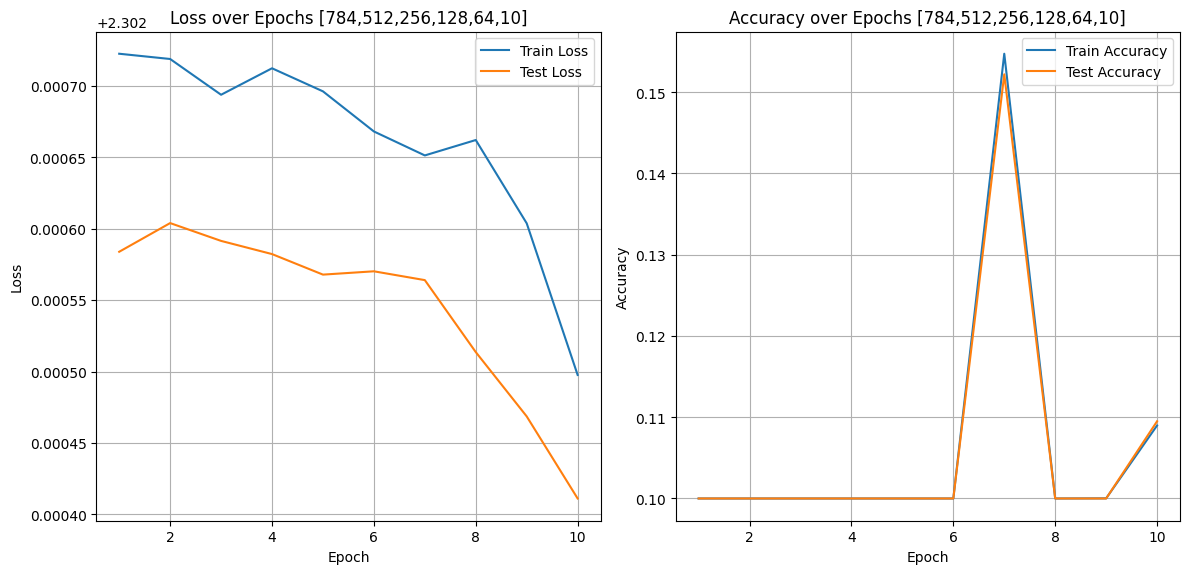

In [ ]:
layer_dims_for_plot = str(layer_dimensions).replace(" ","")
show_training_graphs(trained_epochs, t_losses, v_losses, t_accs, v_accs, layer_dims_str=layer_dims_for_plot)

* Tăng số lớp ẩn có thể cho độ chính xác tốt hơn. Nhưng tăng quá nhiều lớp dễ đẫn đến overfitting và tốn tài nguyên.

### 3: Why is it a bad idea to insert a hidden layer with a single neuron? What could go wrong?
Việc thêm một lớp ẩn chỉ với một neuron duy nhất vào một MLP thường là một ý tưởng không tốt vì nó tạo ra một "Bottleneck" nghiêm trọng về thông tin và hạn chế đáng kể khả năng biểu diễn của mạng. Lớp này sẽ nén toàn bộ thông tin đầu vào thành một giá trị duy nhất, khiến mạng không thể học được các đặc trưng phức tạp trong dữ liệu. \
Trong một MLP, các lớp ẩn được thiết kế để học các biểu diễn trung gian, phi tuyến của dữ liệu đầu vào. Các neuron trong lớp ẩn kết hợp các tín hiệu từ lớp trước đó và áp dụng một hàm kích hoạt (thường là phi tuyến như ReLU, sigmoid, tanh) để tạo ra các đặc trưng mới. Những đặc trưng này sau đó được sử dụng bởi các lớp tiếp theo để thực hiện nhiệm vụ (ví dụ: phân loại hoặc hồi quy). Số lượng neuron trong một lớp ẩn thường liên quan đến độ phức tạp của các hàm mà mạng có thể học
*   Giảm chiều dữ liệu xuống 1: \
Một lớp ẩn với 1 neuron sẽ biến mọi đầu vào (dù có nhiều chiều) thành một số duy nhất. Như vậy, mọi thông tin phân biệt giữa các điểm dữ liệu chỉ còn lại trên một trục số, khiến mạng chỉ có thể học các ranh giới quyết định tuyến tính (một đường thẳng trên trục số).
*   Không đủ khả năng phân biệt: \
Nếu đầu vào phức tạp, ví dụ như hình ảnh hoặc dữ liệu nhiều chiều, việc nén toàn bộ xuống 1 chiều sẽ làm mất mát thông tin quan trọng. Mạng sẽ không thể phân biệt được các mẫu dữ liệu có đặc trưng khác nhau nhưng lại có cùng giá trị sau khi qua lớp 1 neuron này.
*   Giới hạn khả năng mô hình hóa: \
Mỗi neuron trong lớp ẩn giống như một bộ lọc đặc trưng. Nếu chỉ có 1 neuron, mạng chỉ học được một đặc trưng duy nhất. Để mô hình hóa các quan hệ phi tuyến tính phức tạp, cần nhiều neuron để tạo ra nhiều đặc trưng khác nhau




*   Implement 1 lớp ẩn với 1 neron

In [ ]:
layer_dimensions  = [784, 1, 10]
# num_epochs        = 20
trained_epochs, t_losses, v_losses, t_accs, v_accs, trained_params = train_model_n_hidden_layers(
        layer_dims=layer_dimensions,
        learning_rate=learning_rate,
        sigma=sigma,
        num_epochs=num_epochs
    )

Starting training with architecture: [784, 1, 10]
Epoch 1/10: train_loss=2.0206, test_loss=1.8367, train_acc=0.2768, test_acc=0.2765
Epoch 2/10: train_loss=1.7114, test_loss=1.6538, train_acc=0.3406, test_acc=0.3366
Epoch 3/10: train_loss=1.6097, test_loss=1.5766, train_acc=0.3540, test_acc=0.3585
Epoch 4/10: train_loss=1.5534, test_loss=1.5530, train_acc=0.3352, test_acc=0.3348
Epoch 5/10: train_loss=1.5217, test_loss=1.5032, train_acc=0.3681, test_acc=0.3682
Epoch 6/10: train_loss=1.4992, test_loss=1.5200, train_acc=0.3224, test_acc=0.3181
Epoch 7/10: train_loss=1.4766, test_loss=1.4801, train_acc=0.3530, test_acc=0.3523
Epoch 8/10: train_loss=1.4612, test_loss=1.4489, train_acc=0.3650, test_acc=0.3615
Epoch 9/10: train_loss=1.4476, test_loss=1.4836, train_acc=0.3461, test_acc=0.3420
Epoch 10/10: train_loss=1.4343, test_loss=1.4413, train_acc=0.3651, test_acc=0.3619


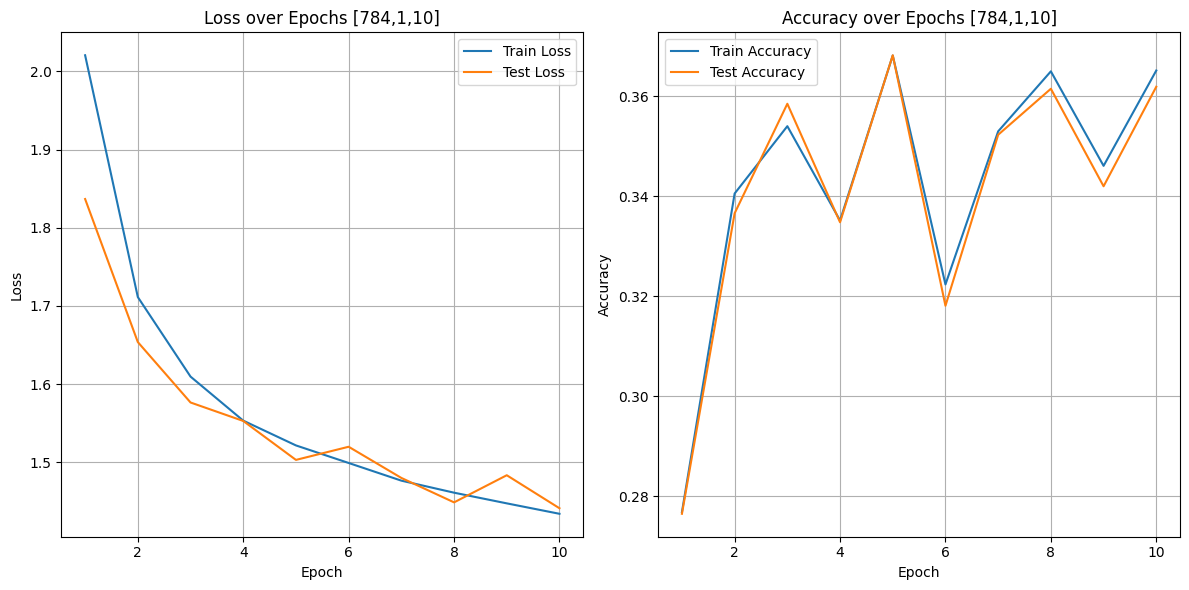

In [ ]:
layer_dims_for_plot = str(layer_dimensions).replace(" ","")
show_training_graphs(trained_epochs, t_losses, v_losses, t_accs, v_accs, layer_dims_str=layer_dims_for_plot)

### 4: How does changing the learning rate alter your results? With all other parameters fixed, which learning rate gives you the best results? How does this relate to the number of epochs?


Training with learning_rate = 0.001
Starting training with architecture: [784, 256, 10]
Epoch 1/10: train_loss=2.2938, test_loss=2.2857, train_acc=0.1686, test_acc=0.1623
Epoch 2/10: train_loss=2.2765, test_loss=2.2669, train_acc=0.2051, test_acc=0.2010
Epoch 3/10: train_loss=2.2553, test_loss=2.2431, train_acc=0.2177, test_acc=0.2142
Epoch 4/10: train_loss=2.2281, test_loss=2.2124, train_acc=0.2362, test_acc=0.2344
Epoch 5/10: train_loss=2.1933, test_loss=2.1733, train_acc=0.2509, test_acc=0.2505
Epoch 6/10: train_loss=2.1492, test_loss=2.1244, train_acc=0.2816, test_acc=0.2777
Epoch 7/10: train_loss=2.0948, test_loss=2.0648, train_acc=0.3403, test_acc=0.3321
Epoch 8/10: train_loss=2.0297, test_loss=1.9949, train_acc=0.4381, test_acc=0.4284
Epoch 9/10: train_loss=1.9553, test_loss=1.9172, train_acc=0.4972, test_acc=0.4875
Epoch 10/10: train_loss=1.8749, test_loss=1.8357, train_acc=0.5413, test_acc=0.5294


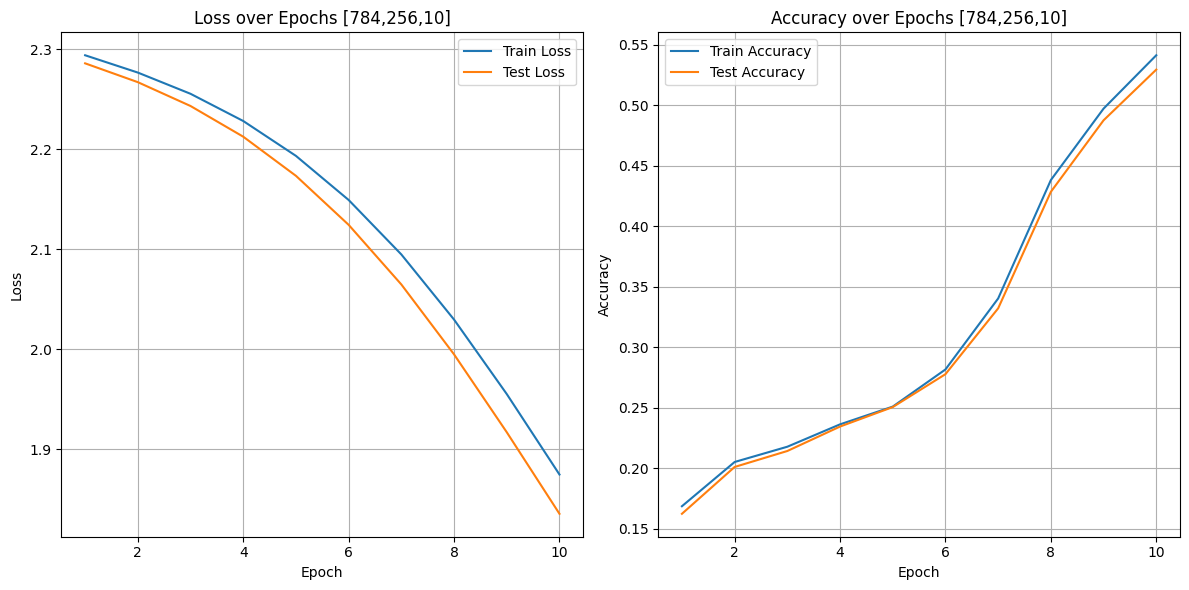

Final Test Accuracy for learning_rate 0.001: 0.5294

Training with learning_rate = 0.01
Starting training with architecture: [784, 256, 10]
Epoch 1/10: train_loss=2.1480, test_loss=1.8605, train_acc=0.4491, test_acc=0.4438
Epoch 2/10: train_loss=1.5214, test_loss=1.2676, train_acc=0.6352, test_acc=0.6284
Epoch 3/10: train_loss=1.1140, test_loss=1.0098, train_acc=0.6528, test_acc=0.6422
Epoch 4/10: train_loss=0.9305, test_loss=0.8873, train_acc=0.6827, test_acc=0.6711
Epoch 5/10: train_loss=0.8363, test_loss=0.8184, train_acc=0.6959, test_acc=0.6814
Epoch 6/10: train_loss=0.7782, test_loss=0.7715, train_acc=0.7231, test_acc=0.7106
Epoch 7/10: train_loss=0.7359, test_loss=0.7345, train_acc=0.7425, test_acc=0.7316
Epoch 8/10: train_loss=0.7014, test_loss=0.7052, train_acc=0.7548, test_acc=0.7410
Epoch 9/10: train_loss=0.6717, test_loss=0.6760, train_acc=0.7710, test_acc=0.7623
Epoch 10/10: train_loss=0.6460, test_loss=0.6551, train_acc=0.7819, test_acc=0.7721


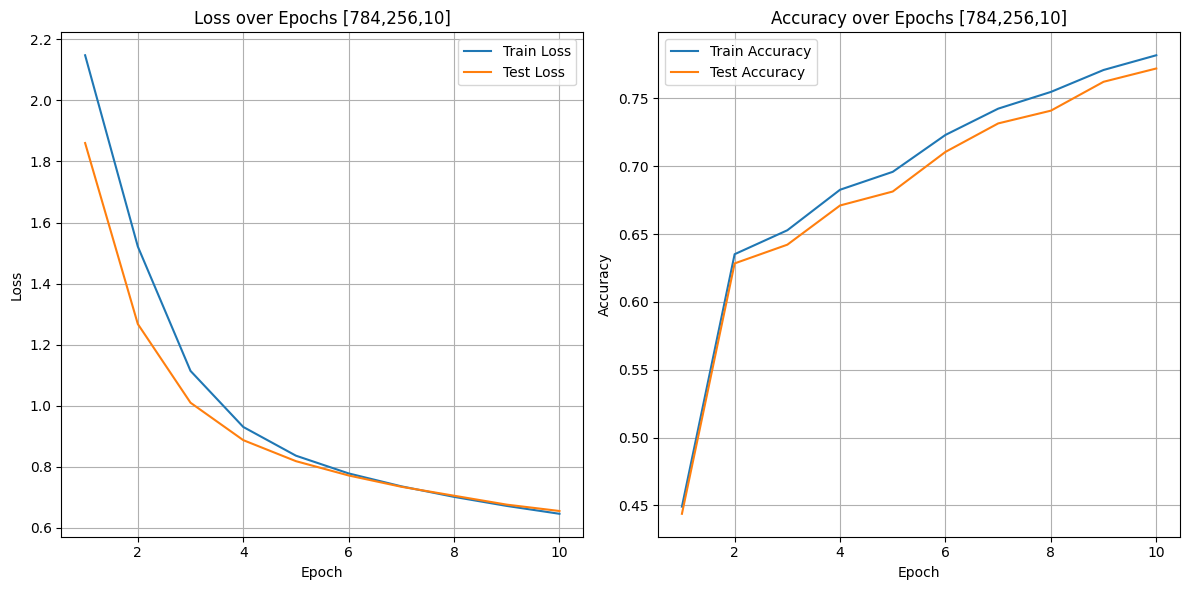

Final Test Accuracy for learning_rate 0.01: 0.7721

Training with learning_rate = 0.1
Starting training with architecture: [784, 256, 10]
Epoch 1/10: train_loss=1.0443, test_loss=0.7329, train_acc=0.7362, test_acc=0.7286
Epoch 2/10: train_loss=0.6029, test_loss=0.6398, train_acc=0.7821, test_acc=0.7671
Epoch 3/10: train_loss=0.5200, test_loss=0.5734, train_acc=0.8089, test_acc=0.7956
Epoch 4/10: train_loss=0.4826, test_loss=0.5137, train_acc=0.8303, test_acc=0.8222
Epoch 5/10: train_loss=0.4539, test_loss=0.5275, train_acc=0.8305, test_acc=0.8171
Epoch 6/10: train_loss=0.4347, test_loss=0.4712, train_acc=0.8456, test_acc=0.8312
Epoch 7/10: train_loss=0.4201, test_loss=0.4591, train_acc=0.8483, test_acc=0.8310
Epoch 8/10: train_loss=0.4053, test_loss=0.4713, train_acc=0.8461, test_acc=0.8315
Epoch 9/10: train_loss=0.3945, test_loss=0.4228, train_acc=0.8644, test_acc=0.8441
Epoch 10/10: train_loss=0.3824, test_loss=0.4270, train_acc=0.8621, test_acc=0.8462


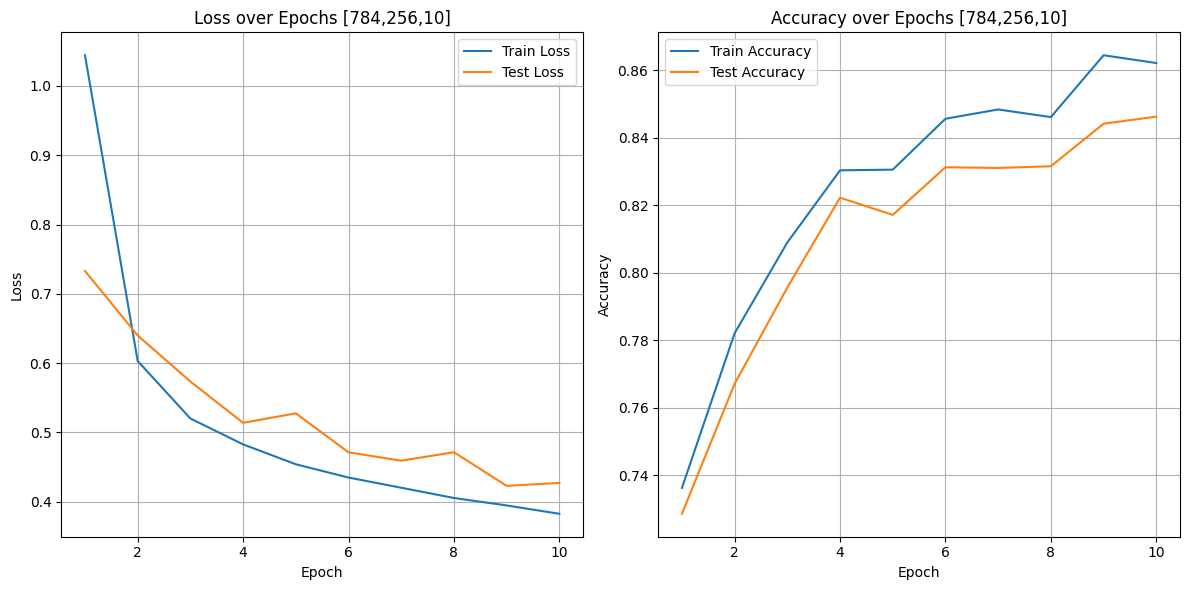

Final Test Accuracy for learning_rate 0.1: 0.8462

Training with learning_rate = 0.3
Starting training with architecture: [784, 256, 10]
Epoch 1/10: train_loss=0.7996, test_loss=0.6212, train_acc=0.7742, test_acc=0.7624
Epoch 2/10: train_loss=0.4932, test_loss=0.5438, train_acc=0.8068, test_acc=0.7966
Epoch 3/10: train_loss=0.4345, test_loss=0.8492, train_acc=0.7155, test_acc=0.7035
Epoch 4/10: train_loss=0.3995, test_loss=0.4071, train_acc=0.8690, test_acc=0.8542
Epoch 5/10: train_loss=0.3777, test_loss=0.4613, train_acc=0.8497, test_acc=0.8334
Epoch 6/10: train_loss=0.3605, test_loss=0.3998, train_acc=0.8725, test_acc=0.8559
Epoch 7/10: train_loss=0.3443, test_loss=0.4624, train_acc=0.8557, test_acc=0.8381
Epoch 8/10: train_loss=0.3338, test_loss=0.4081, train_acc=0.8679, test_acc=0.8482
Epoch 9/10: train_loss=0.3226, test_loss=0.4019, train_acc=0.8767, test_acc=0.8575
Epoch 10/10: train_loss=0.3162, test_loss=0.3836, train_acc=0.8781, test_acc=0.8579


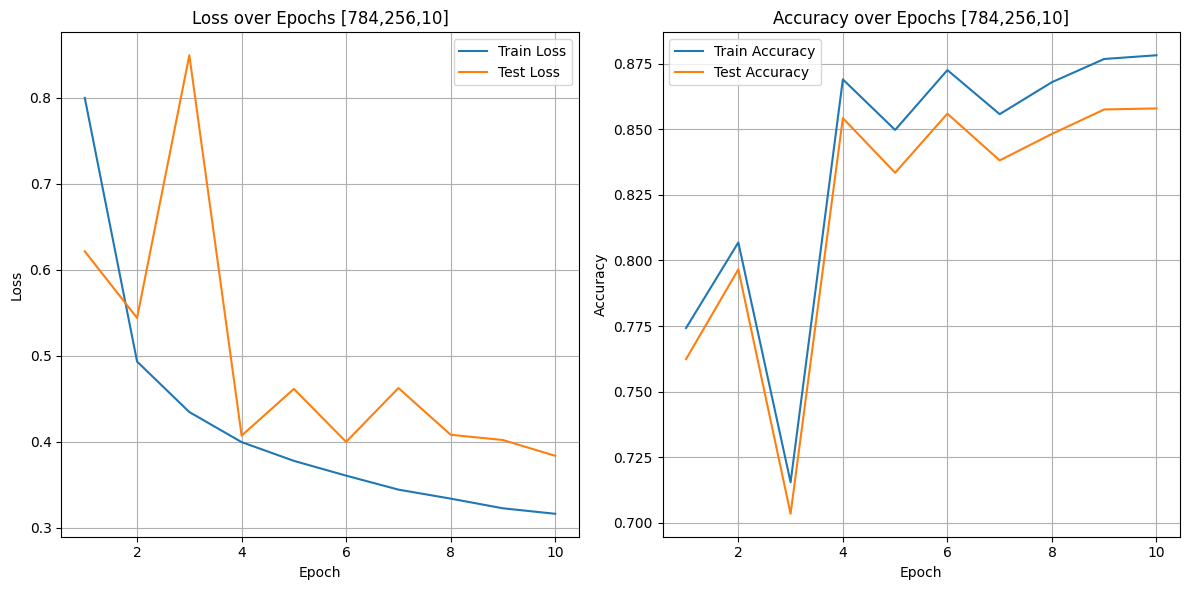

Final Test Accuracy for learning_rate 0.3: 0.8579

Training with learning_rate = 0.5
Starting training with architecture: [784, 256, 10]
Epoch 1/10: train_loss=0.7860, test_loss=0.5995, train_acc=0.7813, test_acc=0.7667
Epoch 2/10: train_loss=0.4913, test_loss=0.5039, train_acc=0.8226, test_acc=0.8085
Epoch 3/10: train_loss=0.4204, test_loss=0.4604, train_acc=0.8430, test_acc=0.8283
Epoch 4/10: train_loss=0.3853, test_loss=0.4232, train_acc=0.8607, test_acc=0.8448
Epoch 5/10: train_loss=0.3653, test_loss=0.4235, train_acc=0.8642, test_acc=0.8483
Epoch 6/10: train_loss=0.3461, test_loss=0.3909, train_acc=0.8775, test_acc=0.8616
Epoch 7/10: train_loss=0.3352, test_loss=0.4662, train_acc=0.8534, test_acc=0.8363
Epoch 8/10: train_loss=0.3240, test_loss=0.3840, train_acc=0.8816, test_acc=0.8591
Epoch 9/10: train_loss=0.3109, test_loss=0.3617, train_acc=0.8902, test_acc=0.8714
Epoch 10/10: train_loss=0.2987, test_loss=0.4297, train_acc=0.8693, test_acc=0.8481


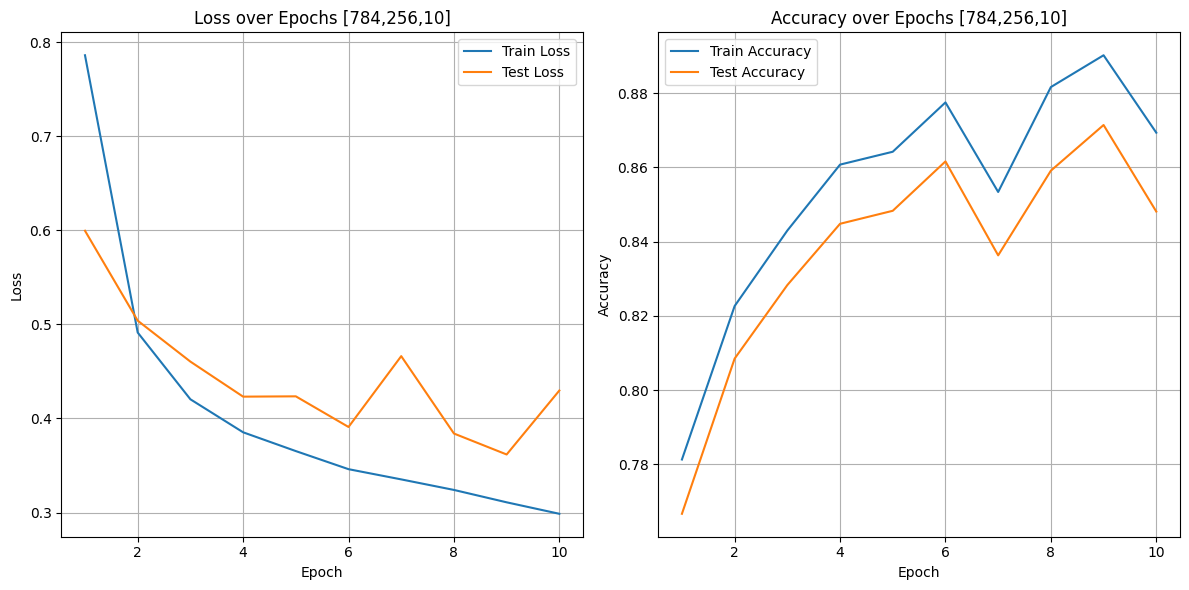

Final Test Accuracy for learning_rate 0.5: 0.8481

Training with learning_rate = 1
Starting training with architecture: [784, 256, 10]
Epoch 1/10: train_loss=1.9181, test_loss=2.1051, train_acc=0.1549, test_acc=0.1558
Epoch 2/10: train_loss=1.8306, test_loss=1.8782, train_acc=0.2286, test_acc=0.2353
Epoch 3/10: train_loss=2.0979, test_loss=2.0357, train_acc=0.1995, test_acc=0.2021
Epoch 4/10: train_loss=2.2084, test_loss=2.3733, train_acc=0.1002, test_acc=0.1005
Epoch 5/10: train_loss=2.1927, test_loss=2.2791, train_acc=0.1001, test_acc=0.0999
Epoch 6/10: train_loss=1.8428, test_loss=1.3322, train_acc=0.4467, test_acc=0.4448
Epoch 7/10: train_loss=1.7620, test_loss=2.2328, train_acc=0.1665, test_acc=0.1656
Epoch 8/10: train_loss=2.0335, test_loss=1.9077, train_acc=0.2335, test_acc=0.2345
Epoch 9/10: train_loss=2.1072, test_loss=2.3913, train_acc=0.1859, test_acc=0.1852
Epoch 10/10: train_loss=2.1613, test_loss=2.0715, train_acc=0.1625, test_acc=0.1615


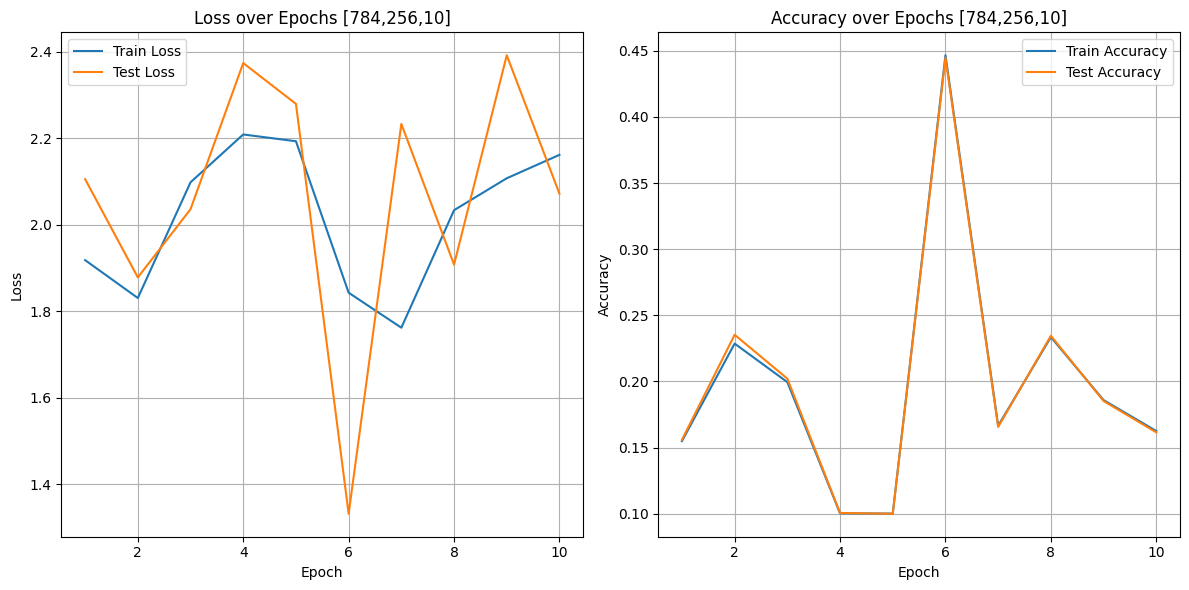

Final Test Accuracy for learning_rate 1: 0.1615
The Best Test Accuracy for learning_rate 0.3: 0.8579


In [ ]:
lrs = [0.001, 0.01, 0.1, 0.3, 0.5, 1]
layer_dimensions  = [784, 256, 10]
num_epochs        = 10

final_test_accuracies = []
best_accuracy = 0.0
best_learning_rate = 0

for learning_rate in lrs:
  print(f"\nTraining with learning_rate = {learning_rate}")
  trained_epochs, t_losses, v_losses, t_accs, v_accs, trained_params = train_model_n_hidden_layers(
          layer_dims=layer_dimensions,
          learning_rate=learning_rate,
          sigma=sigma,
          num_epochs=num_epochs
      )
  layer_dims_for_plot = str(layer_dimensions).replace(" ","")
  show_training_graphs(trained_epochs, t_losses, v_losses, t_accs, v_accs, layer_dims_str=layer_dims_for_plot)
  final_test_accuracies.append(v_accs[-1])
  print(f"Final Test Accuracy for learning_rate {learning_rate}: {v_accs[-1]:.4f}")
  if v_accs[-1] > best_accuracy:
      best_accuracy = v_accs[-1]
      best_learning_rate = learning_rate
print(f"The Best Test Accuracy for learning_rate {best_learning_rate}: {best_accuracy:.4f}")

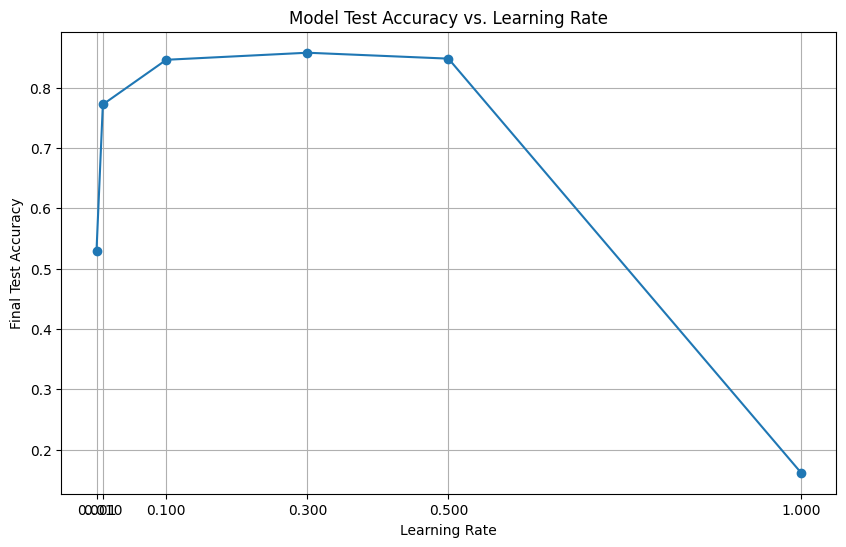

In [ ]:
# Vẽ đồ thị
plt.figure(figsize=(10, 6))
plt.plot(lrs, final_test_accuracies, marker='o', linestyle='-')
plt.title('Model Test Accuracy vs. Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Final Test Accuracy')
plt.xticks(lrs)
plt.grid(True)

*   Khi learning rate thay đổi:
    *   Độ chính xác của mô hình cũng thay đổi. Độ chính xác tăng giai đoạn đầu, sau đó giảm khi độ ổn đinh giảm.
    *   Độ ổn định giảm mạnh khi learning rate tăng cao.

*   Tăng num_epochs lên 20


Training with learning_rate = 0.001
Starting training with architecture: [784, 256, 10]
Epoch 1/20: train_loss=2.2941, test_loss=2.2863, train_acc=0.2777, test_acc=0.2790
Epoch 2/20: train_loss=2.2781, test_loss=2.2690, train_acc=0.3074, test_acc=0.3036
Epoch 3/20: train_loss=2.2584, test_loss=2.2468, train_acc=0.3108, test_acc=0.3113
Epoch 4/20: train_loss=2.2329, test_loss=2.2177, train_acc=0.3016, test_acc=0.2998
Epoch 5/20: train_loss=2.1996, test_loss=2.1802, train_acc=0.3064, test_acc=0.3038
Epoch 6/20: train_loss=2.1573, test_loss=2.1332, train_acc=0.3558, test_acc=0.3509
Epoch 7/20: train_loss=2.1051, test_loss=2.0759, train_acc=0.4181, test_acc=0.4068
Epoch 8/20: train_loss=2.0426, test_loss=2.0088, train_acc=0.4700, test_acc=0.4594
Epoch 9/20: train_loss=1.9708, test_loss=1.9334, train_acc=0.4927, test_acc=0.4855
Epoch 10/20: train_loss=1.8926, test_loss=1.8538, train_acc=0.5084, test_acc=0.5010
Epoch 11/20: train_loss=1.8123, test_loss=1.7743, train_acc=0.5179, test_acc=0.5

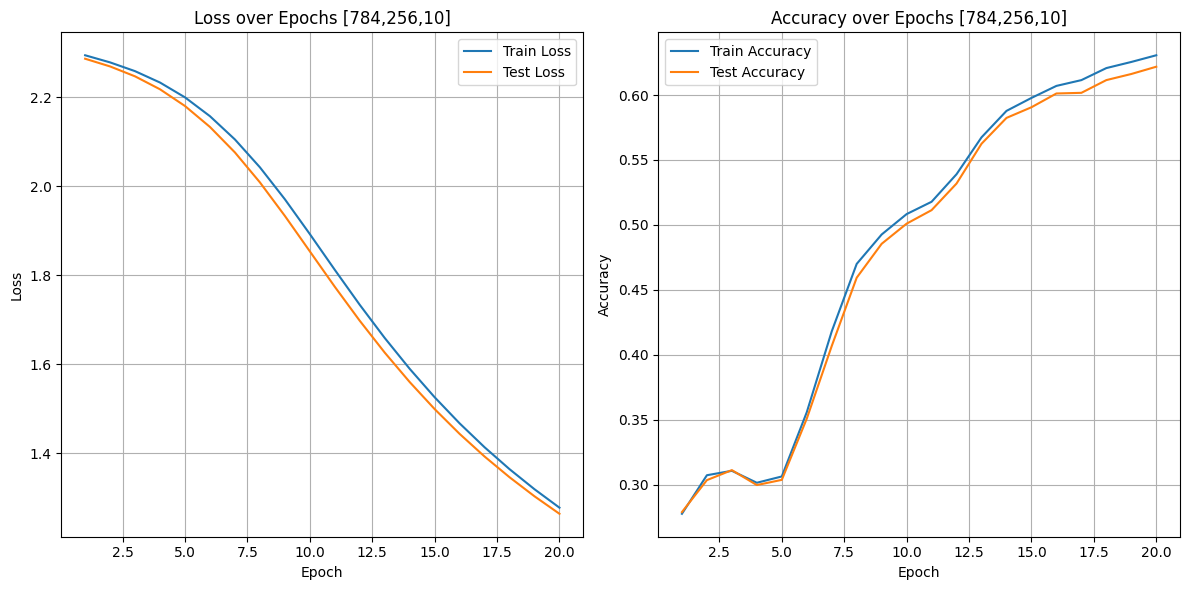

Final Test Accuracy for learning_rate 0.001: 0.6218

Training with learning_rate = 0.01
Starting training with architecture: [784, 256, 10]
Epoch 1/20: train_loss=2.1510, test_loss=1.8567, train_acc=0.5010, test_acc=0.4943
Epoch 2/20: train_loss=1.5108, test_loss=1.2588, train_acc=0.6211, test_acc=0.6139
Epoch 3/20: train_loss=1.1107, test_loss=1.0093, train_acc=0.6562, test_acc=0.6433
Epoch 4/20: train_loss=0.9311, test_loss=0.8873, train_acc=0.6814, test_acc=0.6702
Epoch 5/20: train_loss=0.8370, test_loss=0.8191, train_acc=0.6987, test_acc=0.6851
Epoch 6/20: train_loss=0.7786, test_loss=0.7711, train_acc=0.7211, test_acc=0.7071
Epoch 7/20: train_loss=0.7357, test_loss=0.7357, train_acc=0.7407, test_acc=0.7272
Epoch 8/20: train_loss=0.7013, test_loss=0.7033, train_acc=0.7613, test_acc=0.7498
Epoch 9/20: train_loss=0.6718, test_loss=0.6769, train_acc=0.7712, test_acc=0.7634
Epoch 10/20: train_loss=0.6465, test_loss=0.6546, train_acc=0.7812, test_acc=0.7726
Epoch 11/20: train_loss=0.624

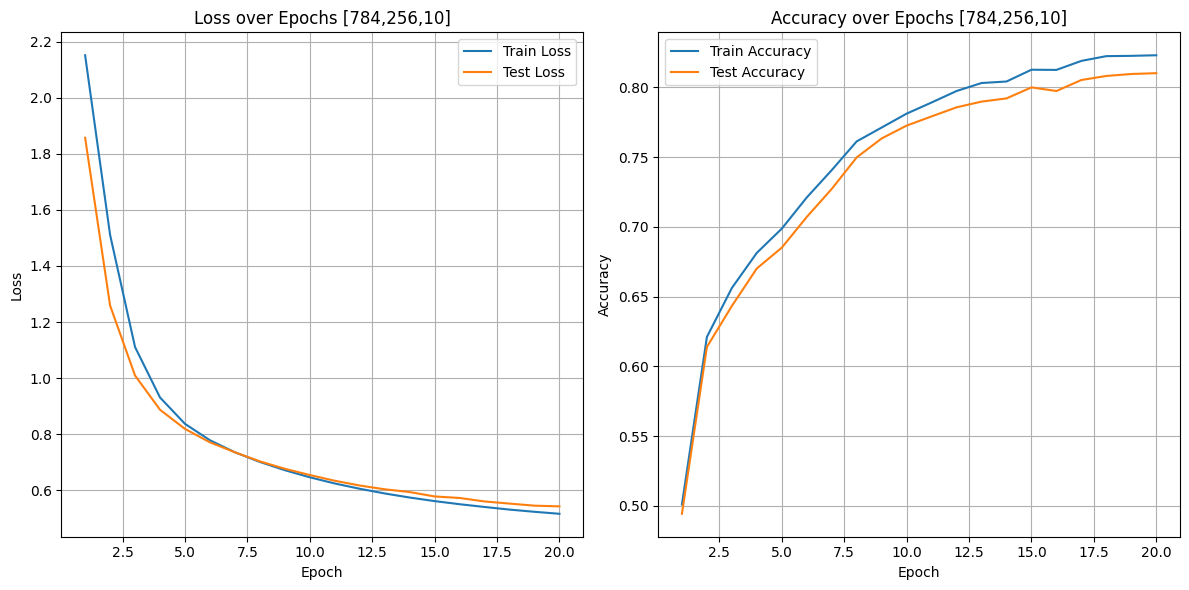

Final Test Accuracy for learning_rate 0.01: 0.8102

Training with learning_rate = 0.1
Starting training with architecture: [784, 256, 10]
Epoch 1/20: train_loss=1.0432, test_loss=0.7034, train_acc=0.7512, test_acc=0.7429
Epoch 2/20: train_loss=0.6024, test_loss=0.6131, train_acc=0.7873, test_acc=0.7748
Epoch 3/20: train_loss=0.5201, test_loss=0.7515, train_acc=0.7528, test_acc=0.7363
Epoch 4/20: train_loss=0.4823, test_loss=0.5276, train_acc=0.8195, test_acc=0.8075
Epoch 5/20: train_loss=0.4532, test_loss=0.5275, train_acc=0.8159, test_acc=0.7979
Epoch 6/20: train_loss=0.4335, test_loss=0.4979, train_acc=0.8367, test_acc=0.8222
Epoch 7/20: train_loss=0.4177, test_loss=0.4517, train_acc=0.8539, test_acc=0.8377
Epoch 8/20: train_loss=0.4041, test_loss=0.4397, train_acc=0.8590, test_acc=0.8433
Epoch 9/20: train_loss=0.3927, test_loss=0.4815, train_acc=0.8364, test_acc=0.8198
Epoch 10/20: train_loss=0.3824, test_loss=0.4308, train_acc=0.8607, test_acc=0.8382
Epoch 11/20: train_loss=0.3741,

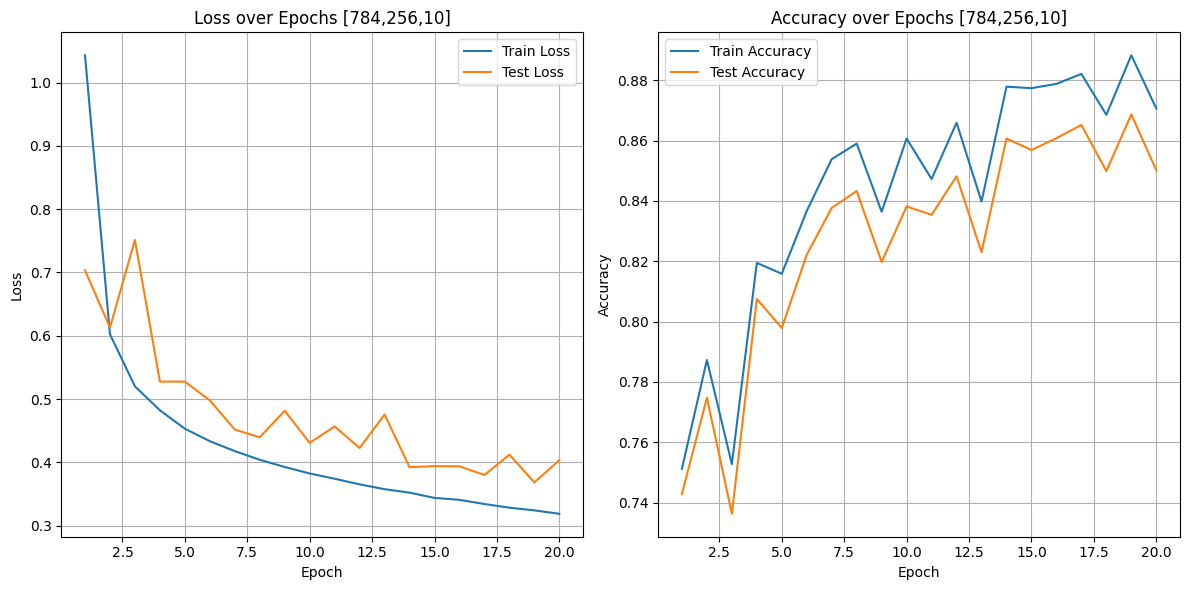

Final Test Accuracy for learning_rate 0.1: 0.8502

Training with learning_rate = 0.3
Starting training with architecture: [784, 256, 10]
Epoch 1/20: train_loss=0.8050, test_loss=0.6549, train_acc=0.7880, test_acc=0.7793
Epoch 2/20: train_loss=0.4965, test_loss=0.5501, train_acc=0.8131, test_acc=0.7986
Epoch 3/20: train_loss=0.4337, test_loss=0.4793, train_acc=0.8400, test_acc=0.8245
Epoch 4/20: train_loss=0.4017, test_loss=0.4206, train_acc=0.8611, test_acc=0.8439
Epoch 5/20: train_loss=0.3780, test_loss=0.4220, train_acc=0.8633, test_acc=0.8479
Epoch 6/20: train_loss=0.3641, test_loss=0.4121, train_acc=0.8646, test_acc=0.8468
Epoch 7/20: train_loss=0.3446, test_loss=0.4426, train_acc=0.8567, test_acc=0.8378
Epoch 8/20: train_loss=0.3399, test_loss=0.3769, train_acc=0.8828, test_acc=0.8666
Epoch 9/20: train_loss=0.3263, test_loss=0.4045, train_acc=0.8727, test_acc=0.8509
Epoch 10/20: train_loss=0.3156, test_loss=0.3913, train_acc=0.8795, test_acc=0.8582
Epoch 11/20: train_loss=0.3105, 

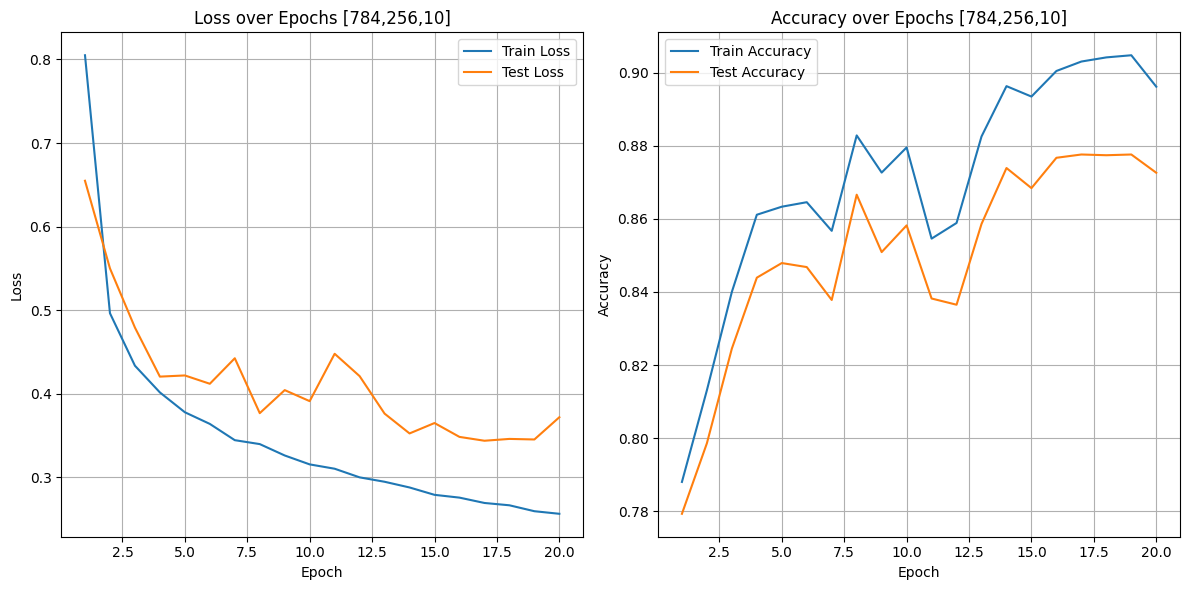

Final Test Accuracy for learning_rate 0.3: 0.8726

Training with learning_rate = 0.5
Starting training with architecture: [784, 256, 10]
Epoch 1/20: train_loss=0.8024, test_loss=0.5761, train_acc=0.7817, test_acc=0.7747
Epoch 2/20: train_loss=0.4847, test_loss=0.5016, train_acc=0.8238, test_acc=0.8100
Epoch 3/20: train_loss=0.4203, test_loss=0.5634, train_acc=0.7995, test_acc=0.7839
Epoch 4/20: train_loss=0.3923, test_loss=0.4008, train_acc=0.8693, test_acc=0.8544
Epoch 5/20: train_loss=0.3673, test_loss=0.4007, train_acc=0.8688, test_acc=0.8482
Epoch 6/20: train_loss=0.3493, test_loss=0.3813, train_acc=0.8784, test_acc=0.8607
Epoch 7/20: train_loss=0.3337, test_loss=0.4469, train_acc=0.8577, test_acc=0.8428
Epoch 8/20: train_loss=0.3230, test_loss=0.3706, train_acc=0.8877, test_acc=0.8685
Epoch 9/20: train_loss=0.3113, test_loss=0.3959, train_acc=0.8811, test_acc=0.8629
Epoch 10/20: train_loss=0.3033, test_loss=0.3793, train_acc=0.8848, test_acc=0.8616
Epoch 11/20: train_loss=0.2923, 

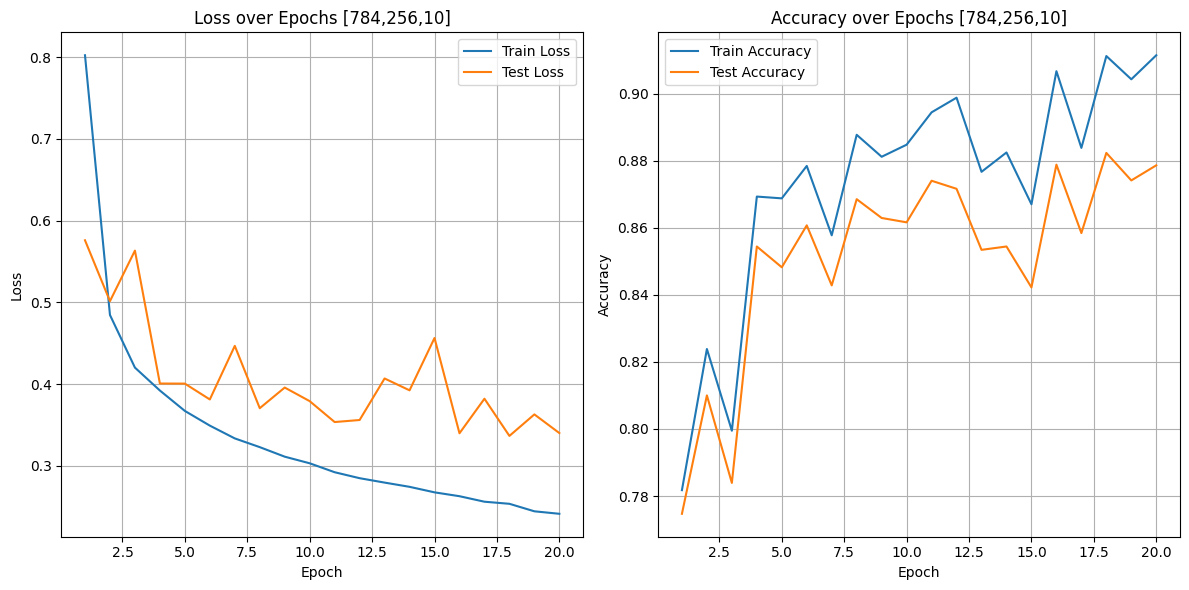

Final Test Accuracy for learning_rate 0.5: 0.8786

Training with learning_rate = 1
Starting training with architecture: [784, 256, 10]
Epoch 1/20: train_loss=2.0050, test_loss=1.4939, train_acc=0.3892, test_acc=0.3907
Epoch 2/20: train_loss=1.6117, test_loss=1.4250, train_acc=0.3465, test_acc=0.3495
Epoch 3/20: train_loss=1.9962, test_loss=1.9594, train_acc=0.2422, test_acc=0.2413
Epoch 4/20: train_loss=1.6324, test_loss=2.2103, train_acc=0.2695, test_acc=0.2654
Epoch 5/20: train_loss=2.0778, test_loss=1.8000, train_acc=0.2641, test_acc=0.2661
Epoch 6/20: train_loss=1.8900, test_loss=2.1217, train_acc=0.1835, test_acc=0.1829
Epoch 7/20: train_loss=1.9544, test_loss=2.4228, train_acc=0.1560, test_acc=0.1553
Epoch 8/20: train_loss=2.1444, test_loss=2.2613, train_acc=0.1293, test_acc=0.1331
Epoch 9/20: train_loss=2.2039, test_loss=2.1903, train_acc=0.1744, test_acc=0.1751
Epoch 10/20: train_loss=2.2100, test_loss=2.3036, train_acc=0.1001, test_acc=0.1001
Epoch 11/20: train_loss=2.2134, te

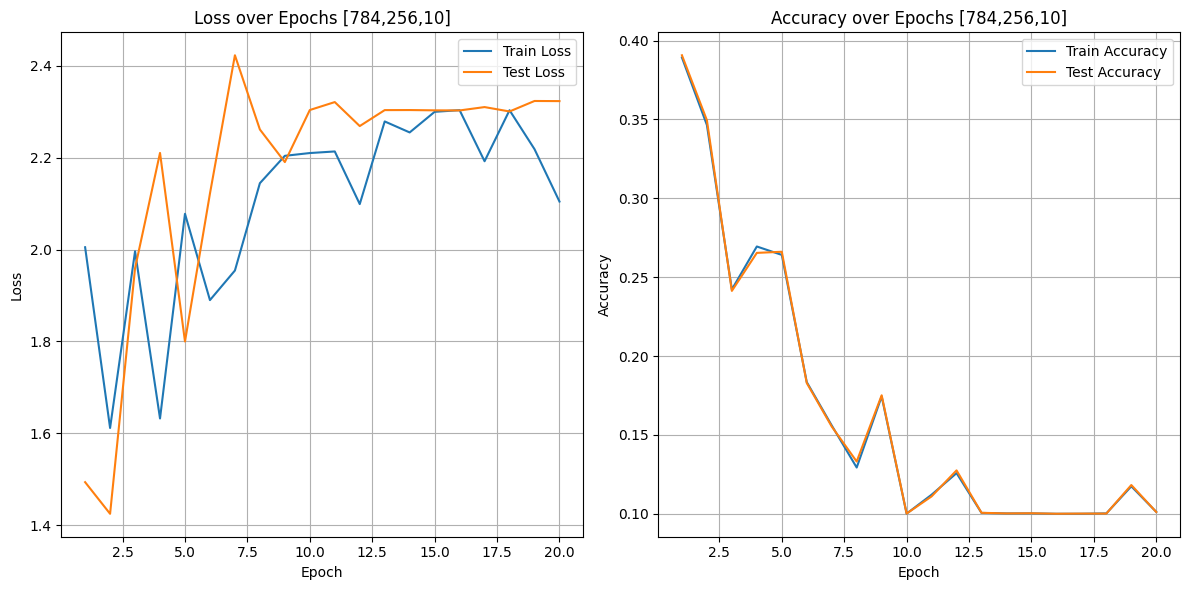

Final Test Accuracy for learning_rate 1: 0.1011
The Best Test Accuracy for learning_rate 0.5: 0.8786


In [ ]:
lrs = [0.001, 0.01, 0.1, 0.3, 0.5, 1]
layer_dimensions  = [784, 256, 10]
num_epochs        = 20

final_test_accuracies = []
best_accuracy = 0.0
best_learning_rate = 0

for learning_rate in lrs:
  print(f"\nTraining with learning_rate = {learning_rate}")
  trained_epochs, t_losses, v_losses, t_accs, v_accs, trained_params = train_model_n_hidden_layers(
          layer_dims=layer_dimensions,
          learning_rate=learning_rate,
          sigma=sigma,
          num_epochs=num_epochs
      )
  layer_dims_for_plot = str(layer_dimensions).replace(" ","")
  show_training_graphs(trained_epochs, t_losses, v_losses, t_accs, v_accs, layer_dims_str=layer_dims_for_plot)
  final_test_accuracies.append(v_accs[-1])
  print(f"Final Test Accuracy for learning_rate {learning_rate}: {v_accs[-1]:.4f}")
  if v_accs[-1] > best_accuracy:
      best_accuracy = v_accs[-1]
      best_learning_rate = learning_rate
print(f"The Best Test Accuracy for learning_rate {best_learning_rate}: {best_accuracy:.4f}")

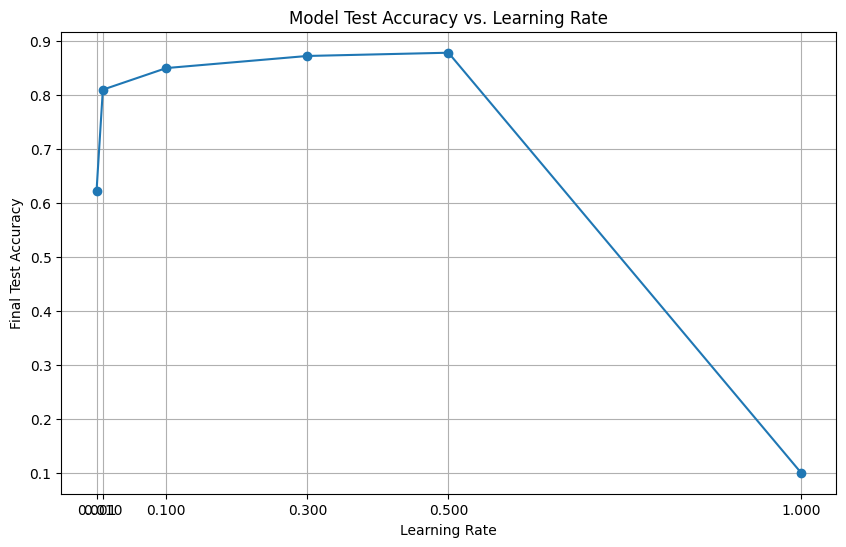

In [ ]:
# Vẽ đồ thị
plt.figure(figsize=(10, 6))
plt.plot(lrs, final_test_accuracies, marker='o', linestyle='-')
plt.title('Model Test Accuracy vs. Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Final Test Accuracy')
plt.xticks(lrs)
plt.grid(True)

*   Khi tăng epoch:
    *   Độ chính xác của mô hình cũng thay đổi. Độ chính xác tăng giai đoạn đầu, sau đó giảm khi độ ổn đinh giảm.
    *   Độ ổn định giảm mạnh hơn khi learning rate tăng cao.

### 5.Let’s optimize over all hyperparameters jointly, i.e., learning rate, number of epochs, number of hidden layers, and number of hidden units per layer.

In [ ]:
!pip install d2l==1.0.3

In [ ]:
# bổ sung import
import time
import random
import torch

from torch import nn
from d2l import torch as d2l
import matplotlib.pyplot as plt
print(f"✅ CUDA available: {torch.cuda.is_available()}")

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Đang sử dụng: {device.upper()}")

✅ CUDA available: False
Đang sử dụng: CPU


In [ ]:
from torchvision import transforms
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader

# ✅ Viết lại hàm có num_workers
def load_data_fashion_mnist(batch_size, resize=None, num_workers=2):
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)

    mnist_train = FashionMNIST(root="./data", train=True, download=True, transform=trans)
    mnist_test = FashionMNIST(root="./data", train=False, download=True, transform=trans)

    return (
        DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=num_workers),
        DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=num_workers)
    )


Build MLP Function

In [ ]:
def build_mlp(units_per_layer):
    layers = [nn.Flatten()]
    input_dim = 784  # 28x28 ảnh

    for units in units_per_layer:
        layers.append(nn.Linear(input_dim, units))
        layers.append(nn.ReLU())
        input_dim = units

    layers.append(nn.Linear(input_dim, 10))  # output lớp
    return nn.Sequential(*layers).to(device)

In [ ]:
def train_mlp(hidden_units, lr, batch_size, num_epochs):
    net = build_mlp(hidden_units)
    net.apply(lambda m: nn.init.xavier_uniform_(m.weight) if isinstance(m, nn.Linear) else None)

    loss = nn.CrossEntropyLoss()
    trainer = torch.optim.SGD(net.parameters(), lr=lr)

    # ✅ tăng tốc load dữ liệu
    train_iter, test_iter = load_data_fashion_mnist(batch_size, num_workers=2)

    for epoch in range(num_epochs):
        net.train()
        for X, y in train_iter:
            X, y = X.to(device), y.to(device)
            trainer.zero_grad()
            l = loss(net(X), y)
            l.backward()
            trainer.step()

    acc = d2l.evaluate_accuracy_gpu(net, test_iter)
    return acc


In [ ]:
# Thông số cần thử
hidden_options = [64, 128, 256, 512]
lr_options = [0.01, 0.05, 0.1]
batch_options = [32, 64, 128]
num_trials = 5
num_epochs = 10

results = []
start_time = time.time()

for i in range(num_trials):
    hidden_units = [random.choice(hidden_options)]
    # thử random thêm tầng thứ 2
    if random.random() < 0.5:
        hidden_units.append(random.choice(hidden_options))

    lr = random.choice(lr_options)
    batch_size = random.choice(batch_options)

    print(f"\n Trial {i+1}/{num_trials} → Hidden: {hidden_units}, LR: {lr}, Batch: {batch_size}")
    t0 = time.time()
    acc = train_mlp(hidden_units, lr, batch_size, num_epochs)
    t1 = time.time()

    print(f" Accuracy: {acc:.4f} | ⏱ Thời gian: {t1 - t0:.2f} giây")
    results.append((acc, hidden_units, lr, batch_size, t1 - t0))

total_time = time.time() - start_time
print(f"\n Tổng thời gian tất cả trials: {total_time:.2f} giây")



 Trial 1/5 → Hidden: [512], LR: 0.1, Batch: 128


100%|██████████| 26.4M/26.4M [00:03<00:00, 8.02MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 138kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.60MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 7.33MB/s]


 Accuracy: 0.8747 | ⏱ Thời gian: 140.81 giây

 Trial 2/5 → Hidden: [512], LR: 0.1, Batch: 64
 Accuracy: 0.8726 | ⏱ Thời gian: 127.31 giây

 Trial 3/5 → Hidden: [512], LR: 0.01, Batch: 32
 Accuracy: 0.8573 | ⏱ Thời gian: 145.79 giây

 Trial 4/5 → Hidden: [256, 256], LR: 0.01, Batch: 32
 Accuracy: 0.8664 | ⏱ Thời gian: 143.11 giây

 Trial 5/5 → Hidden: [128, 256], LR: 0.01, Batch: 128
 Accuracy: 0.8345 | ⏱ Thời gian: 88.78 giây

 Tổng thời gian tất cả trials: 645.81 giây


Vẽ biểu đồ

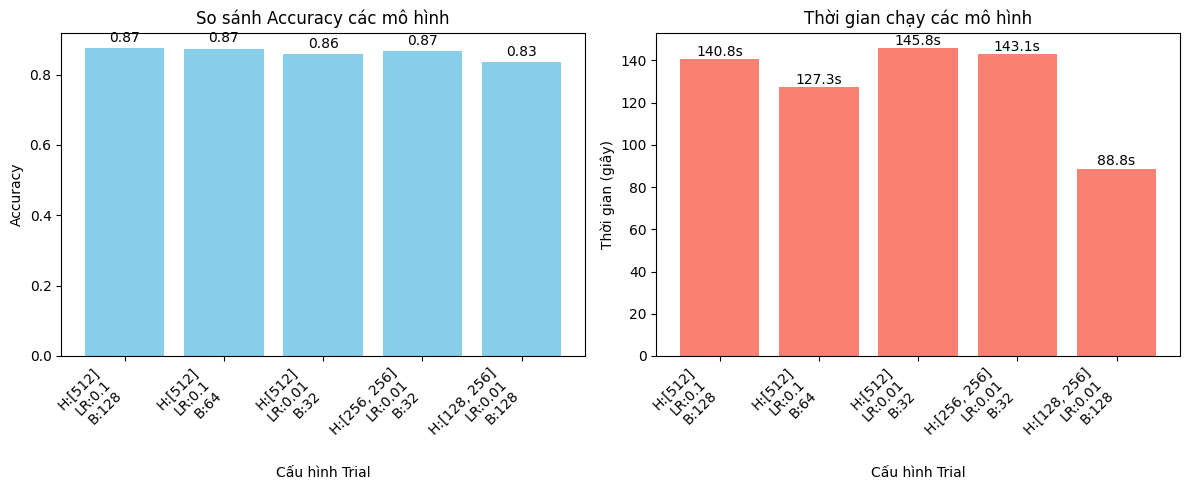

In [ ]:
# Tách dữ liệu từ kết quả
accuracies = [r[0] for r in results]
times = [r[4] for r in results]
labels = [f"H:{r[1]}\nLR:{r[2]}\nB:{r[3]}" for r in results]

# Tạo 2 biểu đồ cạnh nhau
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# === Biểu đồ Accuracy ===
bars1 = axes[0].bar(range(len(results)), accuracies, color='skyblue')
axes[0].set_xticks(range(len(results)))
axes[0].set_xticklabels(labels, rotation=45, ha='right')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Cấu hình Trial')
axes[0].set_title('So sánh Accuracy các mô hình')

# Hiển thị giá trị
for bar, acc in zip(bars1, accuracies):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f"{acc:.2f}", ha='center', va='bottom')

# === Biểu đồ Thời gian ===
bars2 = axes[1].bar(range(len(results)), times, color='salmon')
axes[1].set_xticks(range(len(results)))
axes[1].set_xticklabels(labels, rotation=45, ha='right')
axes[1].set_ylabel('Thời gian (giây)')
axes[1].set_xlabel('Cấu hình Trial')
axes[1].set_title('Thời gian chạy các mô hình')

# Hiển thị giá trị
for bar, t in zip(bars2, times):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, f"{t:.1f}s", ha='center', va='bottom')

plt.tight_layout()
plt.show()


1. What is the best result you can get by optimizing over all of them?

In [ ]:
best = max(results, key=lambda x: x[0])
print(f"\n Kết quả tốt nhất: Accuracy = {best[0]:.4f}, Hidden = {best[1]}, LR = {best[2]}, Batch = {best[3]}")


 Kết quả tốt nhất: Accuracy = 0.8747, Hidden = [512], LR = 0.1, Batch = 128


Note: do hạn chế về phần cứng nên chỉ cho epoch = 10 và trial 5 lần

2. Why it is much more challenging to deal with multiple hyperparameters?

Vì không gian tìm kiếm tăng theo cấp số mũ khi có nhiều siêu tham số, các tham số thường có mối quan hệ phức tạp với nhau, và mỗi tổ hợp cần huấn luyện mô hình đầy đủ, rất tốn thời gian và tài nguyên.

3. Describe an efficient strategy for optimizing over multiple parameters jointly.

Sử dụng Bayesian Optimization (ví dụ với Optuna hoặc Hyperopt), vì nó dự đoán tổ hợp siêu tham số tốt tiếp theo dựa trên kết quả các thử nghiệm trước, giúp giảm số lần huấn luyện cần thiết.

In [ ]:
!pip install -q optuna torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 954.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 16.3 MB/s eta 0:00:00


In [ ]:
import optuna

Set Mục tiêu cho Optuna

In [ ]:
def objective(trial):
    # Các siêu tham số sẽ được tối ưu
    lr = trial.suggest_float("lr", 1e-3, 0.2, log=True)
    num_epochs = trial.suggest_int("epochs", 5, 20)
    num_layers = trial.suggest_int("num_layers", 1, 3)
    units_per_layer = [
        trial.suggest_int(f"units_l{i}", 64, 512, step=64)
        for i in range(num_layers)
    ]
    batch_size = trial.suggest_categorical("batch_size", [32, 64, 128])

    net = build_mlp(units_per_layer)
    net.apply(lambda m: nn.init.xavier_uniform_(m.weight) if isinstance(m, nn.Linear) else None)

    loss = nn.CrossEntropyLoss()
    trainer = torch.optim.SGD(net.parameters(), lr=lr)
    train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

    for epoch in range(num_epochs):
        net.train()
        for X, y in train_iter:
            X, y = X.to(device), y.to(device)
            trainer.zero_grad()
            l = loss(net(X), y)
            l.backward()
            trainer.step()

    acc = d2l.evaluate_accuracy_gpu(net, test_iter)
    return acc

Dùng Optuna tối ưu

In [ ]:
study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=20)
study.optimize(objective, n_trials=10)
# thử 10 lần, 20 tốn thời gian hơn 30p

print("\n Kết quả tốt nhất:")
print(study.best_trial)

[I 2025-05-09 12:45:12,707] A new study created in memory with name: no-name-3274b682-9c07-4736-a846-9fc6d19c33c5
100%|██████████| 26.4M/26.4M [00:03<00:00, 8.59MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 137kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.52MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 16.7MB/s]
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
[I 2025-05-09 12:47:00,602] Trial 0 finished with value: 0.8535 and parameters: {'lr': 0.017947943576474123, 'epochs': 9, 'num_layers': 2, 'units_l0': 448, 'units_l1': 128, 'batch_size': 128}. Best is trial 0 with value:


 Kết quả tốt nhất:
FrozenTrial(number=7, state=1, values=[0.894], datetime_start=datetime.datetime(2025, 5, 9, 13, 0, 1, 169352), datetime_complete=datetime.datetime(2025, 5, 9, 13, 5, 24, 269649), params={'lr': 0.07372511423665641, 'epochs': 19, 'num_layers': 2, 'units_l0': 512, 'units_l1': 256, 'batch_size': 32}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'lr': FloatDistribution(high=0.2, log=True, low=0.001, step=None), 'epochs': IntDistribution(high=20, log=False, low=5, step=1), 'num_layers': IntDistribution(high=3, log=False, low=1, step=1), 'units_l0': IntDistribution(high=512, log=False, low=64, step=64), 'units_l1': IntDistribution(high=512, log=False, low=64, step=64), 'batch_size': CategoricalDistribution(choices=(32, 64, 128))}, trial_id=7, value=None)


Vẽ biểu đồ

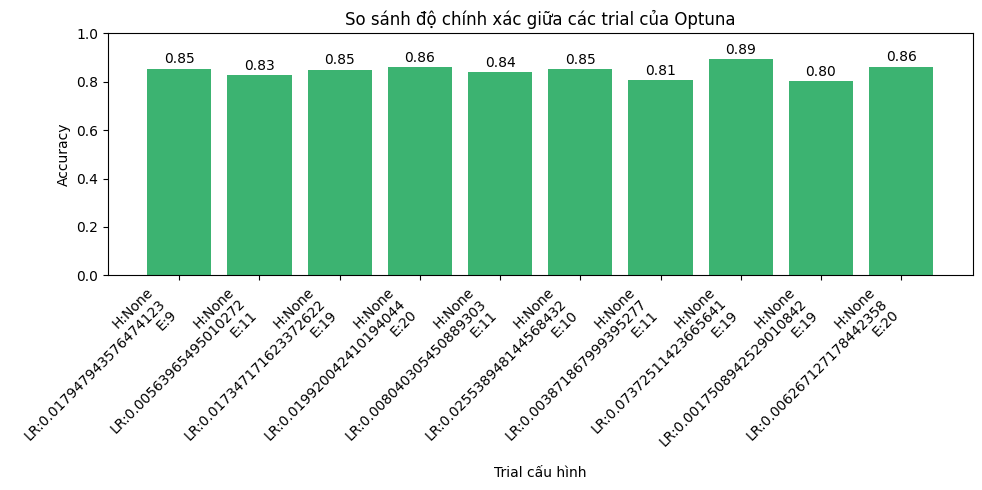

In [ ]:
trials = study.trials
accuracies = [t.value for t in trials]
params = [t.params for t in trials]
labels = [
    f"H:{p.get('num_hidden')}\nLR:{p.get('lr')}\nE:{p.get('epochs')}" for p in params
]

# Vẽ biểu đồ độ chính xác
plt.figure(figsize=(10, 5))
bars = plt.bar(range(len(accuracies)), accuracies, color='mediumseagreen')
plt.xticks(range(len(accuracies)), labels, rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.xlabel("Trial cấu hình")
plt.title("So sánh độ chính xác giữa các trial của Optuna")
plt.ylim(0, 1)

# Ghi giá trị chính xác lên cột
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{acc:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

### 6. Compare the speed of the framework and the from-scratch implementation for a challenging problem. How does it change with the complexity of the network?

**So sánh tốc độ: PyTorch (framework) vs. Tự cài (from-scratch)**

Trong phần này, chúng ta sẽ huấn luyện một mạng nơ-ron nhiều tầng trên tập dữ liệu đơn giản  
với 2 cách:
- Dùng PyTorch (framework chuyên dụng, tận dụng GPU)
- Dùng NumPy (tự cài từ đầu, không tối ưu)

Ta sẽ đo thời gian huấn luyện để thấy sự khác biệt khi mạng trở nên phức tạp hơn.


In [ ]:
from torchvision import datasets, transforms
import numpy as np

In [ ]:
class TorchMLP(nn.Module):
    def __init__(self, input_size=784, hidden_sizes=[256, 128], output_size=10):
        super().__init__()
        layers = [nn.Flatten()]
        in_dim = input_size
        for h in hidden_sizes:
            layers.append(nn.Linear(in_dim, h))
            layers.append(nn.ReLU())
            in_dim = h
        layers.append(nn.Linear(in_dim, output_size))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Load data (just 1 batch for fair comparison)
transform = transforms.ToTensor()
train_dataset = datasets.FashionMNIST(root="./data", train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)

X_batch, y_batch = next(iter(train_loader))
X_np = X_batch.view(X_batch.shape[0], -1).numpy()
y_np = y_batch.numpy()

# ----- Benchmark PyTorch -----
torch_model = TorchMLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(torch_model.parameters(), lr=0.1)

start_torch = time.time()
for _ in range(10):  # 10 epochs
    optimizer.zero_grad()
    output = torch_model(X_batch.to(device))
    loss = criterion(output, y_batch.to(device))
    loss.backward()
    optimizer.step()
end_torch = time.time()

print(f" PyTorch training time: {end_torch - start_torch:.4f} seconds")

# ----- From-scratch version (NumPy) -----
def relu(x):
    return np.maximum(0, x)

def softmax(x):
    e = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e / np.sum(e, axis=1, keepdims=True)

def cross_entropy(y_pred, y_true):
    m = y_pred.shape[0]
    p = y_pred[range(m), y_true]
    log_likelihood = -np.log(p + 1e-8)
    return np.sum(log_likelihood) / m

# Init weights
np.random.seed(42)
W1 = np.random.randn(784, 256) * 0.01
b1 = np.zeros((1, 256))
W2 = np.random.randn(256, 128) * 0.01
b2 = np.zeros((1, 128))
W3 = np.random.randn(128, 10) * 0.01
b3 = np.zeros((1, 10))

lr = 0.1
start_numpy = time.time()
for epoch in range(10):
    # Forward
    z1 = X_np @ W1 + b1
    a1 = relu(z1)
    z2 = a1 @ W2 + b2
    a2 = relu(z2)
    z3 = a2 @ W3 + b3
    probs = softmax(z3)

    # Loss
    loss = cross_entropy(probs, y_np)

    # Backward (manual gradient descent)
    m = y_np.shape[0]
    grad_z3 = probs
    grad_z3[range(m), y_np] -= 1
    grad_z3 /= m

    dW3 = a2.T @ grad_z3
    db3 = np.sum(grad_z3, axis=0, keepdims=True)

    da2 = grad_z3 @ W3.T
    dz2 = da2 * (z2 > 0)

    dW2 = a1.T @ dz2
    db2 = np.sum(dz2, axis=0, keepdims=True)

    da1 = dz2 @ W2.T
    dz1 = da1 * (z1 > 0)

    dW1 = X_np.T @ dz1
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # Update
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2
    W3 -= lr * dW3
    b3 -= lr * db3
end_numpy = time.time()

print(f"From-scratch (NumPy) training time: {end_numpy - start_numpy:.4f} seconds")

 PyTorch training time: 0.1127 seconds
From-scratch (NumPy) training time: 0.2414 seconds


Càng tăng số tầng ẩn hoặc batch size → khoảng cách càng lớn giữa hai cách tiếp cận.

## 7. Measure the speed of tensor–matrix multiplications for well-aligned and misaligned matrices. For instance, test for matrices with dimension 1024, 1025, 1026, 1028, and 1032.

1.  How does this change between GPUs and CPUs?
2.  Determine the memory bus width of your CPU and GPU.





**Hàm đo thời gian nhân ma trận**

In [ ]:
sizes = [1024, 1025, 1026, 1028, 1032]

# Hàm đo thời gian nhân ma trận
def benchmark_matmul(size, device='cpu', repeat=10):
    A = torch.randn(size, size, device=device)
    B = torch.randn(size, size, device=device)
    # Warm-up
    torch.matmul(A, B)
    torch.cuda.synchronize() if device == 'cuda' else None
    start = time.time()
    for _ in range(repeat):
        torch.matmul(A, B)
    torch.cuda.synchronize() if device == 'cuda' else None
    end = time.time()
    avg_time = (end - start) / repeat
    return avg_time


**Chạy benchmark cho nhiều kích thước**

In [ ]:
devices = ['cpu']
if torch.cuda.is_available():
    devices.append('cuda')

# Ghi kết quả
for device in devices:
    print(f"\n Benchmark trên {device.upper()}")
    for size in sizes:
        t = benchmark_matmul(size, device)
        print(f"Size: {size}x{size} → {t*1000:.2f} ms")



 Benchmark trên CPU
Size: 1024x1024 → 35.40 ms
Size: 1025x1025 → 36.42 ms
Size: 1026x1026 → 34.62 ms
Size: 1028x1028 → 36.99 ms
Size: 1032x1032 → 33.55 ms


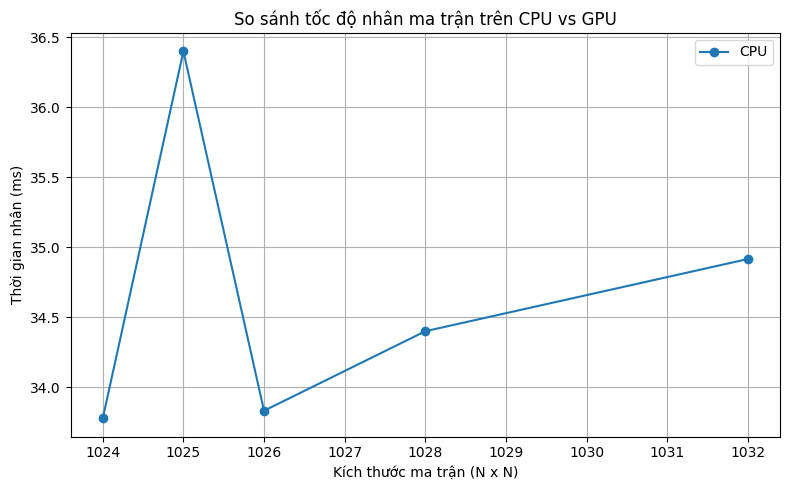

In [ ]:
results = {device: [] for device in devices}

# Đo và lưu kết quả
for device in devices:
    for size in sizes:
        t = benchmark_matmul(size, device)
        results[device].append(t * 1000)  # đổi ra ms

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
for device in devices:
    plt.plot(sizes, results[device], marker='o', label=f"{device.upper()}")

plt.xlabel("Kích thước ma trận (N x N)")
plt.ylabel("Thời gian nhân (ms)")
plt.title("So sánh tốc độ nhân ma trận trên CPU vs GPU")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Tìm kết quả bench mark (optional)

In [ ]:
if torch.cuda.is_available():
    print(torch.cuda.get_device_name(0))

### 8. Try out different activation functions. Which one works best?




Tạo 1 data set nhẹ hơn

In [ ]:
# Dataset
transform = transforms.ToTensor()
train_data = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root="./data", train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
test_loader = DataLoader(test_data, batch_size=128)

**Định nghĩa mạng MLP với activation linh hoạt**

In [ ]:
class MLP(nn.Module):
    def __init__(self, activation_fn):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.out = nn.Linear(128, 10)
        self.activation = activation_fn

    def forward(self, x):
        x = self.flatten(x)
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        return self.out(x)


**train + test**

In [ ]:
def train_and_evaluate(activation_fn, name):
    model = MLP(activation_fn).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Train
    model.train()
    for epoch in range(5):
        for X, y in train_loader:
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = model(X)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()

    # Evaluate
    model.eval()
    correct = total = 0
    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            preds = model(X).argmax(dim=1)
            correct += (preds == y).sum().item()
            total += y.size(0)
    acc = correct / total
    print(f" {name}: Accuracy = {acc:.4f}")
    return acc


**Chạy tất cả activation functions**

Bao gồm:


*   ReLU

* Sigmoid

* Tanh

* Leaky ReLU

* ELU




In [ ]:
import torch.nn.functional as F
activations = {
    "ReLU": F.relu,
    "Sigmoid": torch.sigmoid,
    "Tanh": torch.tanh,
    "LeakyReLU": F.leaky_relu,
    "ELU": F.elu
}

results = {}
for name, act_fn in activations.items():
    print(f"\n Testing activation: {name}")
    acc = train_and_evaluate(act_fn, name)
    results[name] = acc

# Tổng kết
print("\n Kết quả tổng hợp:")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")



 Testing activation: ReLU
 ReLU: Accuracy = 0.8701

 Testing activation: Sigmoid
 Sigmoid: Accuracy = 0.8665

 Testing activation: Tanh
 Tanh: Accuracy = 0.8794

 Testing activation: LeakyReLU
 LeakyReLU: Accuracy = 0.8731

 Testing activation: ELU
 ELU: Accuracy = 0.8723

 Kết quả tổng hợp:
ReLU: 0.8701
Sigmoid: 0.8665
Tanh: 0.8794
LeakyReLU: 0.8731
ELU: 0.8723


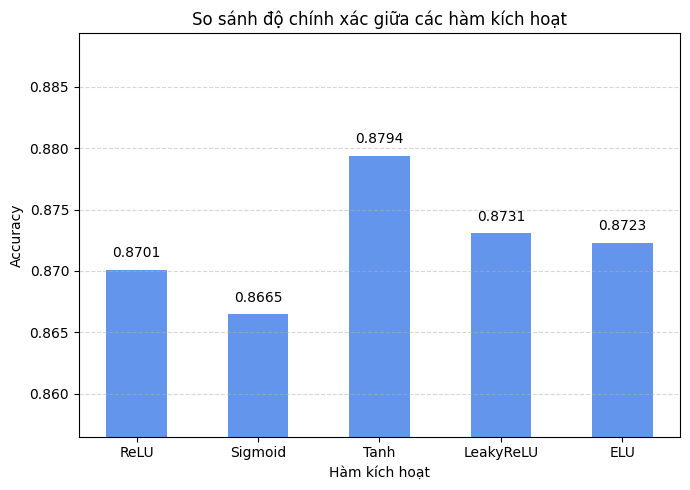

In [ ]:
names = list(results.keys())
accs = list(results.values())

plt.figure(figsize=(7, 5))
bars = plt.bar(names, accs, color='cornflowerblue', width=0.5)

min_acc = min(accs)
max_acc = max(accs)
margin = 0.01
plt.ylim(min_acc - margin, max_acc + margin)

plt.ylabel("Accuracy")
plt.xlabel("Hàm kích hoạt")
plt.title("So sánh độ chính xác giữa các hàm kích hoạt")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Hiển thị giá trị Accuracy trên đầu mỗi cột
for bar, acc in zip(bars, accs):
    plt.text(bar.get_x() + bar.get_width() / 2, acc + 0.001, f"{acc:.4f}", ha='center')

plt.tight_layout()
plt.show()


Tanh đạt accuracy cao nhất (0.8794), cho thấy hiệu quả tốt nhất trong mô hình này.

LeakyReLU (0.8731), ELU (0.8723) và ReLU (0.8701) có hiệu suất khá tương đồng và cao hơn Sigmoid.

Sigmoid cho kết quả thấp nhất (0.8665), điều này phù hợp vì sigmoid dễ gây vanishing gradient trong mạng sâu.

Kết luận: Tanh hoạt động tốt nhất trong trường hợp này, nhưng các hàm ReLU-based cũng rất cạnh tranh và thường hiệu quả hơn khi mạng phức tạp hơn.

### 9. Is there a difference between weight initializations of the network? Does it matter?

| Phương pháp         | Mô tả ngắn                   | Dùng tốt với         |
| ------------------- | ---------------------------- | -------------------- |
| **Random Normal**   | Trọng số từ phân phối chuẩn  | Cơ bản, dễ bị mất ổn |
| **Xavier (Glorot)** | Cân bằng số chiều đầu vào/ra | `tanh`, `sigmoid`    |
| **Kaiming (He)**    | Dành cho ReLU và biến thể    | `ReLU`, `LeakyReLU`  |
| **Constant/Zero**   | Tệ — không học được gì       |  Không dùng         |



In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )
    def forward(self, x): return self.net(x)

# Hàm khởi tạo
def init_weights(net, method):
    for m in net.modules():
        if isinstance(m, nn.Linear):
            if method == 'xavier':
                nn.init.xavier_uniform_(m.weight)
            elif method == 'he':
                nn.init.kaiming_uniform_(m.weight, nonlinearity='relu')
            elif method == 'random':
                nn.init.normal_(m.weight, mean=0, std=1)

# Train & test nhanh
def train_and_eval(init):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    net = MLP()
    init_weights(net, init)
    net.to(device)
    loss = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
    for X, y in train_loader:
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        l = loss(net(X), y)
        l.backward()
        optimizer.step()
        break  # chỉ 1 batch
    net.eval()
    X, y = next(iter(test_loader))
    X, y = X.to(device), y.to(device)
    acc = (net(X).argmax(1) == y).float().mean().item()
    return acc


# Thử các phương pháp
results = {}
for method in ['random', 'xavier', 'he']:
    acc = train_and_eval(method)
    results[method] = acc
    print(f"{method} init → acc: {acc:.4f}")

random init → acc: 0.1641
xavier init → acc: 0.2188
he init → acc: 0.2031


Vẽ biểu đồ

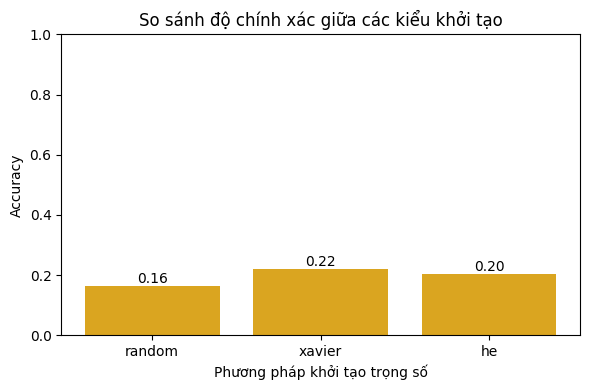

In [ ]:
methods = list(results.keys())
accs = list(results.values())

plt.figure(figsize=(6, 4))
bars = plt.bar(methods, accs, color='goldenrod')
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.xlabel("Phương pháp khởi tạo trọng số")
plt.title("So sánh độ chính xác giữa các kiểu khởi tạo")

# Ghi số lên cột
for bar, acc in zip(bars, accs):
    plt.text(bar.get_x() + bar.get_width() / 2, acc + 0.01, f"{acc:.2f}", ha='center')

plt.tight_layout()
plt.show()


Có sự khác biệt rõ rệt giữa các phương pháp khởi tạo trọng số trong mạng nơ-ron, và điều đó ảnh hưởng rất lớn đến hiệu suất học của mô hình. Việc khởi tạo trọng số là bước đầu tiên trong quá trình huấn luyện mạng, quyết định cách dữ liệu và gradient lan truyền trong mạng.

Nếu khởi tạo không phù hợp, ví dụ như tất cả trọng số bằng 0 hoặc lấy ngẫu nhiên không kiểm soát, mô hình dễ gặp các vấn đề như mất gradient (vanishing gradients) hoặc gradient bùng nổ (exploding gradients), dẫn đến huấn luyện chậm hoặc không hội tụ.

Ngược lại, các phương pháp khởi tạo như Xavier (Glorot) hoặc He (Kaiming) được thiết kế dựa trên đặc tính toán học của mạng để giúp tín hiệu lan truyền ổn định hơn trong quá trình huấn luyện. Cụ thể:

Xavier phù hợp với activation như tanh hoặc sigmoid

He phù hợp với ReLU và các biến thể của nó

Vì vậy, khởi tạo trọng số đúng cách không chỉ giúp mô hình học nhanh hơn mà còn cải thiện độ chính xác và độ ổn định khi huấn luyện.

---

---

---


# Lan truyền xuôi, lan truyền ngược và đồ thị tính toán




### Giới thiệu

Trong học sâu (deep learning), một bài toán quan trọng là **huấn luyện mạng neural** sao cho nó có thể học được các mẫu (patterns) từ dữ liệu và tổng quát hóa tốt khi gặp dữ liệu mới. Quá trình huấn luyện này yêu cầu **điều chỉnh trọng số và bias** của mạng để **giảm sai số (loss)** giữa đầu ra mô hình và nhãn thật sự.

Một vấn đề cốt lõi là: **Làm sao để tính được độ dốc (gradient) của hàm mất mát theo từng tham số trong một mạng có nhiều lớp?**  
=> **Backpropagation** ra đời để giải quyết chính xác bài toán này.

---


### Các vấn đề đang sử dụng backpropagation

Trong khoa học máy tính, đặc biệt trong lĩnh vực trí tuệ nhân tạo và machine learning, backpropagation giúp giải quyết nhiều bài toán bằng cách:

- Cho phép **huấn luyện mạng nhiều lớp (deep neural networks)** hiệu quả.
- Cung cấp **đạo hàm chính xác và nhanh** thông qua Chain Rule.
- Làm nền tảng cho các **framework học sâu** như PyTorch, TensorFlow.

Nhờ backpropagation, các mô hình có thể **liên tục cải thiện hiệu năng** qua các vòng huấn luyện, và học từ dữ liệu thực tế theo cách có thể mở rộng (scalable).

Trước khi đi vào lan truyền ngược, chúng ta sẽ tìm hiểu chiều thuận tính toán dự đoán của MLP thông qua mạng với một mạng ẩn dưới đây:

### 5.3.1 Lan truyền xuôi
Lan truyền thuận (forward propagation/forward pass) đề cập đến viẹc tính toán và lưu trữ các biến trung (giữa các lớp và cả đầu ra) cho một mạng MLP theo thứ tự từ đầu vào dến lớp đầu ra.
 
Để đơn giản hoá thì đầu vào của chúng ta sẽ là 1 vector $ \mathbf{x} \in \mathbb{R}^d $ với $d$ là số đặc điểm (feature) của input. Và lớp ẩn của chúng ta sẽ tạm thời bỏ qua bias (MLP với bias sẽ được biểu diễn ở phần bài tập). Ở đây biến trung gian là :

$$\mathbf{z} = \mathbf{W^{(1)} \mathbf{x}}$$

Với $\mathbf{W^{(1)}} \in \mathbb{R}^{h \times d} $ là trọng số của lớp ẩn. Sau khi duyệt qua lớp này, biến trung gian $\mathbf{z} \in \mathbb{R}^h$ sẽ được truyền qua hàm kích hoạt $\phi$, sau bước này chúng ta sẽ có được vector kích hoạt ẩn có chiều dài h,

$$\mathbf{h} = \phi (\mathbf{z})$$

Biến ẩn $\mathbf{h}$ cũng là một biến trung gian. Giả sử rằng các tham số của lớp đầu ra chỉ sở hữu trọng lượng $\mathbf{W}^{(2)} \in \mathbb{R}^{q \times h}$, ta có thể thu được một biến lớp đầu ra với một vectơ có chiều dài $q$: 

$$\mathbf{o}= \mathbf{W}^{(2)} \mathbf{h}.$$

Giả sử hàm mất là $l$ và nhãn ví dụ là $y$, sau đó chúng ta có thể tính toán thuật ngữ mất mát cho một ví dụ dữ liệu duy nhất, 

$$L = l(\mathbf{o}, y).$$

Theo định nghĩa của $L_2$ chính quy hóa, với siêu tham số $\lambda$, thuật ngữ chính quy hóa là 

$$s = \frac{\lambda}{2} \left(\|\mathbf{W}^{(1)}\|_F^2 + \|\mathbf{W}^{(2)}\|_F^2\right),$$

trong đó định mức Frobenius của ma trận chỉ đơn giản là định mức $L_2$ được áp dụng sau khi làm phẳng ma trận thành một vectơ. Cuối cùng, tổn thất thường xuyên của mô hình trên một ví dụ dữ liệu nhất định là: 

$$J = L + s.$$

Chúng tôi đề cập đến $J$ là chức năng mục tiêu *trong cuộc thảo luận sau đây. 

## Đồ thị tính toán của lan truyền xuôi

Vẽ đồ thị tính toán * giúp chúng ta hình dung các phụ thuộc của toán tử và biến trong phép tính. Hình bên dưới thể hiện đồ thị mạng đơn giản được mô tả ở trên, trong đó các ô vuông biểu thị các biến và vòng tròn biểu thị các toán tử. Góc dưới bên trái biểu thị đầu vào và góc trên bên phải là đầu ra. Lưu ý rằng các hướng của các mũi tên (minh họa luồng dữ liệu) chủ yếu là bên phải và hướng lên. 

Dưới đây là đồ thị tính toán của mạng nơ-ron đã được đề cập ở trên


![Đồ thị tính toán](https://d2l.aivivn.com/_images/forward.svg)


## Lan truyền ngược

*Backpropagation* đề cập đến phương pháp tính toán
độ dốc của các tham số mạng thần kinh. Nói tóm lại, phương pháp đi qua mạng theo thứ tự ngược lại, từ đầu ra đến lớp đầu vào, theo quy tắc chuỗi *từ tính toán. Thuật toán lưu trữ bất kỳ biến trung gian nào (dẫn xuất từng phần) cần thiết trong khi tính toán gradient đối với một số tham số. Giả sử rằng chúng ta có chức năng $\mathsf{Y}=f(\mathsf{X})$ và $\mathsf{Z}=g(\mathsf{Y})$, trong đó đầu vào và đầu ra $\mathsf{X}, \mathsf{Y}, \mathsf{Z}$ là hàng chục hình dạng tùy ý. Bằng cách sử dụng quy tắc chuỗi, chúng ta có thể tính toán đạo hàm của $\mathsf{Z}$ đối với $\mathsf{X}$ qua 

$$\frac{\partial \mathsf{Z}}{\partial \mathsf{X}} = \text{prod}\left(\frac{\partial \mathsf{Z}}{\partial \mathsf{Y}}, \frac{\partial \mathsf{Y}}{\partial \mathsf{X}}\right).$$

Ở đây chúng tôi sử dụng toán tử $\text{prod}$ để nhân các đối số của nó sau các hoạt động cần thiết, chẳng hạn như chuyển vị và trao đổi vị trí đầu vào, đã được thực hiện. Đối với vectơ, điều này rất đơn giản: nó chỉ đơn giản là phép nhân ma trận ma trận. Đối với hàng chục chiều cao hơn, chúng tôi sử dụng đối tác thích hợp. Các nhà điều hành $\text{prod}$ ẩn tất cả các ký hiệu trên cao. 

Nhớ lại rằng các tham số của mạng đơn giản với một lớp ẩn, là $\mathbf{W}^{(1)}$ và $\mathbf{W}^{(2)}$. Mục tiêu của sự lan truyền ngược là tính toán độ dốc $\partial J/\partial \mathbf{W}^{(1)}$ và $\partial J/\partial \mathbf{W}^{(2)}$. Để thực hiện điều này, chúng ta áp dụng quy tắc chuỗi và tính toán, lần lượt, gradient của mỗi biến và tham số trung gian. Thứ tự các tính toán được đảo ngược so với các tính toán được thực hiện trong quá trình truyền chuyển tiếp, vì chúng ta cần bắt đầu với kết quả của biểu đồ tính toán và làm việc theo cách của chúng tôi hướng tới các tham số. Bước đầu tiên là tính toán độ dốc của hàm khách quan $J=L+s$ liên quan đến thuật ngữ mất $L$ và thuật ngữ chính quy hóa $s$. 

$$\frac{\partial J}{\partial L} = 1 \; \text{and} \; \frac{\partial J}{\partial s} = 1.$$

Tiếp theo, chúng ta tính toán gradient của hàm mục tiêu đối với biến của lớp đầu ra $\mathbf{o}$ theo quy tắc chuỗi: 

$$
\frac{\partial J}{\partial \mathbf{o}}
= \text{prod}\left(\frac{\partial J}{\partial L}, \frac{\partial L}{\partial \mathbf{o}}\right)
= \frac{\partial L}{\partial \mathbf{o}}
\in \mathbb{R}^q.
$$

Tiếp theo, chúng ta tính toán độ dốc của thuật ngữ chính quy hóa đối với cả hai tham số: 

$$\frac{\partial s}{\partial \mathbf{W}^{(1)}} = \lambda \mathbf{W}^{(1)}
\; \text{and} \;
\frac{\partial s}{\partial \mathbf{W}^{(2)}} = \lambda \mathbf{W}^{(2)}.$$

Bây giờ chúng ta có thể tính toán gradient $\partial J/\partial \mathbf{W}^{(2)} \in \mathbb{R}^{q \times h}$ của các tham số mô hình gần nhất với lớp đầu ra. Sử dụng sản lượng quy tắc chuỗi: 

$$\frac{\partial J}{\partial \mathbf{W}^{(2)}}= \text{prod}\left(\frac{\partial J}{\partial \mathbf{o}}, \frac{\partial \mathbf{o}}{\partial \mathbf{W}^{(2)}}\right) + \text{prod}\left(\frac{\partial J}{\partial s}, \frac{\partial s}{\partial \mathbf{W}^{(2)}}\right)= \frac{\partial J}{\partial \mathbf{o}} \mathbf{h}^\top + \lambda \mathbf{W}^{(2)}.$$

Để có được gradient đối với $\mathbf{W}^{(1)}$, chúng ta cần tiếp tục lan truyền ngược dọc theo lớp đầu ra đến lớp ẩn. Gradient liên quan đến đầu ra của lớp ẩn $\partial J/\partial \mathbf{h} \in \mathbb{R}^h$ được đưa ra bởi 

$$
\frac{\partial J}{\partial \mathbf{h}}
= \text{prod}\left(\frac{\partial J}{\partial \mathbf{o}}, \frac{\partial \mathbf{o}}{\partial \mathbf{h}}\right)
= {\mathbf{W}^{(2)}}^\top \frac{\partial J}{\partial \mathbf{o}}.
$$

Vì hàm kích hoạt $\phi$ áp dụng elementwise, tính gradient $\partial J/\partial \mathbf{z} \in \mathbb{R}^h$ của biến trung gian $\mathbf{z}$ yêu cầu chúng ta sử dụng toán tử nhân elementwise, mà chúng ta biểu thị bằng $\odot$: 

$$
\frac{\partial J}{\partial \mathbf{z}}
= \text{prod}\left(\frac{\partial J}{\partial \mathbf{h}}, \frac{\partial \mathbf{h}}{\partial \mathbf{z}}\right)
= \frac{\partial J}{\partial \mathbf{h}} \odot \phi'\left(\mathbf{z}\right).
$$

Cuối cùng, chúng ta có thể lấy gradient $\partial J/\partial \mathbf{W}^{(1)} \in \mathbb{R}^{h \times d}$ của các tham số mô hình gần nhất với lớp đầu vào. Theo quy tắc chuỗi, chúng tôi nhận được 

$$
\frac{\partial J}{\partial \mathbf{W}^{(1)}}
= \text{prod}\left(\frac{\partial J}{\partial \mathbf{z}}, \frac{\partial \mathbf{z}}{\partial \mathbf{W}^{(1)}}\right) + \text{prod}\left(\frac{\partial J}{\partial s}, \frac{\partial s}{\partial \mathbf{W}^{(1)}}\right)
= \frac{\partial J}{\partial \mathbf{z}} \mathbf{x}^\top + \lambda \mathbf{W}^{(1)}.
$$





## Bài tập


### 1. Assume that the inputs $\mathbf{X}$ to some scalar function $f$ are $n \times m$ matrices. What is the dimensionality of the gradient of $f$ with respect to $\mathbf{X}$?


Miền gradient của hàm $f$ sẽ có miền giống với miền của ma trận X, tức là $\mathbb{R}^{n \times m}$:

$
\frac{\partial f}{\partial \mathbf{X}} \in \mathbb{R}^{n \times m}.
$

Với mỗi phần tử của ma trận, gradient sẽ là:
$
\left[ \frac{\partial f}{\partial X} \right]_{ij} = \frac{\partial f}{\partial X_{ij}}
$

$
\frac{\partial f}{\partial \mathbf{X}} =
\begin{bmatrix}
\frac{\partial f}{\partial x_{11}} & \frac{\partial f}{\partial x_{21}} & \cdots & \frac{\partial f}{\partial x_{n1}} \\
\frac{\partial f}{\partial x_{12}} & \frac{\partial f}{\partial x_{22}} & \cdots & \frac{\partial f}{\partial x_{n2}} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial f}{\partial x_{1m}} & \frac{\partial f}{\partial x_{2m}} & \cdots & \frac{\partial f}{\partial x_{nm}}
\end{bmatrix}
$




### 2. Add a bias to the hidden layer of the model described in this section (you do not need to include bias in the regularization term).
1. Draw the corresponding computational graph.
2. Derive the forward and backward propagation equations.




Dựa theo đồ thị tính toán ở phần lý thuyết, ta thêm bias vào hidden layer, ta có thể biểu diễn lại công thức tính toán của hidden layer như sau:

#### Lan truyền xuôi

Input to hidden layer:$\mathbf{z} = \mathbf{W}^{(1)} \mathbf{x} + \mathbf{b_{1}}$

Hidden layer to activation:$\mathbf{h} = \phi(\mathbf{z})$

Output layer:$\mathbf{o} = \mathbf{W}^{(2)} \mathbf{h} + \mathbf{b_{2}}$

Hàm mất mát:$L  = l(o,y)$

Lượng điều chuẩn: $s = \frac{\lambda}{2} \left(\|\mathbf{W}^{(1)}\|_F^2 + \|\mathbf{W}^{(2)}\|_F^2\right)$

Hàm mục tiêu:$\mathcal{J} = L + s $


![Đồ thị tính toán](./images/computational%20graph.png)



#### Lan truyền ngược

$$\frac{\partial J}{\partial \mathbf{L}} = 1 $$
$$\frac{\partial J}{\partial \mathbf{s}} = 1 $$
$$\frac{\partial s}{\partial \mathbf{W}^{(1)}} = \lambda \mathbf{W}^{(1)}
\; \text{và} \;
\frac{\partial s}{\partial \mathbf{W}^{(2)}} = \lambda \mathbf{W}^{(2)}.$$

**1. Gradient theo output lớp cuối:**
$
\frac{\partial J}{\partial \mathbf{o}} = \text{prod}\left(\frac{\partial J}{\partial L}, \frac{\partial L}{\partial \mathbf{o}}\right)
= \frac{\partial L}{\partial \mathbf{o}} \in \mathbb{R}^{q} $

**2. Gradient theo trọng số lớp 2:**
$
\frac{\partial J}{\partial \mathbf{W}^{(2)}} = \text{prod}\left(\frac{\partial J}{\partial \mathbf{o}}, \frac{\partial \mathbf{o}}{\partial \mathbf{W}^{(2)}}\right) + \text{prod}\left(\frac{\partial J}{\partial s}, \frac{\partial s}{\partial \mathbf{W}^{(2)}}\right)= \frac{\partial J}{\partial \mathbf{o}} \mathbf{h}^\top + \lambda \mathbf{W}^{(2)}.
$

**3. Gradient theo bias lớp 2:**
$
\frac{\partial J}{\partial \mathbf{b}_{2}} = \text{prod}\left(\frac{\partial J}{\partial \mathbf{o}}, \frac{\partial \mathbf{o}}{\partial \mathbf{b}_{2}}\right) = \frac{\partial \mathcal{L}}{\partial \mathbf{o}}
$

**4. Gradient theo output lớp ẩn:**
$
\frac{\partial J}{\partial \mathbf{h}} = \text{prod}\left(\frac{\partial J}{\partial \mathbf{o}}, \frac{\partial \mathbf{o}}{\partial \mathbf{h}}\right) = \mathbf{W}^{(2)\top} \cdot \frac{\partial J}{\partial \mathbf{o}}
$

**5. Gradient trước kích hoạt lớp ẩn (sau linear):**
$
\frac{\partial J}{\partial \mathbf{z}} = \text{prod}\left(\frac{\partial J}{\partial \mathbf{h}}, \frac{\partial \mathbf{h}}{\partial \mathbf{z}}\right) = \frac{\partial J}{\partial \mathbf{h}} \odot \phi'(\mathbf{z})
$

**6. Gradient theo trọng số lớp 1:**
$
\frac{\partial J}{\partial \mathbf{W}^{(1)}}
= \text{prod}\left(\frac{\partial J}{\partial \mathbf{z}}, \frac{\partial \mathbf{z}}{\partial \mathbf{W}^{(1)}}\right) + \text{prod}\left(\frac{\partial J}{\partial s}, \frac{\partial s}{\partial \mathbf{W}^{(1)}}\right)
= \frac{\partial J}{\partial \mathbf{z}} \mathbf{x}^\top + \lambda \mathbf{W}^{(1)}
$

**7. Gradient theo bias lớp 1:**
$
\frac{\partial J}{\partial \mathbf{b}_{1}} = \text{prod}\left(\frac{\partial J}{\partial \mathbf{z}}, \frac{\partial \mathbf{z}}{\partial \mathbf{b}_{1}}\right) = \frac{\partial J}{\partial \mathbf{z}}
$

### 3. Compute the memory footprint for training and prediction in the model described in this section.




#### Kiến trúc Mạng Neural

- Input: $\ \mathbf{x} \in \mathbb{R}^d $
- Hidden layer:
  $
  \mathbf{z} = \mathbf{W}^{(1)} \mathbf{x} + \mathbf{b}_{1} \quad \text{(pre-activation)}
  $
  $
  \mathbf{h} = \phi(\mathbf{z}) \quad \text{(activation)}
  $
- Output layer (tuyến tính):
  $
  \mathbf{o} = \mathbf{W}^{(2)} \mathbf{h} + \mathbf{b}_{2}
  $
- Hàm mất mát: $ L(\mathbf{o}, \mathbf{y}) $
- Hàm mục tiêu có regularization:
  $
  J = L + \frac{\lambda}{2} \left( \| \mathbf{W}^{(1)} \|_F^2 + \| \mathbf{W}^{(2)} \|_F^2 \right)
  $

---

#### Các thành phần cần lưu trong bộ nhớ

##### Tham số:

- $ \mathbf{W}^{(1)} \in \mathbb{R}^{h \times d} :  hd $
- $ \mathbf{b}_{1} \in \mathbb{R}^h :  h $
- $  \mathbf{W}^{2} \in \mathbb{R}^{q \times h} :  qh $ 
- $  \mathbf{b}_{2} \in \mathbb{R}^q : q $ 

Tổng tham số:  
$
hd + h + qh + q
$

---

#### Memory khi Dự đoán (Inference)

##### Cần lưu:

- Tham số: $  hd + h + qh + q $ 
- Kích hoạt:
  - Input $\mathbf{x} \in \mathbb{R}^{d}$ : $  d $ 
  - Hidden linear $\mathbf{z} \in \mathbb{R}^{h}$: $  h $ 
  - Hidden activation $\mathbf{h} \in \mathbb{R}^{h}$ : $  h $ 
  - Output $\mathbf{o} \in \mathbb{R}^{q}$: $  q $ 

##### Tổng bộ nhớ:
$ 
hd + qh + 3h + 2q + d
$ 

---

#### Memory khi Huấn luyện (Training)

##### Ngoài inference, thêm:

- Gradient tham số ($\frac{\partial J}{\partial \mathbf{W}^{(2)}{}}; \frac{\partial J}{\partial \mathbf{b}_{2}{}} ; \frac{\partial J}{\partial \mathbf{W}^{(1)}{}}  ; \frac{\partial J}{\partial \mathbf{b}_{1}{}}$) : $  hd + h + qh + q $ 
- Gradient trung gian:
  - $  \frac{\partial J}{\partial \mathbf{o}} :  q $ 
  - $  \frac{\partial J}{\partial \mathbf{h}} :  h $ 
  - $  \frac{\partial J}{\partial \mathbf{z}} :  h $ 

#### Tổng bộ nhớ:
$ 
2(hd + h + qh + q) + d + 3h + q
$ 

---


#### Ví dụ (với $  d=100, h=50, q=10 $ ) và giá trị lưu là float với kích thước 4 bytes

- **Inference:**
  $ 
  100 \cdot 50 + 10 \cdot 50 + 3 \cdot 50 + 2 \cdot 10 + 100 = 5770
  $ 
  → $ 5770 \times 4 = \mathbf{23.08 \text{ KB}} $

- **Training:**
  $ 
  2 \cdot (5000 + 50 + 500 + 10) + 100 + 150 + 10 = 11380
  $ 
  → $ 11380 \times 4 = \mathbf{45.52} \text{ KB} $


### 4. Assume that you want to compute second derivatives. What happens to the computational graph? How long do you expect the calculation to take?


Ở đạo hàm bậc một, đạo hàm tại mỗi nút sẽ là có kích thước theo tham số (w.r.t) như đã đề cập ở bài tập số 1


Miền gradient của hàm $f$ sẽ có miền giống với miền của ma trận X, tức là $\mathbb{R}^{n \times m}$:

$
\frac{\partial f}{\partial \mathbf{X}} \in \mathbb{R}^{n \times m}.
$

Với mỗi phần tử của ma trận, gradient sẽ là:
$
\left[ \frac{\partial f}{\partial X} \right]_{ij} = \frac{\partial f}{\partial X_{ij}}
$

Khi chuyển qua đạo hàm bậc 2 với mạng nơ ron đã đề cập ở bài 2 các biểu thức mục tiêu sẽ là $\frac{\partial^2 J}{\partial \mathbf{W}^{(2)}{}^2} ; \frac{\partial^2 J}{\partial \mathbf{W}^{(1)}{}^2} ; \frac{\partial^2 J}{\partial \mathbf{b}_{2}{}^2} ; \frac{\partial^2 J}{\partial \mathbf{b}_{1}{}^2}$


Biểu thức Hessian của hàm mất mát $J$ theo  $\mathbf{W}^{(2)} \in \mathbb{R}^{n \times m}$

$$
\frac{\partial^2 J}{\partial \mathbf{W}^{(2)}{}^2} = 
\begin{bmatrix}
\frac{\partial^2 J}{\partial {W^{(2)}_{11}}^2} & \frac{\partial^2 J}{\partial W^{(2)}_{11} \partial W^{(2)}_{12}} \\
\frac{\partial^2 J}{\partial W^{(2)}_{12} \partial W^{(2)}_{11}} & \frac{\partial^2 J}{\partial {W^{(2)}_{12}}^2}
\end{bmatrix} \in \mathbb{R}^{nm \times nm}
$$

Trong đó các phần tử $W^{(2)}_{ij}$ là 1 phẩn tử tại vị trí $ij$ trong ma trận $W^{(2)}$

So với gradient không gian tính toán từ $ {n \times m} $ sang hessian ${nm \times nm}$ dẫn tới 2 điều:
- Số lượng phép tính cần tính toán tăng vọt theo cấp số mũ, dẫn tới thời gian thực thi lâu hơn đáng kể
- Không gian dữ liệu cần để lưu trữ của một node chuyển từ ${n \times m}$  sang ${nm \times nm}$, dẫn tới yêu cầu bộ nhớ nhiều hơn có thể đạt tới giới hạn của phần cứng trong quá trình chạy.

Đây ý tưởng chính của phương pháp Newton trong huấn luyện mạng nơ ron nhiều lớp (MLP), nó giúp model hội tụ nhanh hơn và Gradient Descent có thể tự điều chỉnh
[Newtons method](https://www.d2l.ai/chapter_optimization/gd.html#newtons-method)

Dưới đây là code minh hoạ việc tính gradient của gradien (hessian) có sử dụng đến autograd để hỗ trợ tính toán:

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import time

# 1. Định nghĩa mô hình nhỏ
class SmallMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(10, 10)  # W1
        self.fc2 = nn.Linear(10, 5)  # W2

    def forward(self, x):
        h = F.relu(self.fc1(x))
        return self.fc2(h)

# 2. Tạo input và label
x = torch.tensor([[1.0, 2.0, 3.0, 2.0, 1.0, 2.0, 3.0, 2.0, 3.0, 1.0]], requires_grad=False)
y_true = torch.tensor([[1.0, 2.0, 2.0, 3.0, 4.0]])

# 3. Khởi tạo model
model = SmallMLP()

# 4. Đảm bảo model.parameters() có requires_grad = True (mặc định rồi)
W1 = model.fc1.weight  # Tham chiếu đến trọng số W1
# W2 = model.fc2.weight 
# 5. Tính thời gian gradient bậc 1

y_pred = model(x)
loss = F.mse_loss(y_pred, y_true)
start_grad = time.time()
grad = torch.autograd.grad(loss, W1, create_graph=True)[0]
end_grad = time.time()

# 6. Tính thời gian Hessian (đạo hàm bậc 2)
start_hess = time.time()
grad_flat = grad.view(-1)
hessian_rows = []
for g in grad_flat:
    row = torch.autograd.grad(g, W1, retain_graph=True)[0].view(-1)
    hessian_rows.append(row)
hessian = torch.stack(hessian_rows)
end_hess = time.time()

# 7. In kết quả
print(f"⏱️ Gradient time: {end_grad - start_grad:.6f} seconds")
print(f"⏱️ Hessian time:  {end_hess - start_hess:.6f} seconds")


⏱️ Gradient time: 0.000998 seconds
⏱️ Hessian time:  0.026999 seconds


: 

Ta có thể thấy thời gian tính Hessian lớn hơn hẳn so với Gradient


### 5. Assume that the computational graph is too large for your GPU.
1. Can you partition it over more than one GPU?
2. What are the advantages and disadvantages over training on a smaller minibatch?



#### Với trường hợp mô hình tính toán quá lớn so với kích thước bộ nhớ của GPU ta có một vài cách để chia nhỏ mô hình ra như sau:

##### Model Parallelism
Chia các phần của model thành các phần khác nhau sau đó gán cho từng GPUs. Ví dụ như:

```yml
GPU 0:  Input → Layer 1 → Layer 2  
GPU 1:               → Layer 3 → Output
```
Trong đó mỗi GPU sẽ tính toán một phần forward/backward, và dữ liệu sẽ được truyền giữa các GPU trong suốt quá trình


##### Data  Parallelism
Chúng ta sẽ tách BatchData thành các minibatch và training trên từng GPU, với model giống hệt nhau trên các GPU. Vì  minibatch nhỏ hơn nên số lượng gradient và các nút trung gian trên mỗi GPU giảm đi đáng kể. Tuy nhiên, ta tổng hợp lại gradient để cập nhật Weight và bias trên các layer.

![Hình minh hoạ](./images/data_parralelim.png)


#### Điểm mạnh và điểm yếu của việc training thông qua cái minibatch nhỏ hơn


Điểm mạnh như đã nói ở phần data paralelism, tập số lượng sample trong batch nhỏ hơn sẽ giúp giảm bộ nhớ yêu cầu để lưu các gradient và các nút trung gian, cho phép model chạy trên một GPU. Với trường hợp chạy toàn bộ model trên 1 GPU thì sẽ giúp giảm thiểu chi phí giao tiếp, đồng bộ dữ liệu như trong Data Parallelism.

Ngoài ra batch nhỏ hơn cũng giúp quá trình training nhanh hơn giúp model được thường xuyên cập nhật hơn.


Điểu yếu:
- Hội tụ chậm hơn: Các minibatch nhỏ có thể dẫn đến ước lượng gradient nhiễu hơn, làm chậm quá trình hội tụ.
- Khả năng bị overfitting: Huấn luyện với minibatch nhỏ có thể dẫn đến overfitting, vì mô hình không được thấy đa dạng ví dụ trong mỗi lần cập nhật.


Sử dụng thiết bị: cuda
Thời gian chạy code: 2025-05-09 19:31:31
Kích thước tập huấn luyện: torch.Size([8000, 20]), torch.Size([8000, 1])
Kích thước tập kiểm tra: torch.Size([2000, 20]), torch.Size([2000, 1])

--- Đang huấn luyện với batch_size = 16 ---
Epoch [2/10], Loss: 0.5238, Val Accuracy: 0.9390, Batches: 500
Epoch [4/10], Loss: 0.2777, Val Accuracy: 0.9420, Batches: 500
Epoch [6/10], Loss: 0.1915, Val Accuracy: 0.9810, Batches: 500
Epoch [8/10], Loss: 0.1517, Val Accuracy: 0.9815, Batches: 500
Epoch [10/10], Loss: 0.1286, Val Accuracy: 0.9805, Batches: 500
Thời gian huấn luyện tổng cộng: 7.71 giây
Tổng số batches đã xử lý: 5000
Thời gian trung bình mỗi batch: 1.5427 mili giây
Độ chính xác cuối cùng trên tập test: 0.9805

--- Đang huấn luyện với batch_size = 32 ---
Epoch [2/10], Loss: 0.6034, Val Accuracy: 0.8695, Batches: 250
Epoch [4/10], Loss: 0.3923, Val Accuracy: 0.9725, Batches: 250
Epoch [6/10], Loss: 0.2628, Val Accuracy: 0.9515, Batches: 250
Epoch [8/10], Loss: 0.2020, Va

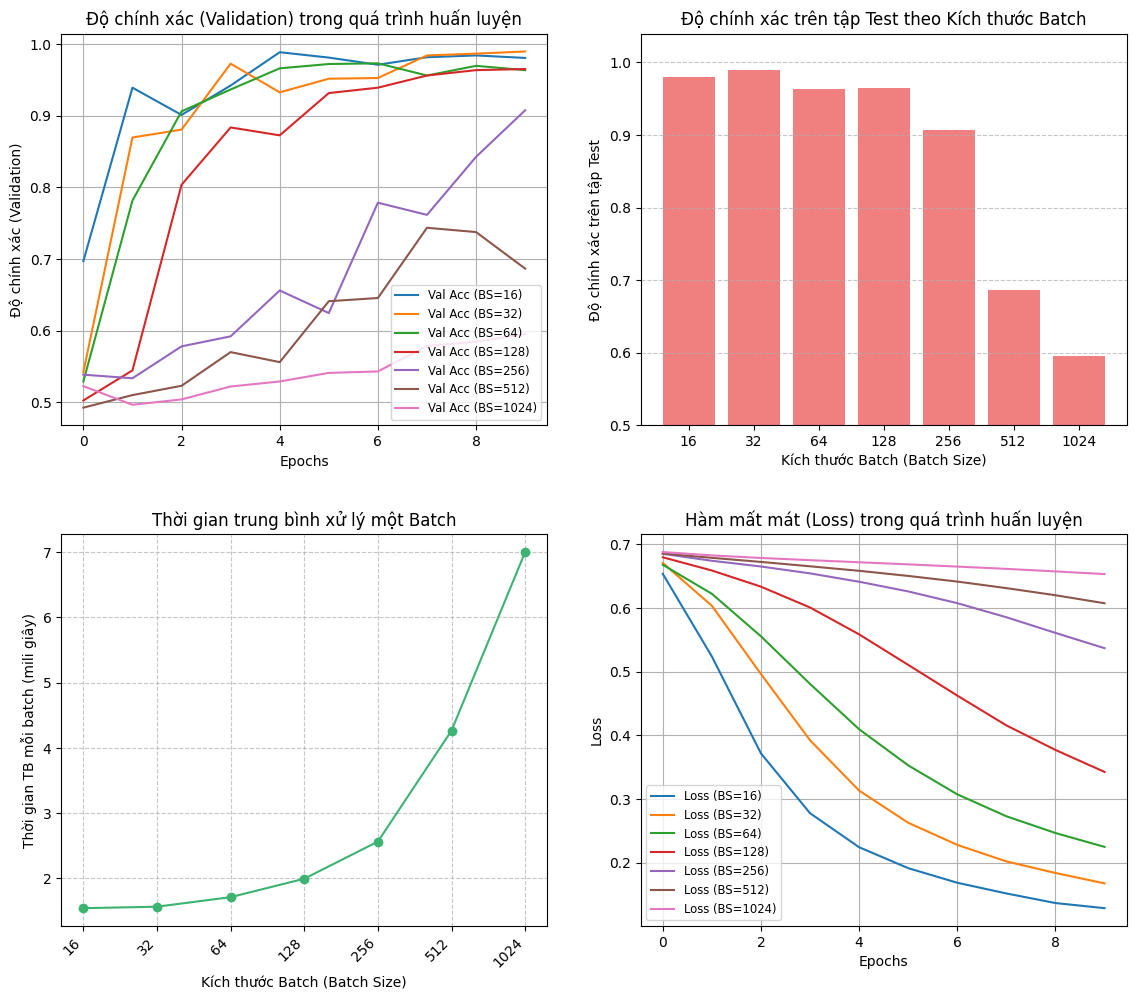


--- Phân tích ảnh hưởng của Batch Size ---
Thời gian chạy code: 2025-05-09 19:31:31

Thời gian trung bình xử lý một Batch:
- Khi batch_size tăng, thời gian để xử lý một batch riêng lẻ thường sẽ tăng lên. Điều này là do mỗi batch chứa nhiều mẫu hơn, đòi hỏi nhiều phép tính hơn trong cả forward và backward pass.
- Tuy nhiên, việc tăng batch_size cũng có thể dẫn đến việc sử dụng tài nguyên phần cứng (đặc biệt là GPU) hiệu quả hơn nhờ vào tính toán song song. Điều này có thể không hoàn toàn bù đắp cho việc xử lý nhiều dữ liệu hơn trong một batch, nhưng nó giải thích tại sao thời gian xử lý một batch không tăng tuyến tính hoàn toàn với kích thước batch.

Thời gian huấn luyện tổng cộng mỗi Epoch/Toàn bộ:
- Batch Size nhỏ (ví dụ: 16, 32):
  + Ưu điểm:
    + Cập nhật trọng số thường xuyên hơn (nhiều batches hơn mỗi epoch), có thể giúp mô hình hội tụ nhanh hơn về mặt số lần cập nhật (iterations) và thoát khỏi các điểm cực tiểu địa phương nông.
    + Thường cho khả năng tổng quát hóa tốt hơn (g

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import time
import matplotlib.pyplot as plt

# --- 0. Kiểm tra thiết bị (CPU/GPU) ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Sử dụng thiết bị: {device}")
# Lấy thời gian hiện tại để tham khảo
current_time_str = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())
print(f"Thời gian chạy code: {current_time_str}")


# --- 1. Chuẩn bị dữ liệu ---
# Tạo dữ liệu mẫu (ví dụ: bài toán phân loại nhị phân)
num_samples = 10000
num_features = 20

# Tạo dữ liệu ngẫu nhiên
X_np = np.random.rand(num_samples, num_features).astype(np.float32)
# Tạo nhãn dựa trên một quy tắc đơn giản (ví dụ: tổng các feature > 10)
y_np = (np.sum(X_np, axis=1) > num_features / 2).astype(np.float32).reshape(-1, 1)

# Chia dữ liệu thành tập train và test
split_ratio = 0.8
split_index = int(num_samples * split_ratio)

X_train_np, X_test_np = X_np[:split_index], X_np[split_index:]
y_train_np, y_test_np = y_np[:split_index], y_np[split_index:]

# Chuyển đổi sang PyTorch Tensors
X_train = torch.from_numpy(X_train_np).to(device)
y_train = torch.from_numpy(y_train_np).to(device)
X_test = torch.from_numpy(X_test_np).to(device)
y_test = torch.from_numpy(y_test_np).to(device)

print(f"Kích thước tập huấn luyện: {X_train.shape}, {y_train.shape}")
print(f"Kích thước tập kiểm tra: {X_test.shape}, {y_test.shape}")

# --- 2. Định nghĩa mô hình MLP ---
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_units=64):
        super(MLP, self).__init__()
        self.hidden_layer = nn.Linear(input_dim, hidden_units, bias=True)
        self.relu = nn.ReLU()
        self.output_layer = nn.Linear(hidden_units, 1, bias=True)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.hidden_layer(x)
        x = self.relu(x)
        x = self.output_layer(x)
        x = self.sigmoid(x)
        return x

# --- 3. Huấn luyện mô hình với các batch_size khác nhau ---
batch_sizes_to_test = [16, 32, 64, 128, 256, 512, 1024]
epochs = 10
learning_rate = 0.001

training_times = []
final_accuracies = []
avg_time_per_batch_list = [] # Danh sách mới để lưu thời gian trung bình mỗi batch
history_per_batch_size = {}

for batch_size in batch_sizes_to_test:
    print(f"\n--- Đang huấn luyện với batch_size = {batch_size} ---")

    model = MLP(input_dim=num_features, hidden_units=64).to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.BCELoss()

    train_dataset = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    epoch_losses = []
    epoch_val_accuracies = []
    total_batches_processed_this_run = 0 # Tổng số batch đã xử lý cho batch_size hiện tại
    individual_batch_times_this_run = [] # Lưu thời gian từng batch nhỏ (nếu muốn chi tiết hơn)

    start_train_time_total = time.time() # Thời gian bắt đầu tổng cộng cho batch_size này

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        batches_in_epoch = 0
        # epoch_start_time = time.time() # Nếu muốn tính thời gian mỗi epoch

        for inputs, labels in train_loader:
            batch_start_time = time.perf_counter() # Thời gian bắt đầu xử lý batch

            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            batch_end_time = time.perf_counter() # Thời gian kết thúc xử lý batch
            individual_batch_times_this_run.append(batch_end_time - batch_start_time)

            running_loss += loss.item() * inputs.size(0)
            total_batches_processed_this_run += 1
            batches_in_epoch +=1

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_losses.append(epoch_loss)
        # epoch_duration = time.time() - epoch_start_time

        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            val_outputs = model(X_test)
            predicted = (val_outputs > 0.5).float()
            total += y_test.size(0)
            correct += (predicted == y_test).sum().item()
        val_accuracy = correct / total
        epoch_val_accuracies.append(val_accuracy)

        if (epoch + 1) % (epochs // 5 if epochs >= 5 else 1) == 0 or epoch == epochs - 1:
             print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}, Val Accuracy: {val_accuracy:.4f}, Batches: {batches_in_epoch}")


    end_train_time_total = time.time() # Thời gian kết thúc tổng cộng
    total_training_time_for_bs = end_train_time_total - start_train_time_total
    training_times.append(total_training_time_for_bs)

    # Tính thời gian trung bình xử lý một batch
    if total_batches_processed_this_run > 0:
        avg_time_per_batch = total_training_time_for_bs / total_batches_processed_this_run
        # Hoặc nếu muốn dùng tổng thời gian của các batch nhỏ:
        # avg_time_per_batch = sum(individual_batch_times_this_run) / len(individual_batch_times_this_run)
    else:
        avg_time_per_batch = 0 # Trường hợp không có batch nào (ví dụ epochs=0)
    avg_time_per_batch_list.append(avg_time_per_batch)


    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        test_outputs = model(X_test)
        predicted = (test_outputs > 0.5).float()
        total += y_test.size(0)
        correct += (predicted == y_test).sum().item()
    final_accuracy = correct / total
    final_accuracies.append(final_accuracy)
    history_per_batch_size[batch_size] = {'loss': epoch_losses, 'val_accuracy': epoch_val_accuracies}

    print(f"Thời gian huấn luyện tổng cộng: {total_training_time_for_bs:.2f} giây")
    print(f"Tổng số batches đã xử lý: {total_batches_processed_this_run}")
    print(f"Thời gian trung bình mỗi batch: {avg_time_per_batch*1000:.4f} mili giây") # Chuyển sang mili giây cho dễ đọc
    print(f"Độ chính xác cuối cùng trên tập test: {final_accuracy:.4f}")


# --- 4. Trực quan hóa kết quả ---
# Tăng kích thước tổng thể của figure để chứa thêm subplot
plt.figure(figsize=(12, 15)) # Tăng chiều cao

# # Biểu đồ thời gian huấn luyện tổng cộng
# plt.subplot(3, 2, 1) # Thay đổi thành 3 hàng, 2 cột, vị trí 1
# plt.bar([str(bs) for bs in batch_sizes_to_test], training_times, color='skyblue')
# plt.xlabel("Kích thước Batch (Batch Size)")
# plt.ylabel("Thời gian huấn luyện tổng (giây)")
# plt.title("Thời gian huấn luyện tổng theo Kích thước Batch")
# plt.grid(True, axis='y', linestyle='--', alpha=0.7)


# Biểu đồ độ chính xác cuối cùng
plt.subplot(3, 2, 2) # Vị trí 2
plt.bar([str(bs) for bs in batch_sizes_to_test], final_accuracies, color='lightcoral')
plt.xlabel("Kích thước Batch (Batch Size)")
plt.ylabel("Độ chính xác trên tập Test")
plt.title("Độ chính xác trên tập Test theo Kích thước Batch")
plt.ylim([min(0.5, min(final_accuracies) - 0.05 if final_accuracies else 0.5), max(1.0, max(final_accuracies) + 0.05 if final_accuracies else 1.0)])
plt.grid(True, axis='y', linestyle='--', alpha=0.7)


# Biểu đồ thời gian trung bình mỗi batch
plt.subplot(3, 2, 3) # Vị trí 3 (subplot mới)
plt.plot([str(bs) for bs in batch_sizes_to_test], [t * 1000 for t in avg_time_per_batch_list], marker='o', linestyle='-', color='mediumseagreen')
plt.xlabel("Kích thước Batch (Batch Size)")
plt.ylabel("Thời gian TB mỗi batch (mili giây)")
plt.title("Thời gian trung bình xử lý một Batch")
plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle='--', alpha=0.7)


# Biểu đồ quá trình học (loss) cho các batch_size
plt.subplot(3, 2, 4) # Vị trí 4
for batch_size_val, history_data in history_per_batch_size.items():
    plt.plot(history_data['loss'], label=f'Loss (BS={batch_size_val})')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Hàm mất mát (Loss) trong quá trình huấn luyện")
plt.legend(fontsize='small')
plt.grid(True)

# Biểu đồ quá trình học (accuracy) cho các batch_size
plt.subplot(3, 2, 1) # Vị trí 5
for batch_size_val, history_data in history_per_batch_size.items():
    plt.plot(history_data['val_accuracy'], label=f'Val Acc (BS={batch_size_val})')
plt.xlabel("Epochs")
plt.ylabel("Độ chính xác (Validation)")
plt.title("Độ chính xác (Validation) trong quá trình huấn luyện")
plt.legend(fontsize='small')
plt.grid(True)

plt.tight_layout(pad=3.0) # Điều chỉnh khoảng cách giữa các subplot
plt.show()

# --- 5. Phân tích kết quả (Nhận xét) ---
print("\n--- Phân tích ảnh hưởng của Batch Size ---")
print(f"Thời gian chạy code: {current_time_str}")
print("\nThời gian trung bình xử lý một Batch:")
print("- Khi batch_size tăng, thời gian để xử lý một batch riêng lẻ thường sẽ tăng lên. Điều này là do mỗi batch chứa nhiều mẫu hơn, đòi hỏi nhiều phép tính hơn trong cả forward và backward pass.")
print("- Tuy nhiên, việc tăng batch_size cũng có thể dẫn đến việc sử dụng tài nguyên phần cứng (đặc biệt là GPU) hiệu quả hơn nhờ vào tính toán song song. Điều này có thể không hoàn toàn bù đắp cho việc xử lý nhiều dữ liệu hơn trong một batch, nhưng nó giải thích tại sao thời gian xử lý một batch không tăng tuyến tính hoàn toàn với kích thước batch.")

print("\nThời gian huấn luyện tổng cộng mỗi Epoch/Toàn bộ:")
print("- Batch Size nhỏ (ví dụ: 16, 32):")
print("  + Ưu điểm:")
print("    + Cập nhật trọng số thường xuyên hơn (nhiều batches hơn mỗi epoch), có thể giúp mô hình hội tụ nhanh hơn về mặt số lần cập nhật (iterations) và thoát khỏi các điểm cực tiểu địa phương nông.")
print("    + Thường cho khả năng tổng quát hóa tốt hơn (generalization) trên một số bộ dữ liệu.")
print("  + Nhược điểm:")
print("    + Thời gian huấn luyện mỗi epoch thường lâu hơn do overhead của việc xử lý nhiều batch và nạp dữ liệu cho từng batch nhỏ. Số lượng batch nhiều hơn làm tăng tổng thời gian tính toán, mặc dù mỗi batch riêng lẻ nhanh hơn batch lớn.")
print("    + Ước lượng gradient nhiễu hơn, có thể làm quá trình hội tụ không ổn định.")

print("\n- Batch Size lớn (ví dụ: 128, 256, full-batch):")
print("  + Ưu điểm:")
print("    + Thời gian huấn luyện mỗi epoch thường nhanh hơn do có ít batch hơn để xử lý và tận dụng tốt hơn tính toán song song trên GPU/CPU cho mỗi batch lớn.")
print("    + Ước lượng gradient chính xác hơn và ít nhiễu hơn, giúp quá trình hội tụ ổn định hơn.")
print("  + Nhược điểm:")
print("    + Mặc dù thời gian mỗi epoch có thể nhanh hơn, thời gian xử lý một batch riêng lẻ lại lâu hơn.")
print("    + Cập nhật trọng số ít thường xuyên hơn.")
print("    + Có nguy cơ hội tụ vào các điểm cực tiểu địa phương sắc nét (sharp minima), có thể dẫn đến khả năng tổng quát hóa kém hơn.")
print("    + Yêu cầu nhiều bộ nhớ hơn.")

print("\nLựa chọn Batch Size:")
print("Việc lựa chọn batch_size tối ưu là một sự cân bằng:")
print("- Giữa thời gian xử lý một batch (batch lớn hơn = lâu hơn) và tổng thời gian huấn luyện một epoch (batch lớn hơn thường = nhanh hơn do ít batch hơn và song song hóa tốt hơn).")
print("- Giữa tốc độ hội tụ (số epoch) và chất lượng của điểm hội tụ (khả năng tổng quát hóa).")
print("Cần thử nghiệm với các giá trị khác nhau. Các giá trị phổ biến thường là lũy thừa của 2.")